In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = '100'
from sklearn.metrics import auc

import numpy as np
import pandas as pd
from plotting import * 

import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
df_ele = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data/validation_dataset_v10_ele.csv", sep=";")
df_gamma = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data/validation_dataset_v10_gamma.csv", sep=";")
# df_nomatch = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data/validation_dataset_v10_nomatch.csv", sep=";")

In [30]:
# df_tot = pd.concat([df_nomatch, df_ele, df_gamma], sort=False)
df_tot = pd.concat([df_ele, df_gamma], sort=False)

In [4]:
# Add variables
for df in [df_ele, df_gamma]:
    df['iz'] = df['seed_iz']
    df['ieta'] = df['seed_ieta']
    df['iphi'] = df['seed_iphi']
    df['eta'] = df['seed_eta']
    df['phi'] = df['seed_phi']
    df['en'] = df['en_seed']
    df['et'] = df['et_seed']

In [5]:
def bin_analysis(col):
    def f(df):
        m = df[col].mode().values[0]
        A = (df[col].quantile(0.84) - df[col].quantile(0.16))/2
        B = (df[col].quantile(0.025) - df[col].quantile(0.975))/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "N": df[col].count()
        })
    return f

In [6]:

import mplhep as hep
plt.style.use(hep.style.CMS)

# N clusters

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


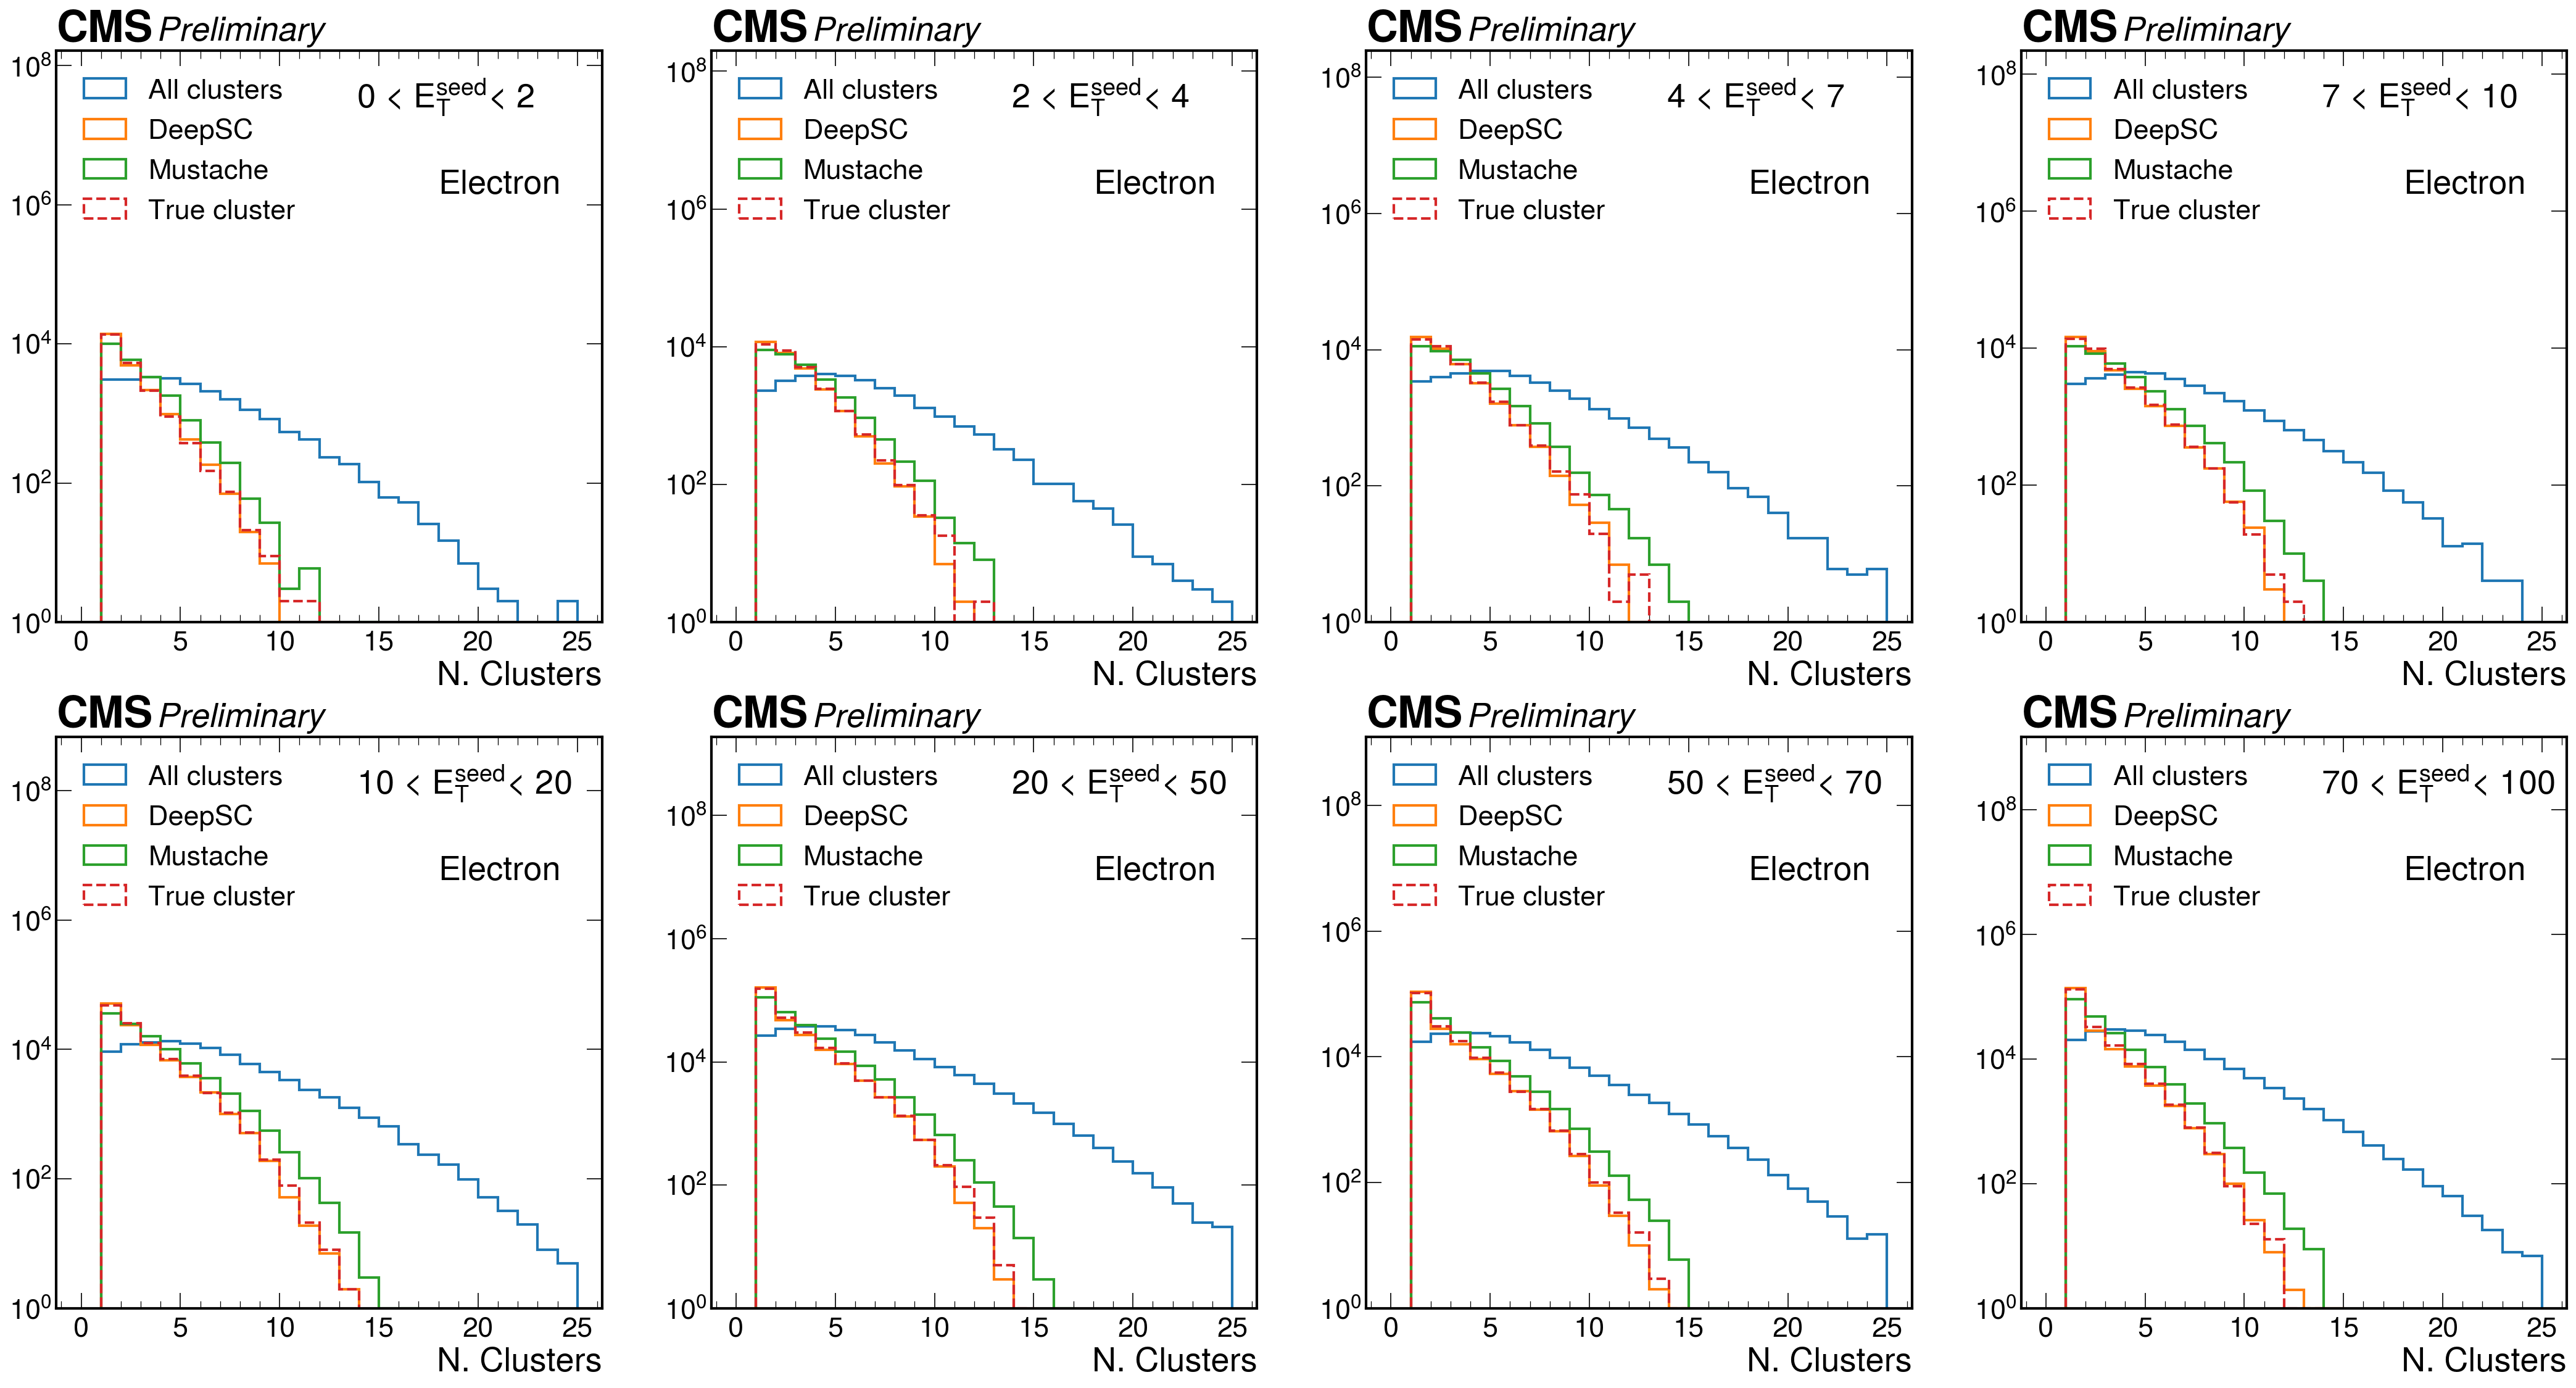

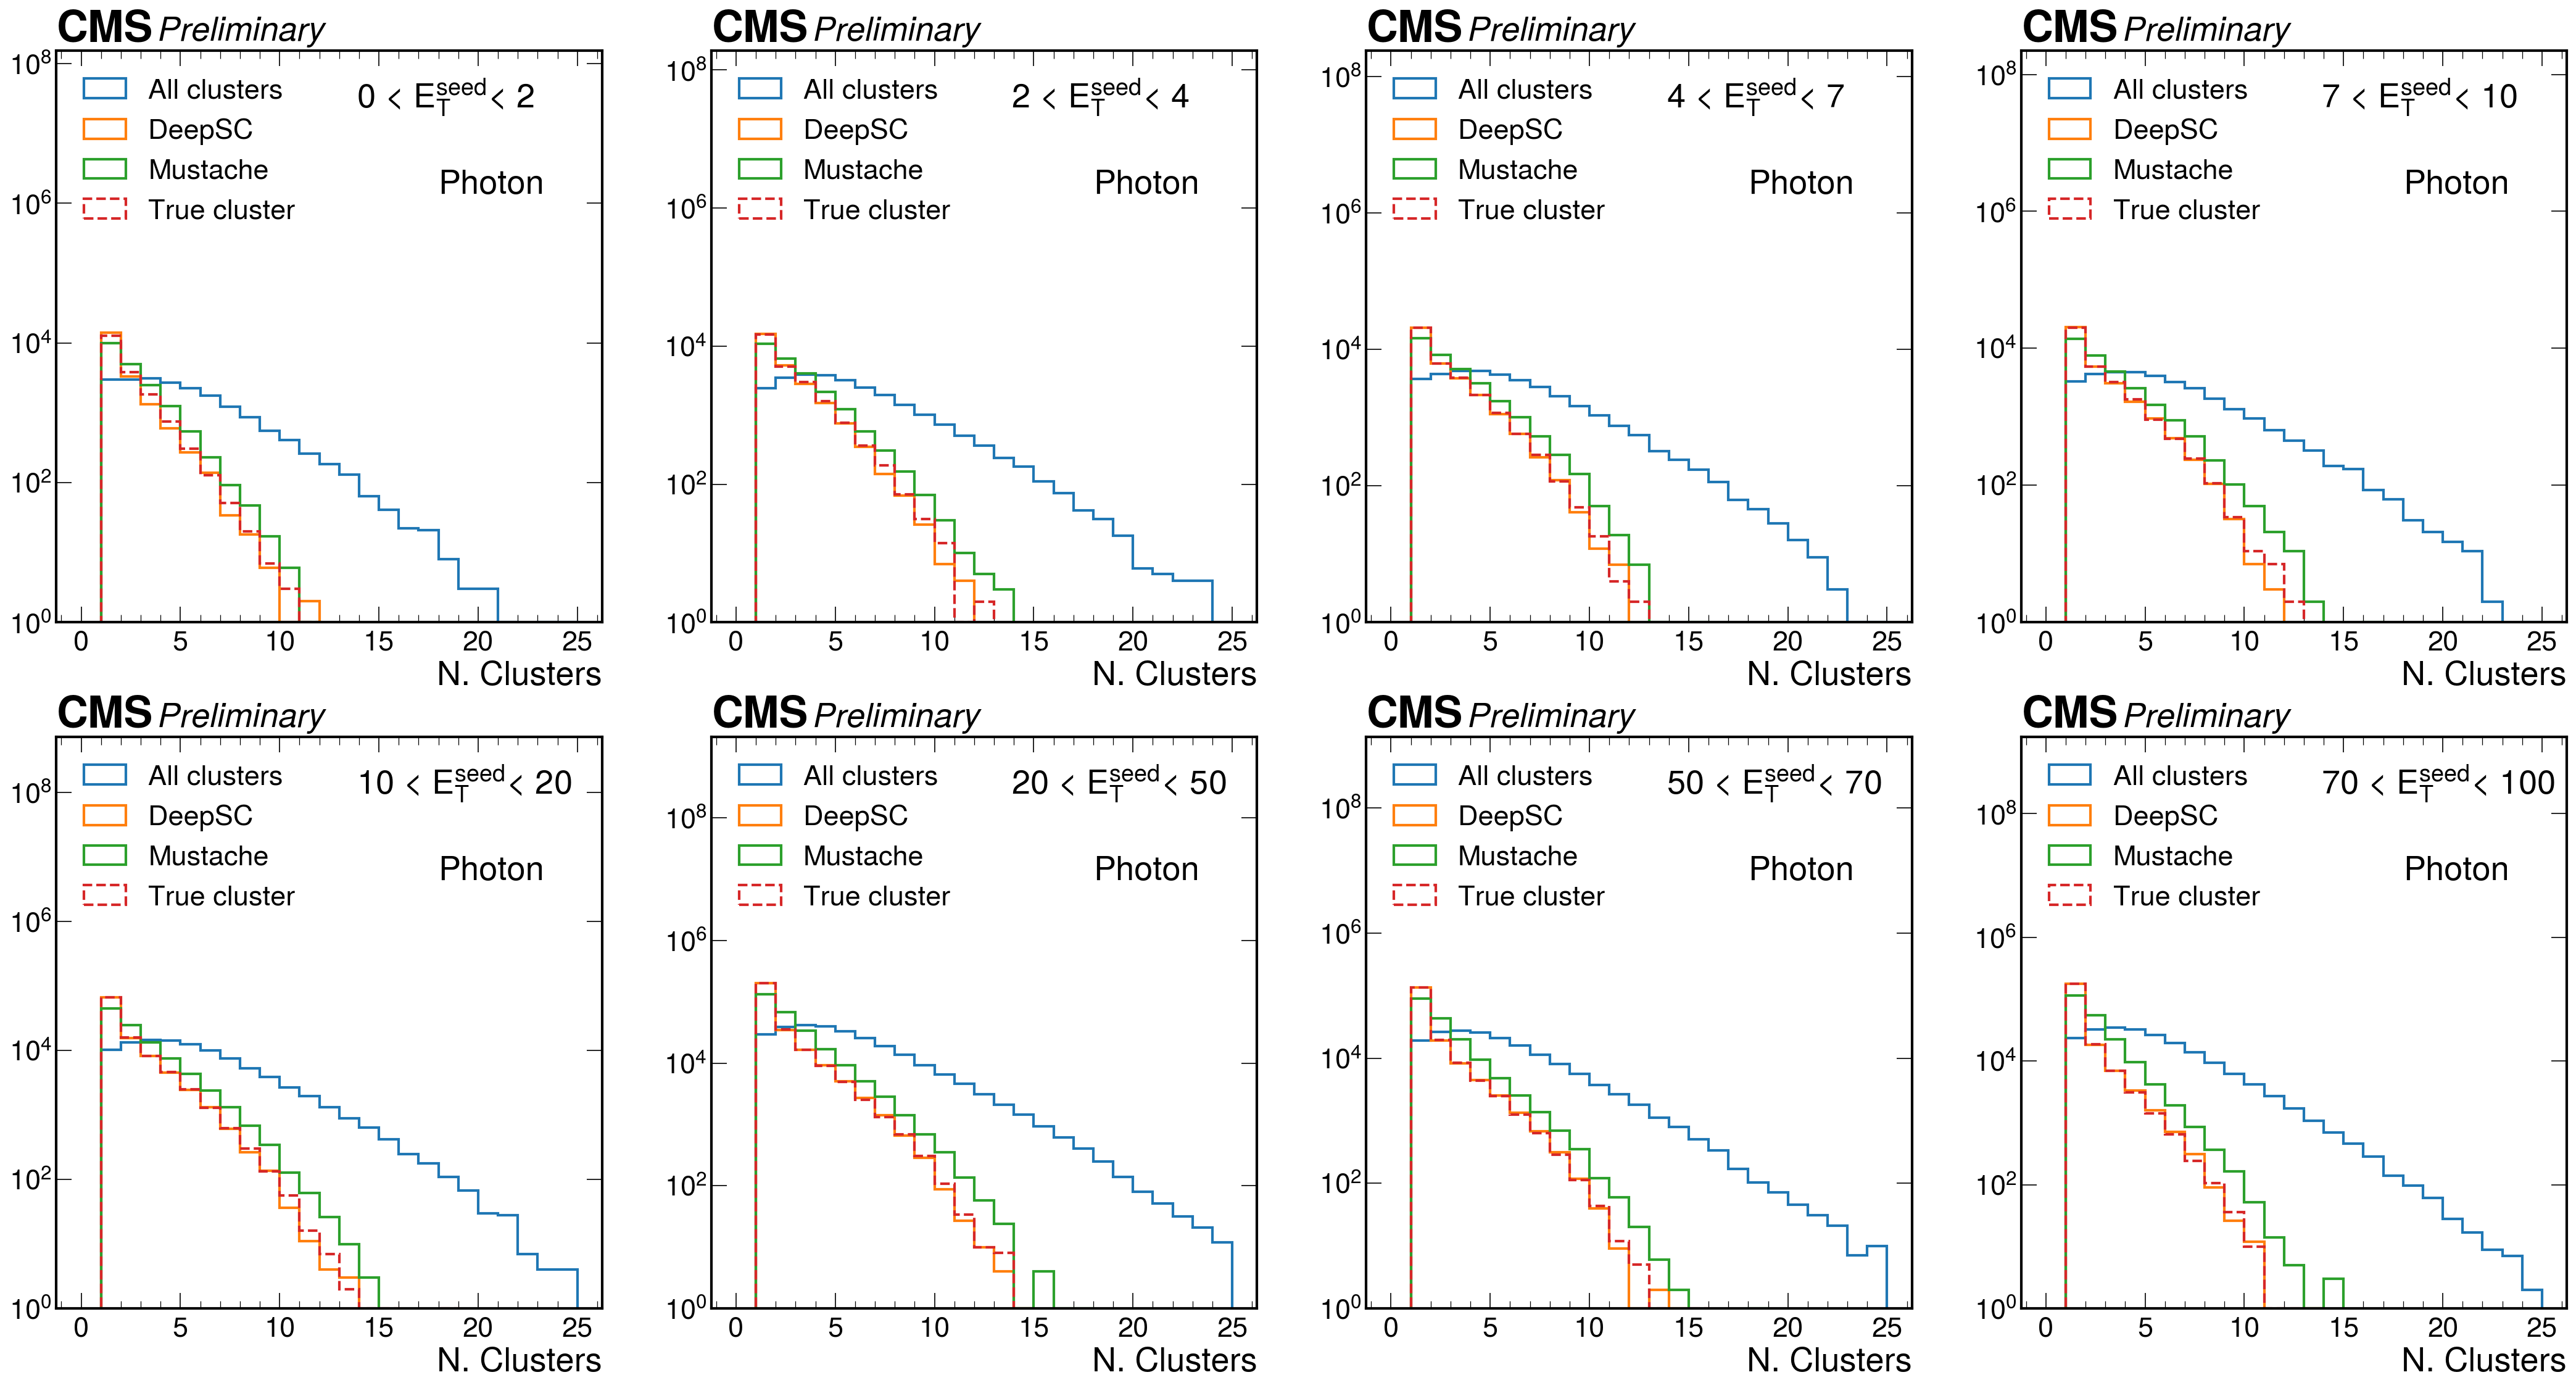

In [8]:
for df, flavour in zip([df_ele,df_gamma],["Electron","Photon"]):

    fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

    xrange = (0,25)
    bins= 25

    ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

    for j,etss in enumerate(ets): 
        for i, (e1,e2) in enumerate(etss): 
            dfx = df[(df.et>=e1) & (df.et<e2)]

            A = ax[j,i].hist(dfx.ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
            ax[j,i].hist(dfx.ncls_sel,bins=bins, range=xrange, histtype='step', linewidth=2, label='DeepSC')
            ax[j,i].hist(dfx.ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')
            ax[j,i].hist(dfx.ncls_true,bins=bins, range=xrange, histtype='step', linewidth=2, linestyle='dashed', label='True cluster')
            maxY = np.max(A[0])
            ax[j,i].legend(loc="upper left")
            ax[j,i].set_yscale('log')
            ax[j,i].set_ylim(1, 5e4 * maxY)
            ax[j,i].set_xlabel("N. Clusters")
            ax[j,i].text(0.55,0.9,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
            ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

            hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


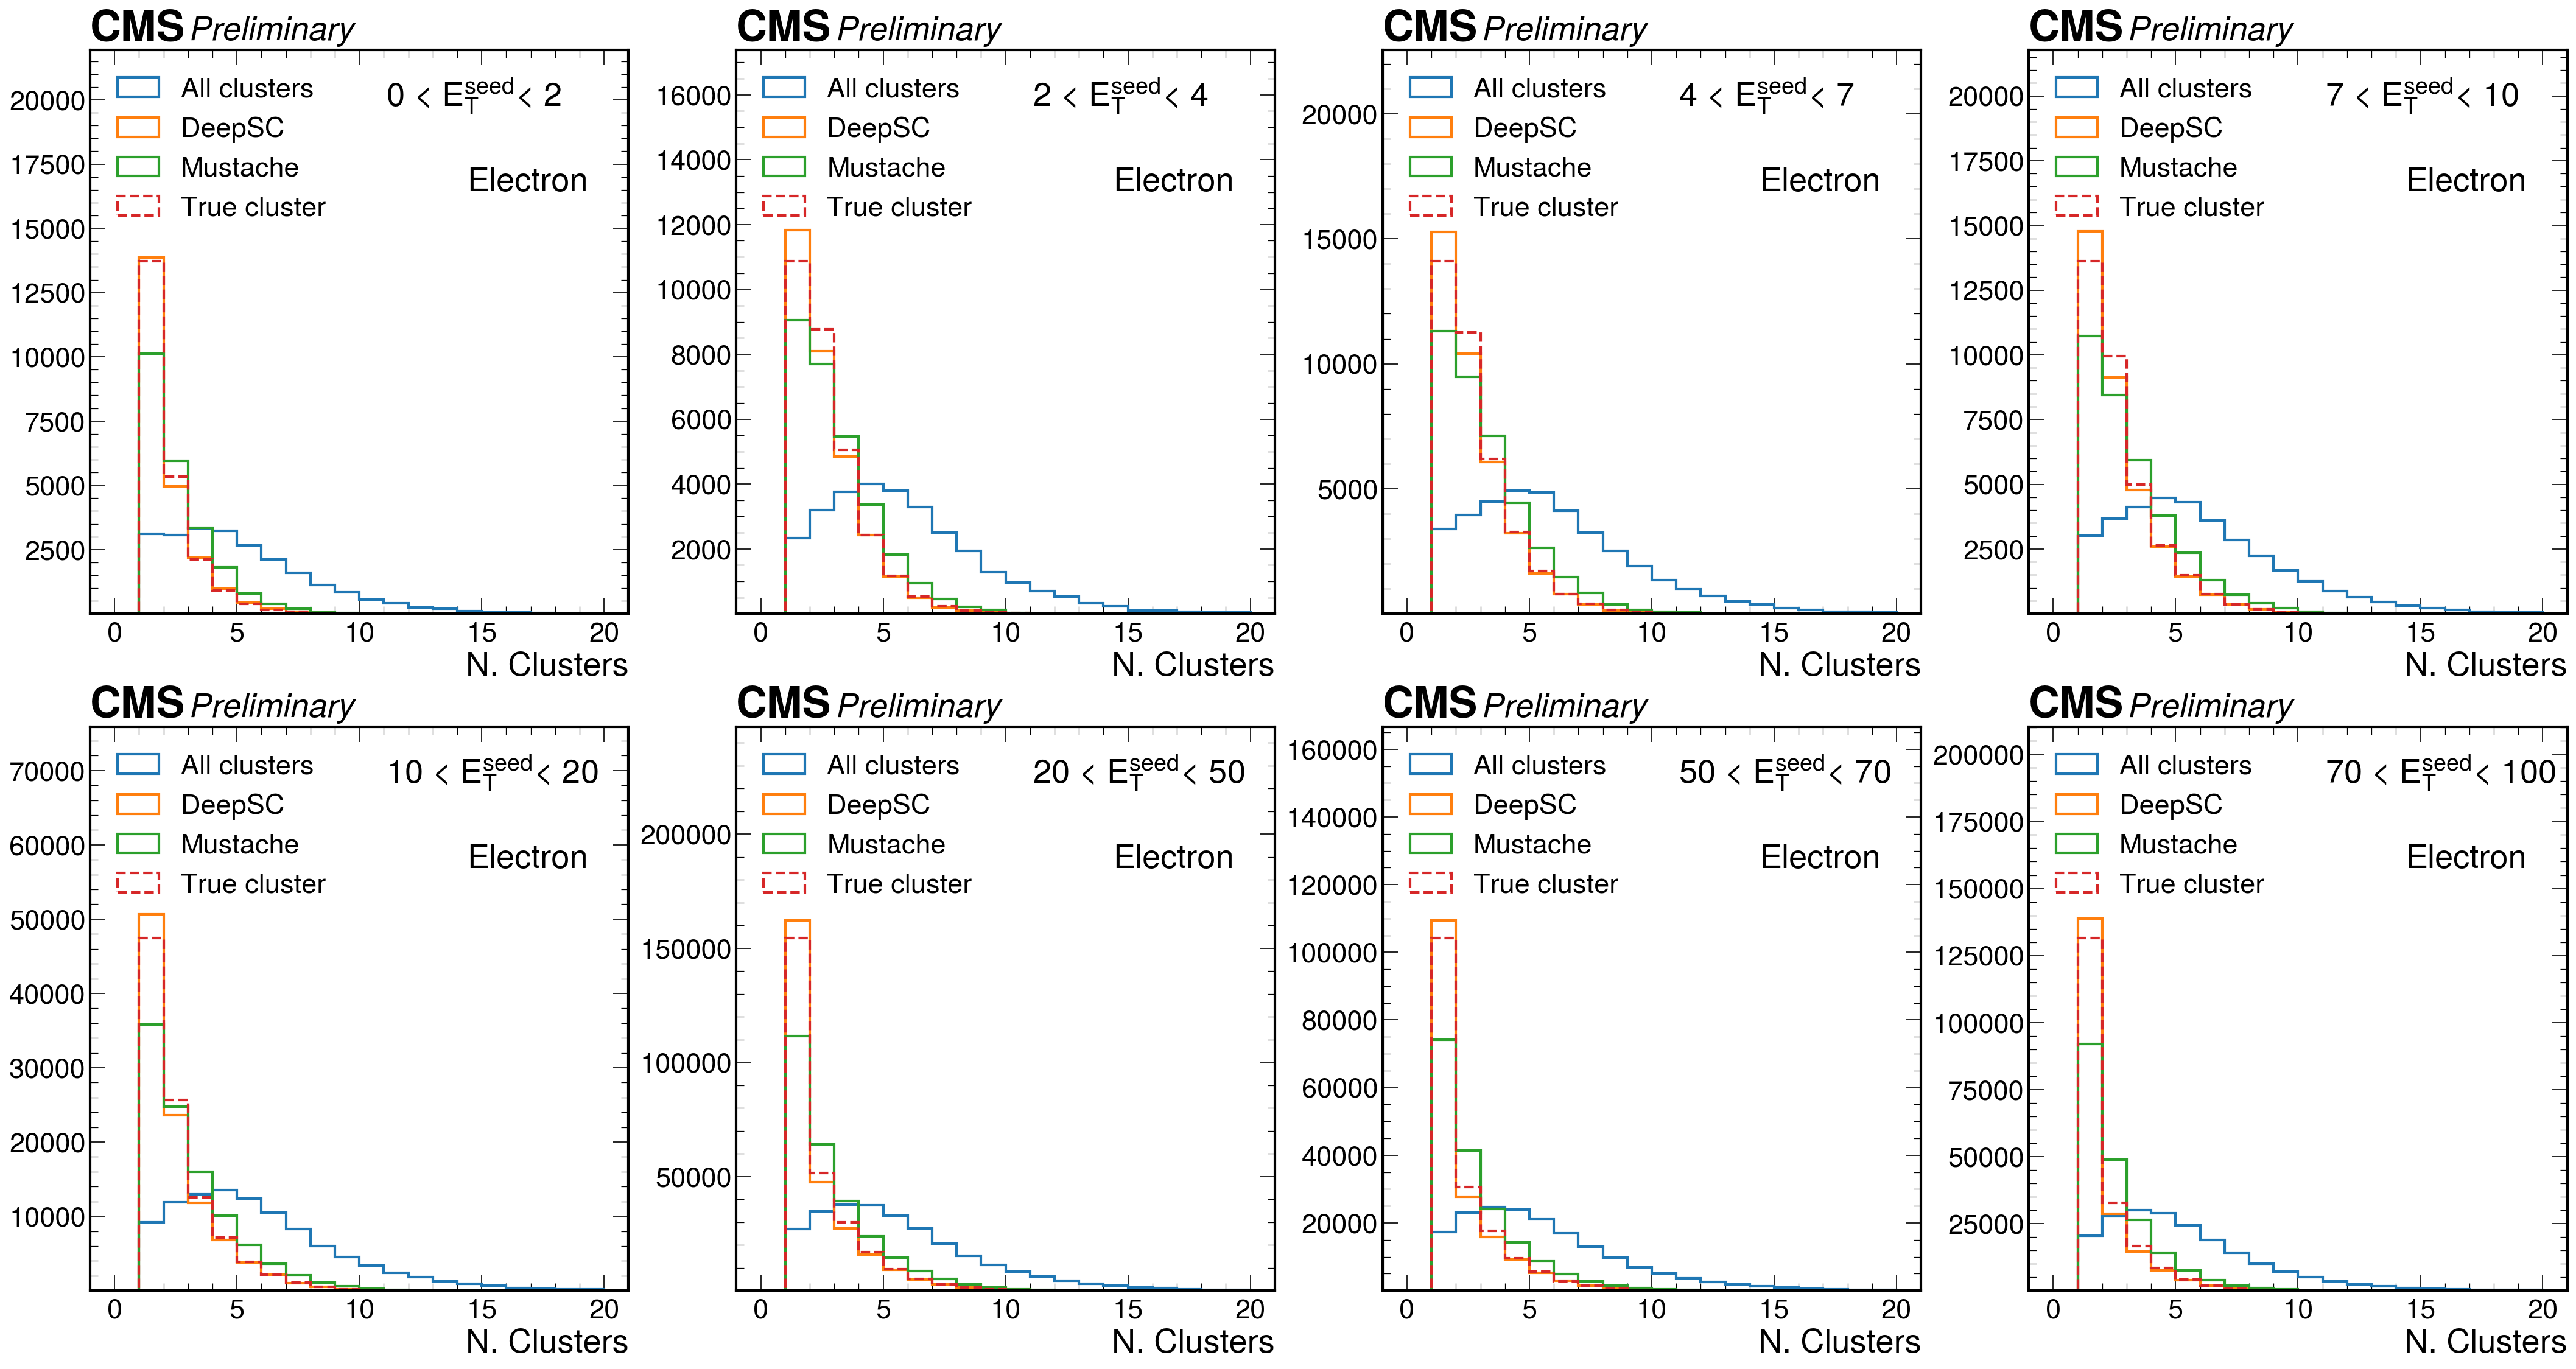

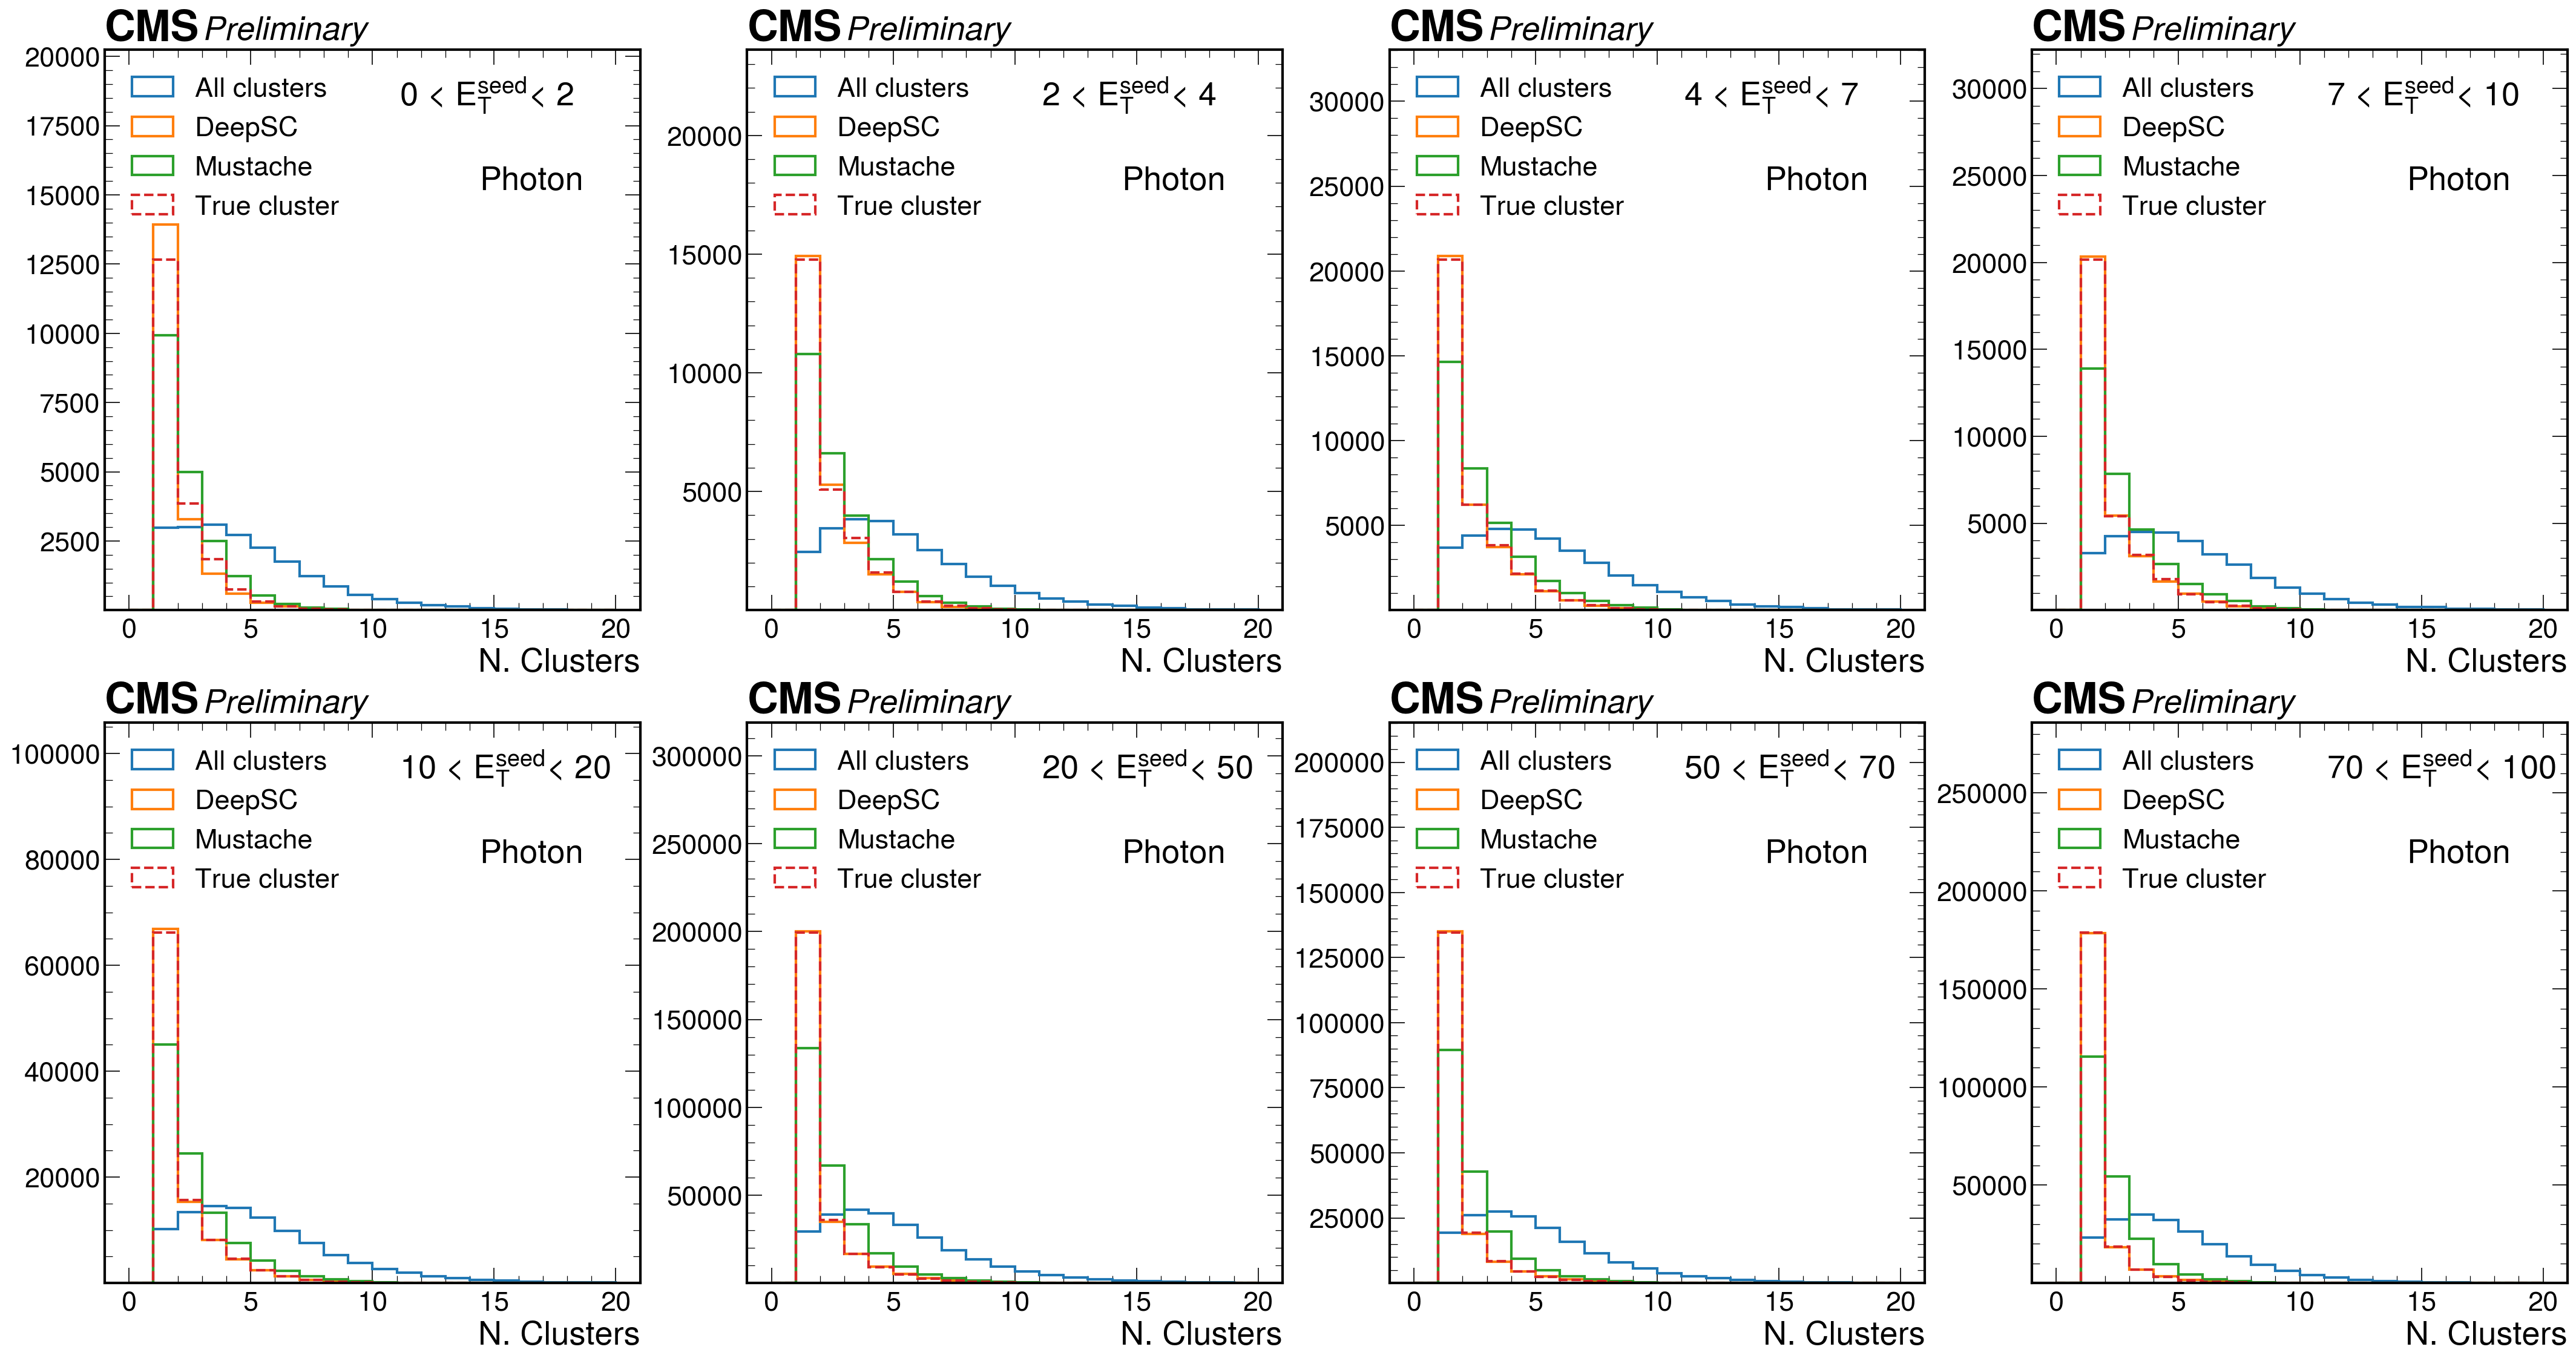

In [9]:
for df, flavour in zip([df_ele,df_gamma],["Electron","Photon"]):

    fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

    xrange = (0,20)
    bins= 20

    ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

    for j,etss in enumerate(ets): 
        for i, (e1,e2) in enumerate(etss): 
            dfx = df[(df.et>=e1) & (df.et<e2)]

            ax[j,i].hist(dfx.ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
            ax[j,i].hist(dfx.ncls_sel,bins=bins, range=xrange, histtype='step', linewidth=2, label='DeepSC')
            ax[j,i].hist(dfx.ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')
            A = ax[j,i].hist(dfx.ncls_true,bins=bins, range=xrange, histtype='step', linewidth=2, linestyle='dashed', label='True cluster')
            maxY = np.max(A[0])
            ax[j,i].legend(loc="upper left")
#             ax[j,i].set_yscale('log')
            ax[j,i].set_ylim(1, 1.6 * maxY)
            ax[j,i].set_xlabel("N. Clusters")
            ax[j,i].text(0.55,0.9,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
            ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

            hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


# Resolution

In [60]:
def get_CI(histo, CL):
    Y, X = histo
    maxBin = np.argmax(Y)
    Xmax = (X[maxBin] + X[maxBin+1])/2
    # now we have to compute the simmetric interval
    Xr, Xl = 0, 0
    tot = np.sum(Y)
    thr = tot* CL/2
#     print(tot, thr)
    xi = maxBin+1
    Nu = Y[maxBin]/2
    Nd = Nu
    while(xi < len(X)):
        Nu += Y[xi]
        if Nu > thr:
            Xr = (X[xi] + X[xi+1])/2
            break
        else:
            xi+=1
            
    xi = maxBin-1
    while(xi > 0):
        Nd += Y[xi]
        if Nd > thr:
            Xl = (X[xi] + X[xi+1])/2
            break
        else:
            xi-=1
    
    return Xmax, Xr, Xl
    
def get_sigma_eff(df):
    A = (df.quantile(0.84) - df.quantile(0.16)) /2
    B = (df.quantile(0.025) - df.quantile(0.975)) /2
    return A,B

    

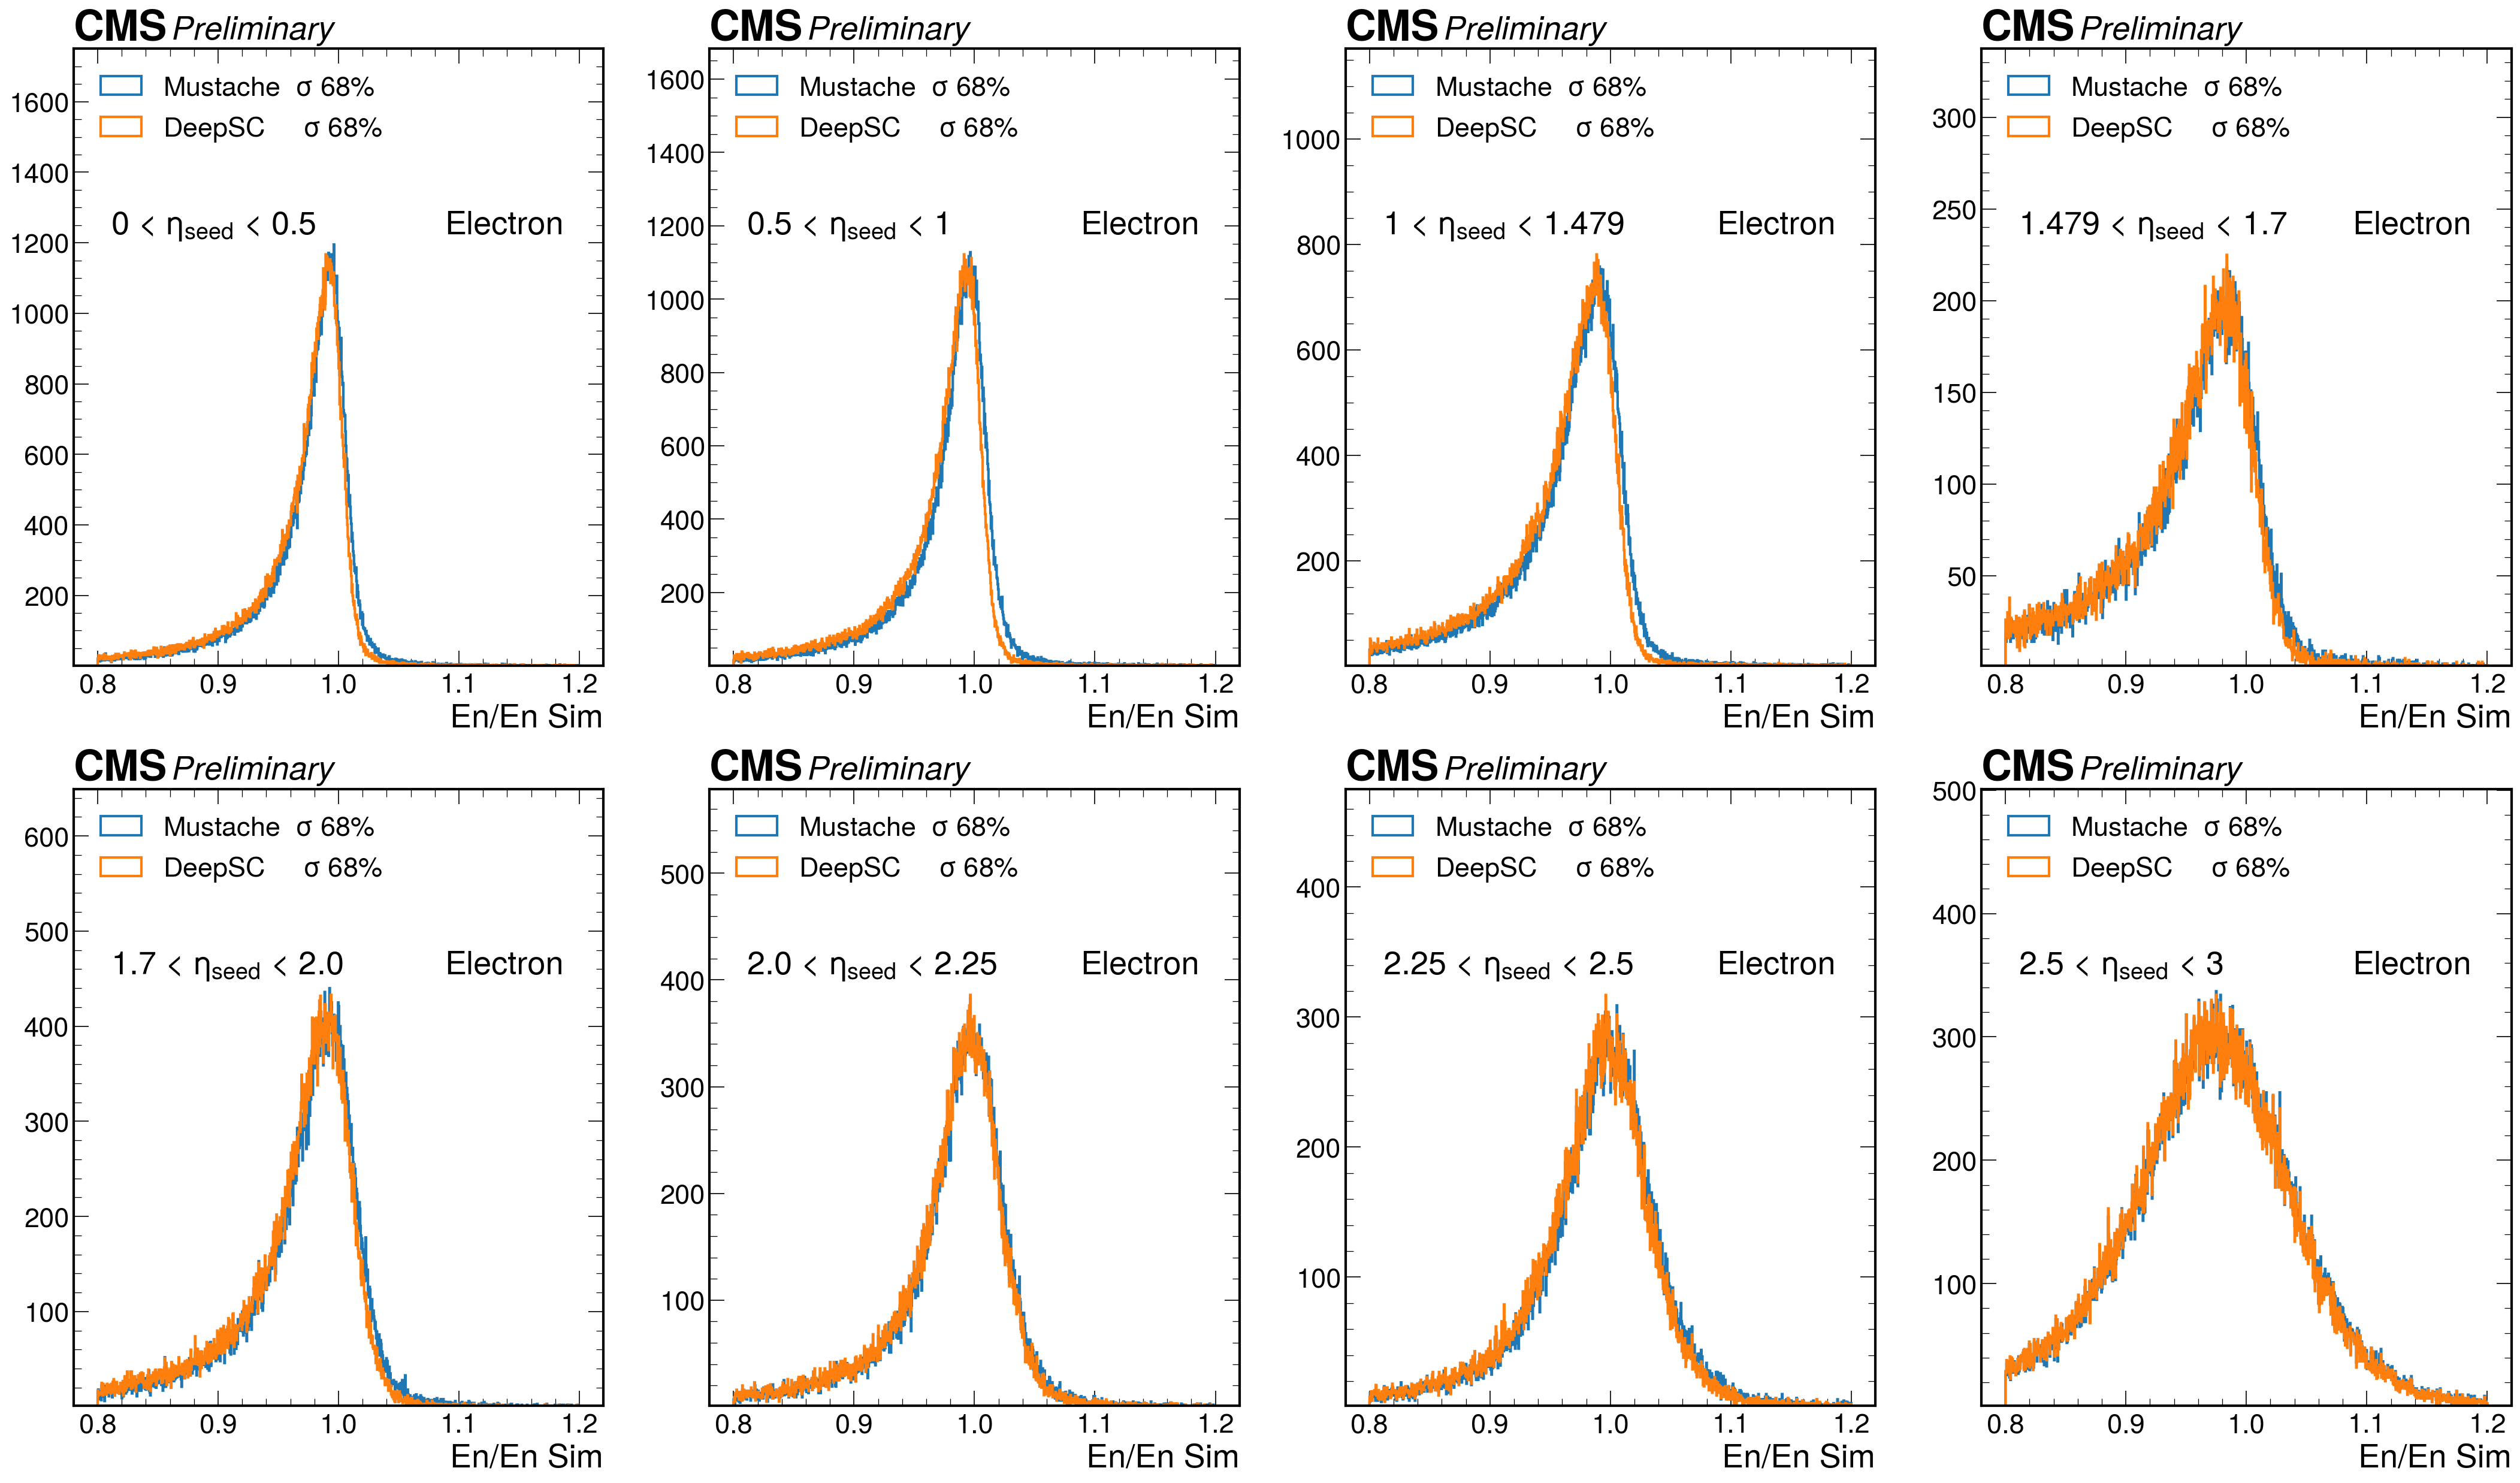

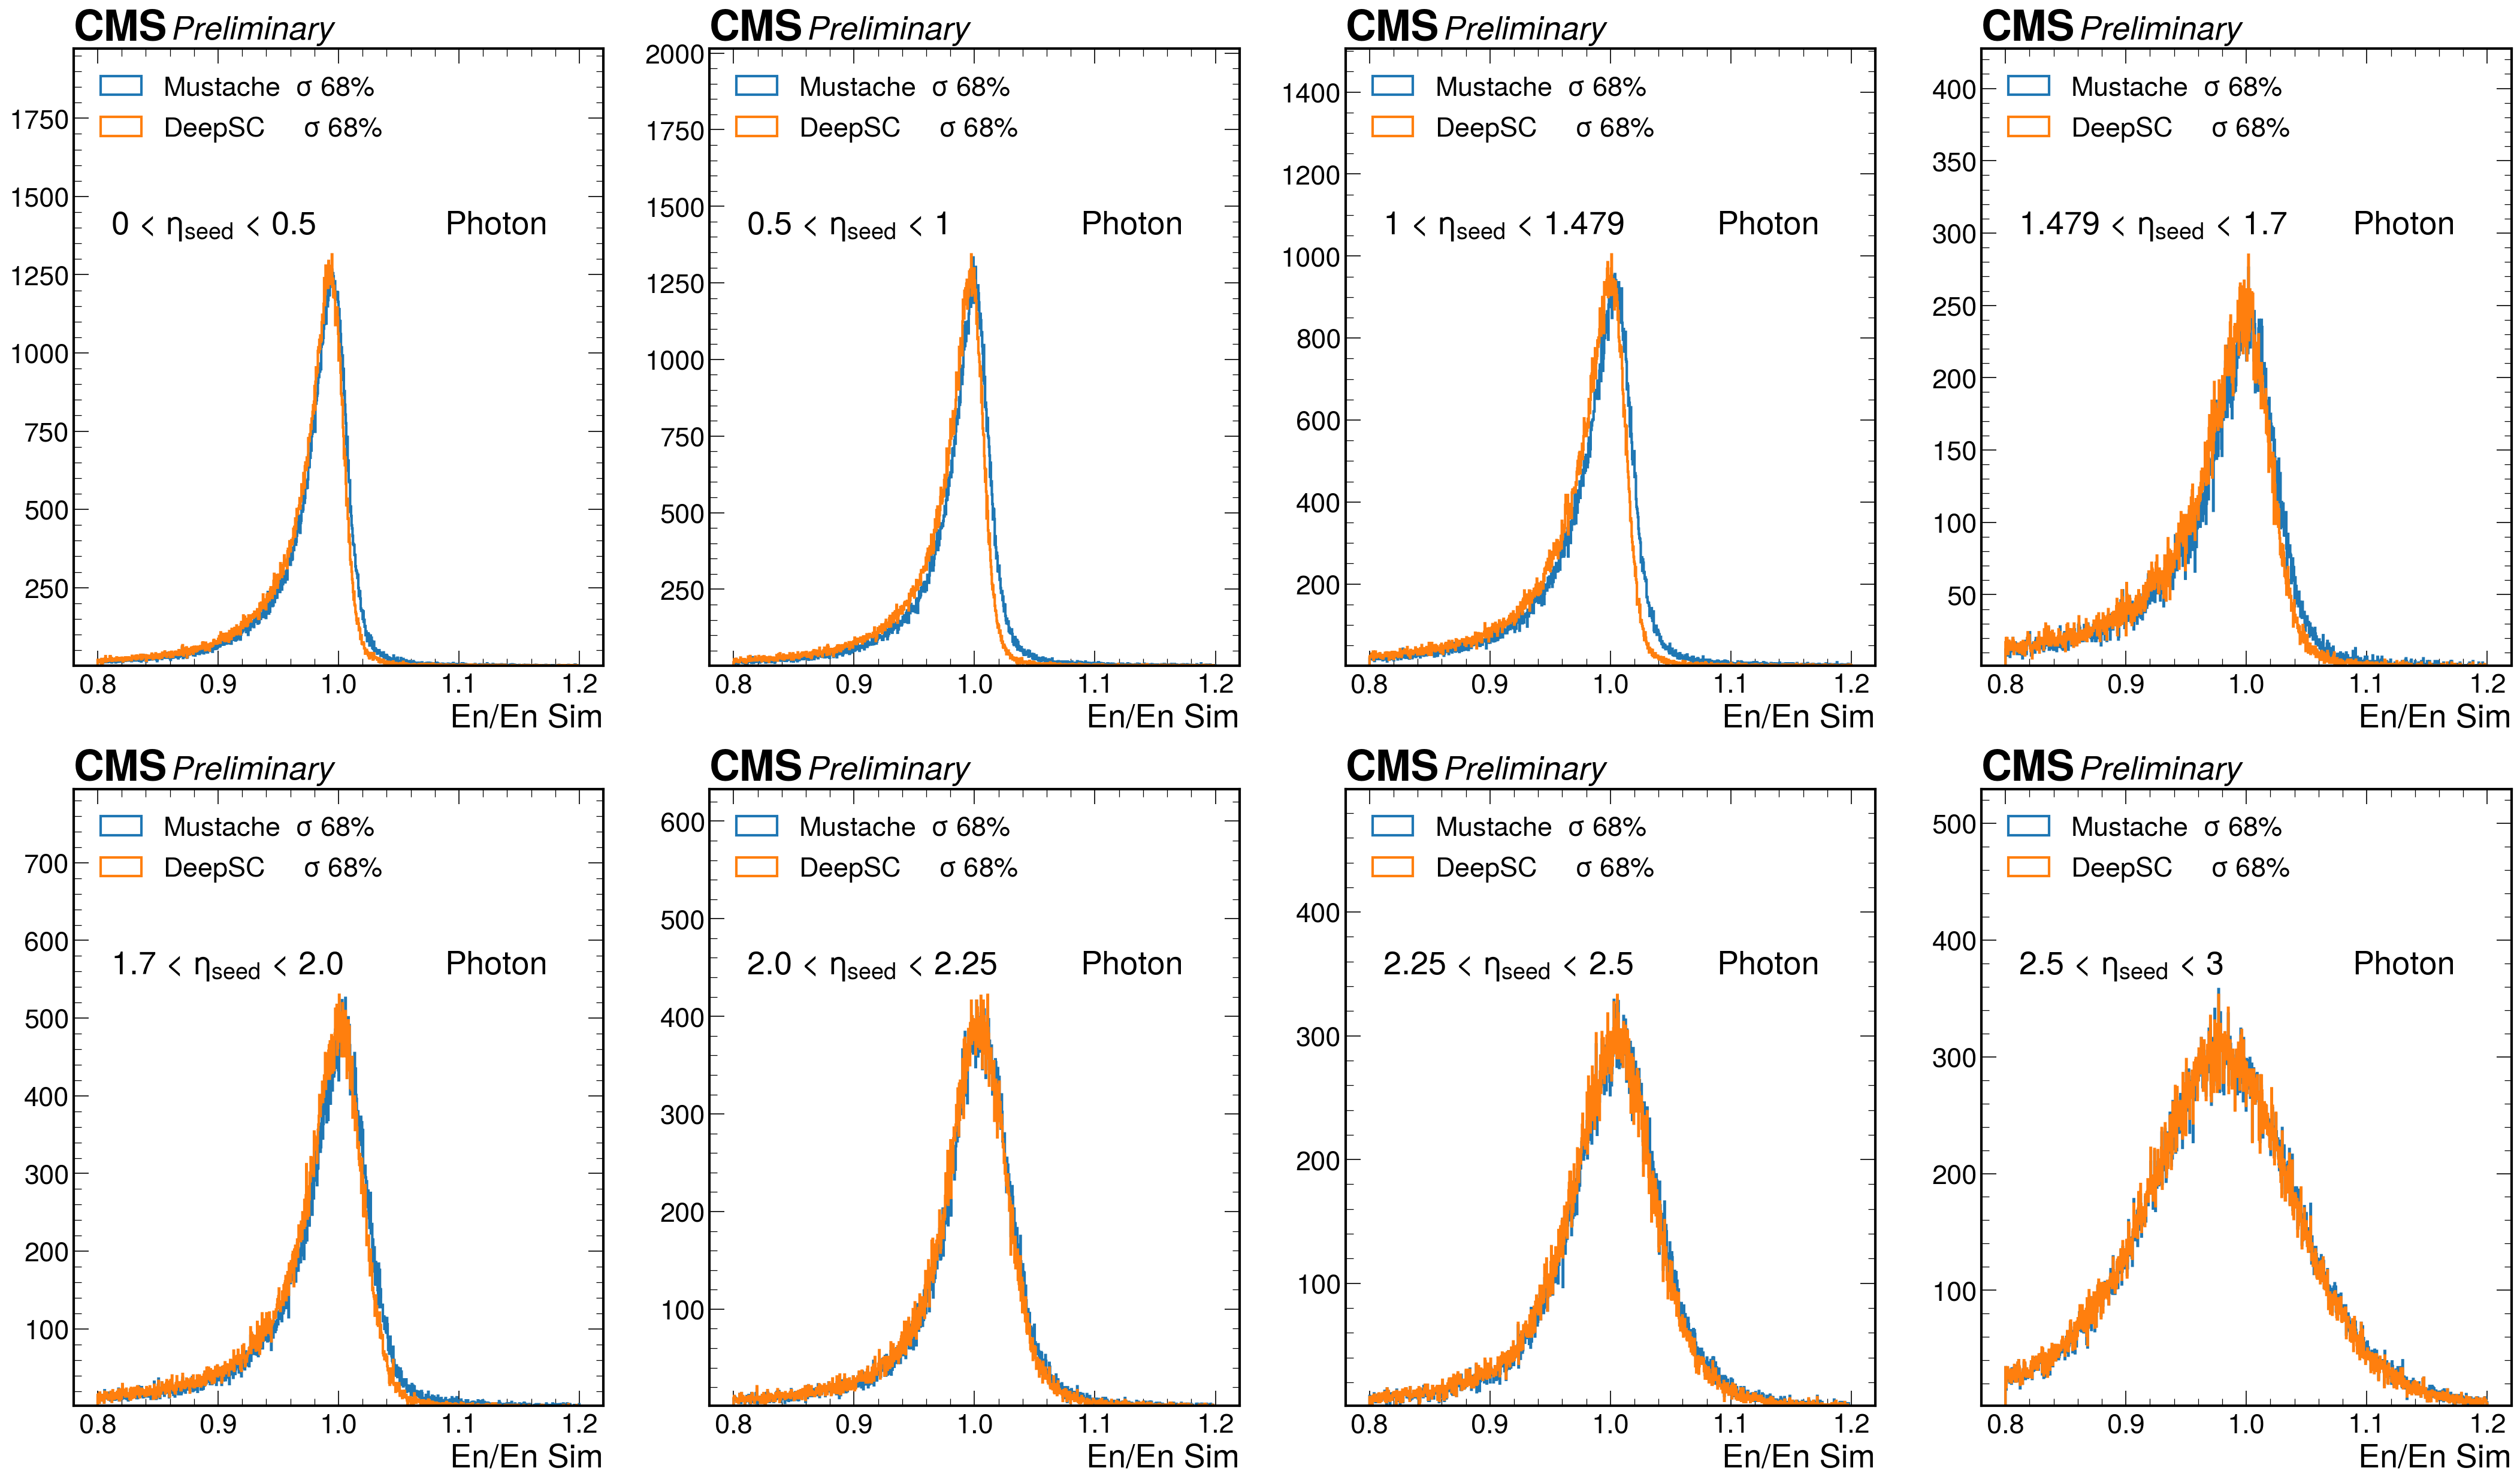

In [9]:
for df, flavour in zip([df_ele,df_gamma],["Electron","Photon"]):

    fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

    xrange = (0.8, 1.2)
    bins= 1000
    CL = 0.4


    r = [0, 0.5,1, 1.479, 1.7, 2.0, 2.25, 2.5, 3]
    s = [[], []]
    for i in range(len(r)-1):
        line = i //4 
        s[line].append((r[i],r[i+1]))

    for j,ss in enumerate(s): 
        for i, (e1,e2) in enumerate(ss): 
            dfx = df[(abs(df.seed_eta)>=e1) & (abs(df.seed_eta)<e2)]

            width, width_2 = get_sigma_eff(dfx.En_ovEtrue_sim_good)
            width_must, width_2_must = get_sigma_eff(dfx.En_ovEtrue_sim_good_mustache)
    #         rms_regr = dfx.En_ovEtrue_gen_corr.std()

            ax[j,i].hist(dfx.En_ovEtrue_sim_good_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache  $\sigma$ 68%'.format(width_must, CL))
            A= ax[j,i].hist(dfx.En_ovEtrue_sim_good,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC     $\sigma$ 68%'.format(width, CL))
    #         ax[j,i].hist(dfx.En_ovEtrue_gen_corr,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC +regre    RMS: {:.4f}'.format(rms_regr))
            maxY = np.max(A[0])
            ax[j,i].legend(loc="upper left")
    #         ax[j,i].set_yscale('log')
            ax[j,i].set_ylim(1, 1.5 * maxY)
            ax[j,i].set_xlabel("En/En Sim")
            ax[j,i].text(0.07,0.7,  str(e1) + ' < $\eta_{seed}$ < ' + str(e2), transform = ax[j,i].transAxes)  
            ax[j,i].text(0.7, 0.7, flavour, transform=ax[j,i].transAxes)

            hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

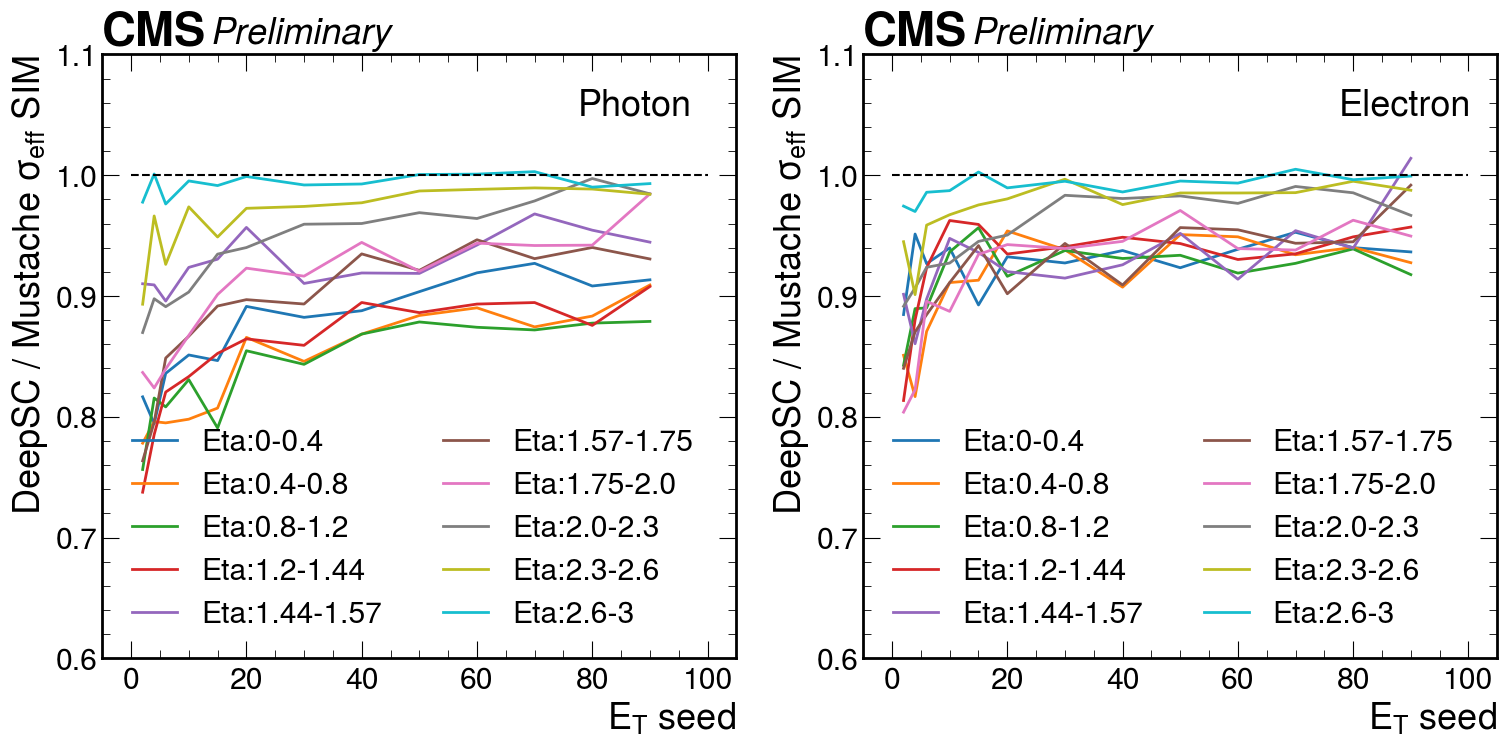

In [12]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

df = df_gamma
flavour = "Photon"
ets = [2, 4,6, 10,15,20,30,40,50,60,70,80,90,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(etas[:-1]):
    ax.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ax.legend(ncol=2)
ax.set_xlabel("$E_T$ seed")
ax.plot([0,100],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele
flavour = "Electron"

ets = [2, 4,6,10,15,20,30,40,50,60,70,80,90,100]
etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(etas[:-1]):
    ay.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ay.legend(ncol=2)
ay.set_xlabel("$E_T$ seed")
ay.plot([0,100],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

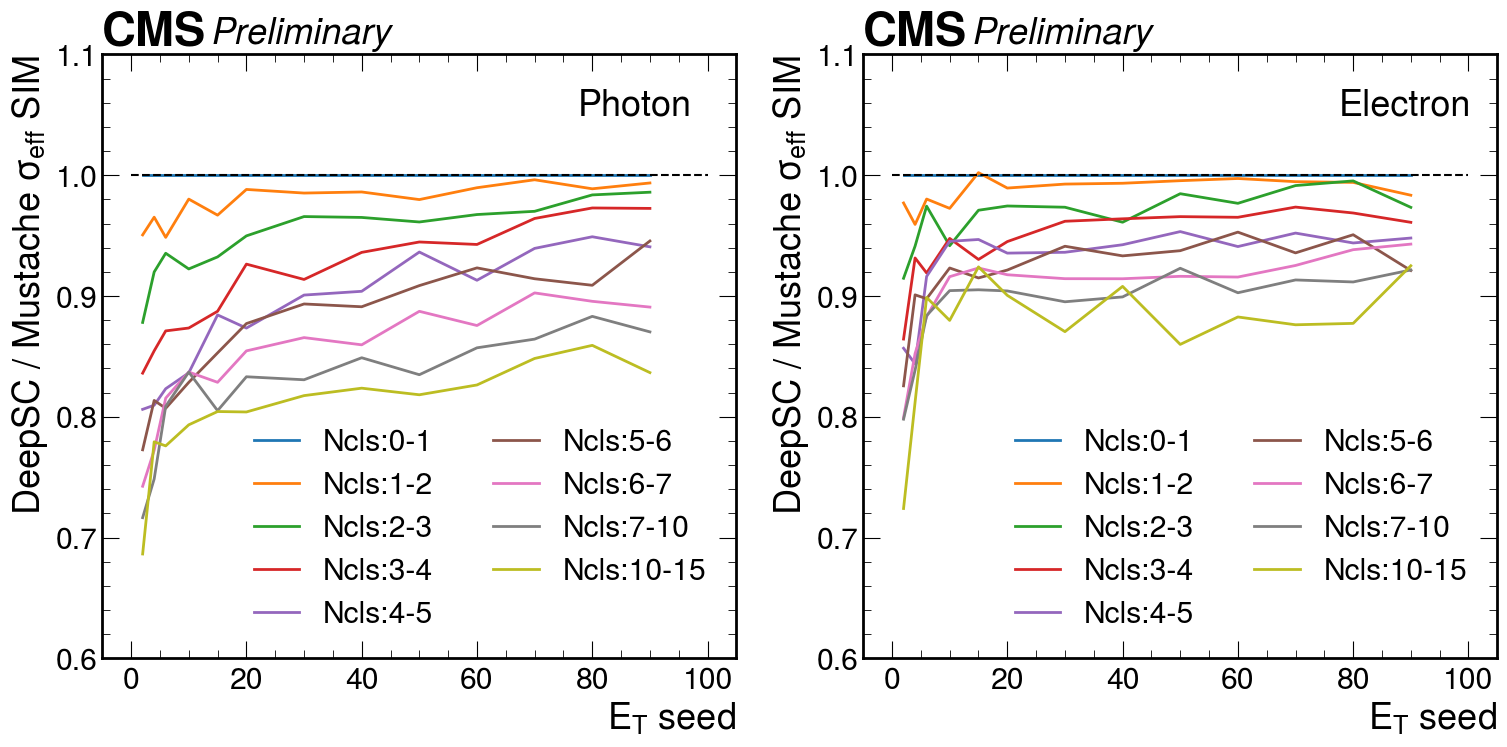

In [12]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

df = df_gamma
flavour ="Photon"
ets = [2,4,6,10,15,20,30,40,50,60,70,80,90,100]
ncls = [0,1,2,3,4,5,6,7,10,15]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(ncls[:-1]):
    ax.plot(ets[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ax.legend(ncol=2)
ax.set_xlabel("$E_T$ seed")
ax.plot([0,100],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele
flavour = "Electron"

ets = [2,4,6,10,15,20,30,40,50,60,70,80,90,100]
ncls = [0,1,2,3,4,5,6,7,10,15]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(ncls[:-1]):
    ay.plot(ets[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ay.legend(ncol=2)
ay.set_xlabel("$E_T$ seed")
ay.plot([0,100],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

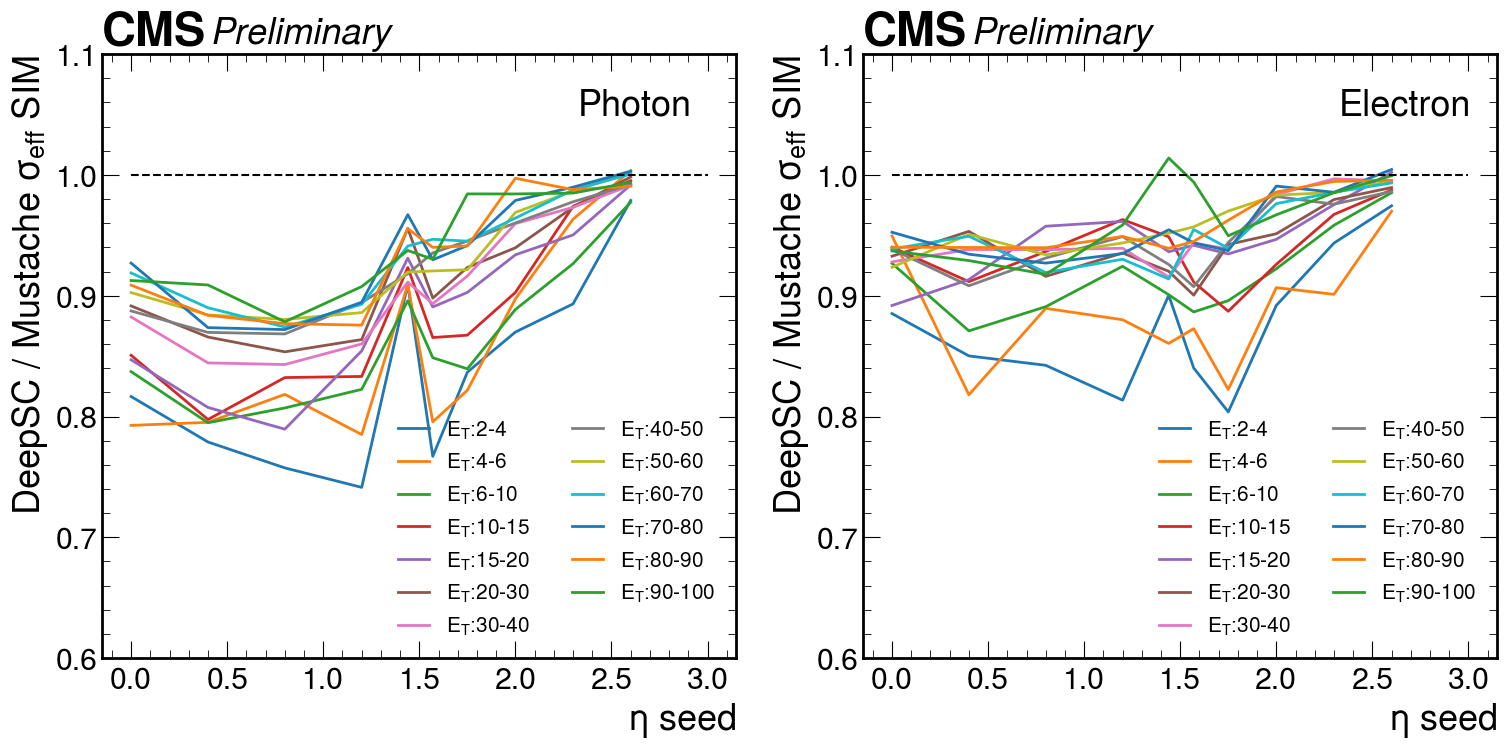

In [21]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

df = df_gamma
flavour = "Photon"
ets = [2, 4,6, 10,15,20,30,40,50,60,70,80,90,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(ets[:-1]):
    ax.plot(etas[:-1], res[res.et_bin == ieta].w68/res_must[res_must.et_bin == ieta].w68, label="$E_T$:{}-{}".format(ets[ieta], ets[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ax.legend(ncol=2, fontsize="xx-small")
ax.set_xlabel("$\eta$ seed")
ax.plot([0,3],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele
flavour = "Electron"

ets = [2, 4,6,10,15,20,30,40,50,60,70,80,90,100]
etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(ets[:-1]):
    ay.plot(etas[:-1], res[res.et_bin == ieta].w68/res_must[res_must.et_bin == ieta].w68, label="$E_T$:{}-{}".format(ets[ieta], ets[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ay.legend(ncol=2, loc="lower right", fontsize="xx-small")
ay.set_xlabel("$\eta$ seed")
ay.plot([0,3],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

In [40]:
res

eta_bin et_bin         m       w68       w95
0         0      0  0.262364  0.090798 -0.324589
1         1      0  0.085619  0.099456 -0.339115
2         2      0  0.747623  0.114367 -0.298131
3         3      0  0.859138  0.122136 -0.288386
4         4      0  0.027279  0.222332 -0.451603
..      ...    ...       ...       ...       ...
125       5     12  0.969631  0.014725 -0.030421
126       6     12  0.996468  0.014303 -0.028581
127       7     12  1.003564  0.017138 -0.035119
128       8     12  0.989091  0.029903 -0.064223
129       9     12  1.013685  0.041754 -0.089853

[130 rows x 5 columns]

Text(0.75, 1.02, 'Photon')

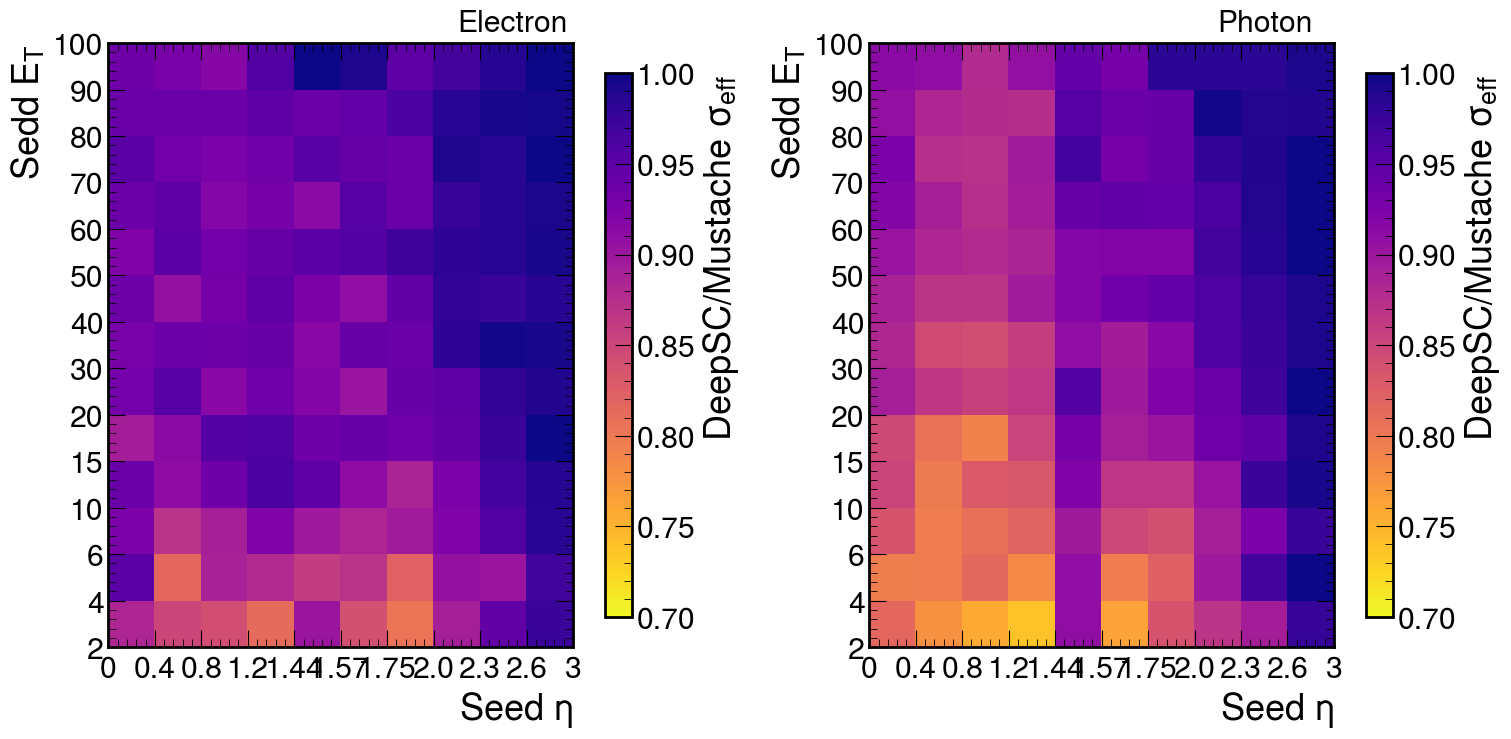

In [54]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18, 8),dpi=100, )
plt.subplots_adjust( wspace=0.2)

df = df_ele
flavour = "Electron"
ets = [2, 4,6, 10,15,20,30,40,50,60,70,80,90,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


vmax=1
vmin =0.7

a1 = res.w68.values.reshape((len(etas)-1,len(ets)-1))
a1[a1==0] = np.nan
a2 = res_must.w68.values.reshape((len(etas)-1,len(ets)-1))
a2[a2==0] = np.nan

A = ax.imshow((a1/a2).T, vmin=vmin, vmax=vmax, cmap="plasma_r")
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("Sedd $E_T$")
fig.colorbar(A , label="DeepSC/Mustache $\sigma_{eff}$", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(etas)

ax.text(0.75, 1.02, flavour, transform=ax.transAxes,  fontsize="small")

df = df_gamma
flavour = "Photon"
ets = [2, 4,6, 10,15,20,30,40,50,60,70,80,90,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


a1 = res.w68.values.reshape((len(etas)-1,len(ets)-1))
a1[a1==0] = np.nan
a2 = res_must.w68.values.reshape((len(etas)-1,len(ets)-1))
a2[a2==0] = np.nan

A = ay.imshow((a1/a2).T, vmin=vmin, vmax=vmax, cmap="plasma_r")
ay.set_xlabel("Seed $\eta$")
ay.set_ylabel("Sedd $E_T$")
fig.colorbar(A , label="DeepSC/Mustache $\sigma_{eff}$", ax=ay, shrink=0.9)

ay.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ay.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ay.set_yticklabels(ets)
ay.set_xticklabels(etas)

ax.text(0.75, 1.02, flavour, transform=ay.transAxes,  fontsize="small")


<ipython-input-59-3adfae21c3e0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
<ipython-input-59-3adfae21c3e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))
<ipython-input-59-3adfae21c3e0>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

<ipython-input-59-3adfae21c3e0>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
<ipython-input-59-3adfae21c3e0>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


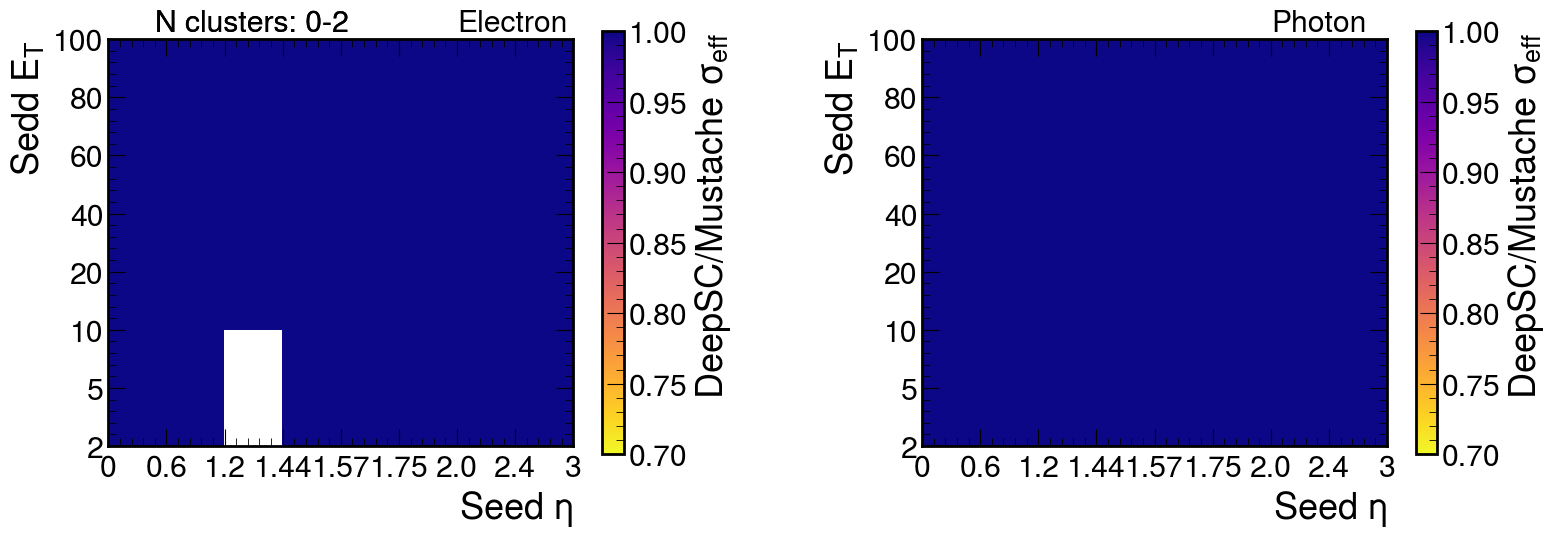

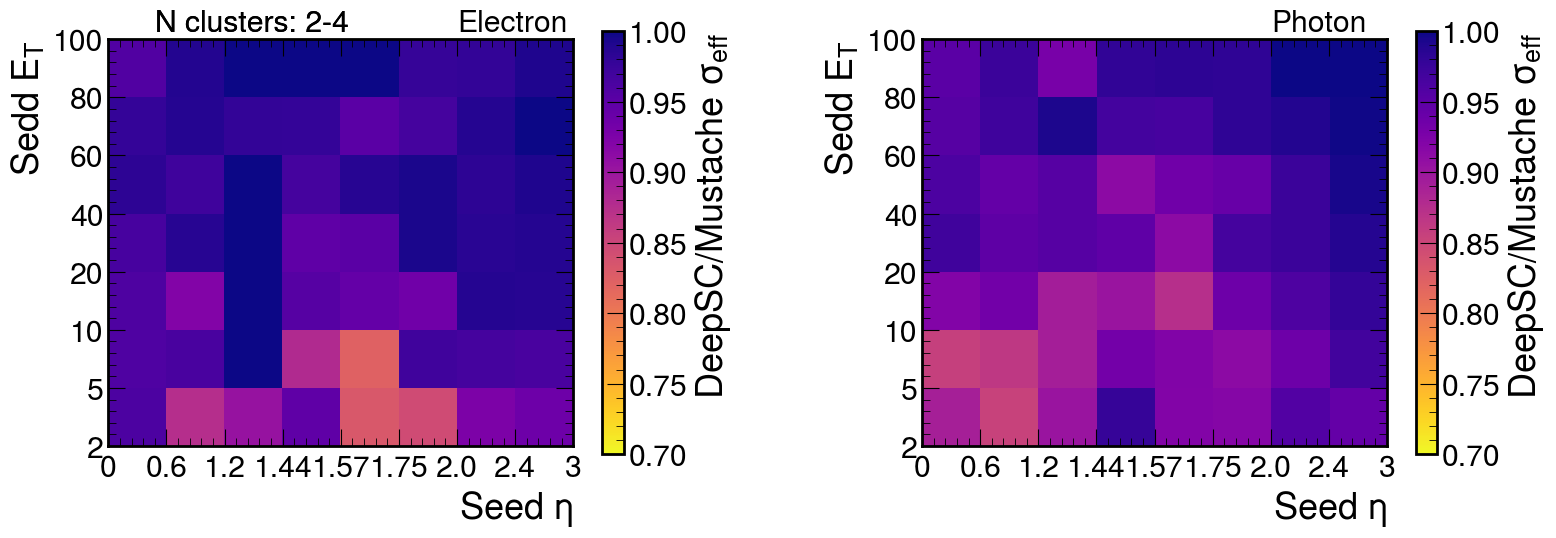

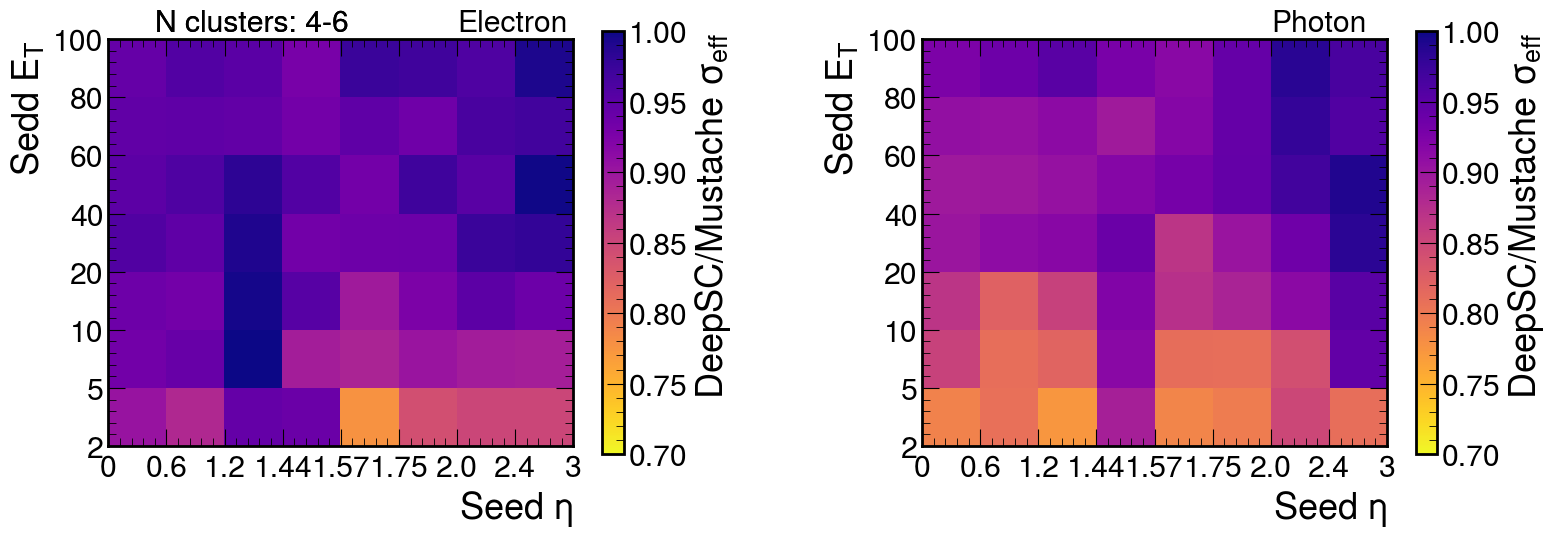

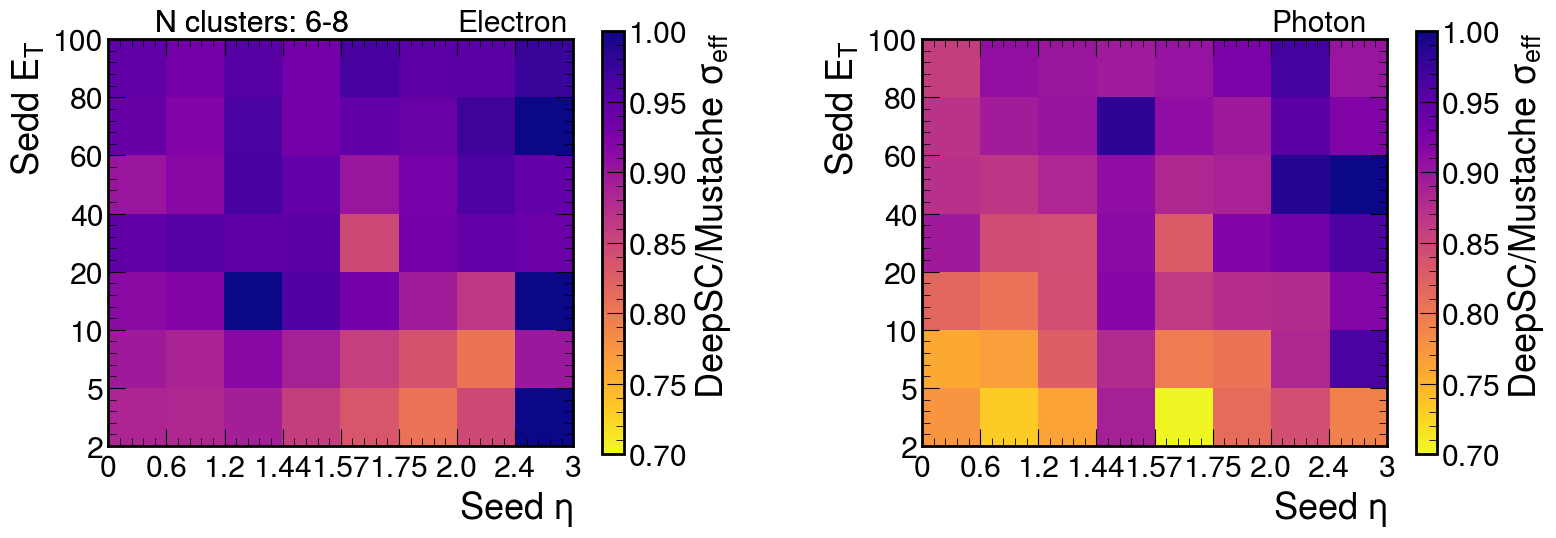

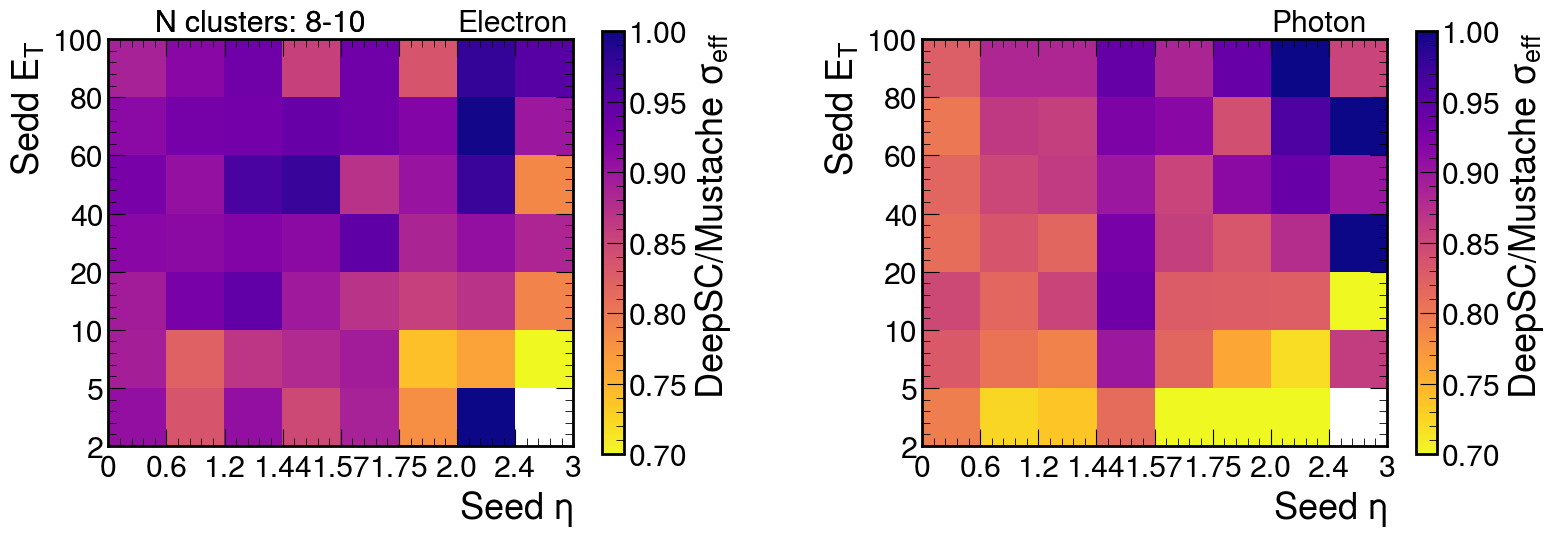

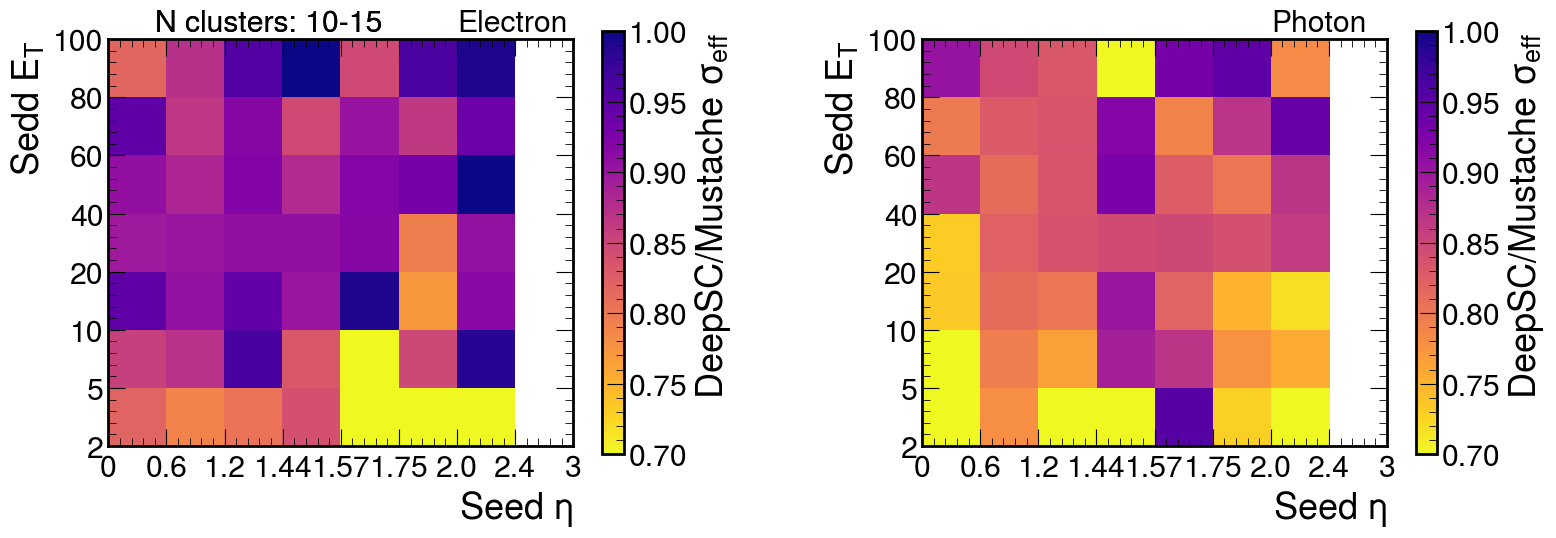

In [59]:

ncls = [0,2,4,6,8,10,15]
for icl in range(len(ncls)-1):

    fig, (ax, ay) = plt.subplots(1,2, figsize=(18, 8),dpi=100, )
    plt.subplots_adjust( wspace=0.4)


    df = df_ele.loc[ (df_ele.ncls >=ncls[icl]) & (df_ele.ncls <ncls[icl+1])]
    flavour = "Electron"
    ets = [2, 5, 10, 20, 40,60,80,100]
    etas = [0, 0.6, 1.2,1.44, 1.57, 1.75, 2., 2.4, 3]
    df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


    res = df.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
    res_must = df.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)


    vmax=1
    vmin =0.7

    a1 = res.w68.values.reshape((len(etas)-1,len(ets)-1))
    a1[a1==0] = np.nan
    a2 = res_must.w68.values.reshape((len(etas)-1,len(ets)-1))
    a2[a2==0] = np.nan

    A = ax.imshow((a1/a2).T, vmin=vmin, vmax=vmax, cmap="plasma_r")
    ax.set_xlabel("Seed $\eta$")
    ax.set_ylabel("Sedd $E_T$")
    fig.colorbar(A , label="DeepSC/Mustache $\sigma_{eff}$", ax=ax, shrink=0.7)

    ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
    ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
    ax.set_yticklabels(ets)
    ax.set_xticklabels(etas)
    
    ax.text(0.75, 1.02, flavour, transform=ax.transAxes,  fontsize="small")
    ax.text(0.1, 1.02, "N clusters: {}-{}".format(ncls[icl], ncls[icl+1]), transform=ax.transAxes,  fontsize="small")

    df = df_gamma.loc[ (df_gamma.ncls >=ncls[icl]) & (df_gamma.ncls <ncls[icl+1])]
    flavour = "Photon"
    ets = [2, 5, 10, 20, 40,60,80,100]
    etas = [0, 0.6, 1.2,1.44, 1.57, 1.75, 2., 2.4, 3]
    df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


    res = df.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
    res_must = df.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)


    a1 = res.w68.values.reshape((len(etas)-1,len(ets)-1))
    a1[a1==0] = np.nan
    a2 = res_must.w68.values.reshape((len(etas)-1,len(ets)-1))
    a2[a2==0] = np.nan

    A = ay.imshow((a1/a2).T, vmin=vmin, vmax=vmax, cmap="plasma_r")
    ay.set_xlabel("Seed $\eta$")
    ay.set_ylabel("Sedd $E_T$")
    fig.colorbar(A , label="DeepSC/Mustache $\sigma_{eff}$", ax=ay, shrink=0.7)

    ay.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
    ay.set_xticks(np.arange(len(etas))- 0.5, minor=False)
    ay.set_yticklabels(ets)
    ay.set_xticklabels(etas)

    ax.text(0.75, 1.02, flavour, transform=ay.transAxes,  fontsize="small")
    ax.text(0.1, 1.02, "N clusters: {}-{}".format(ncls[icl], ncls[icl+1]), transform=ax.transAxes,  fontsize="small")


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

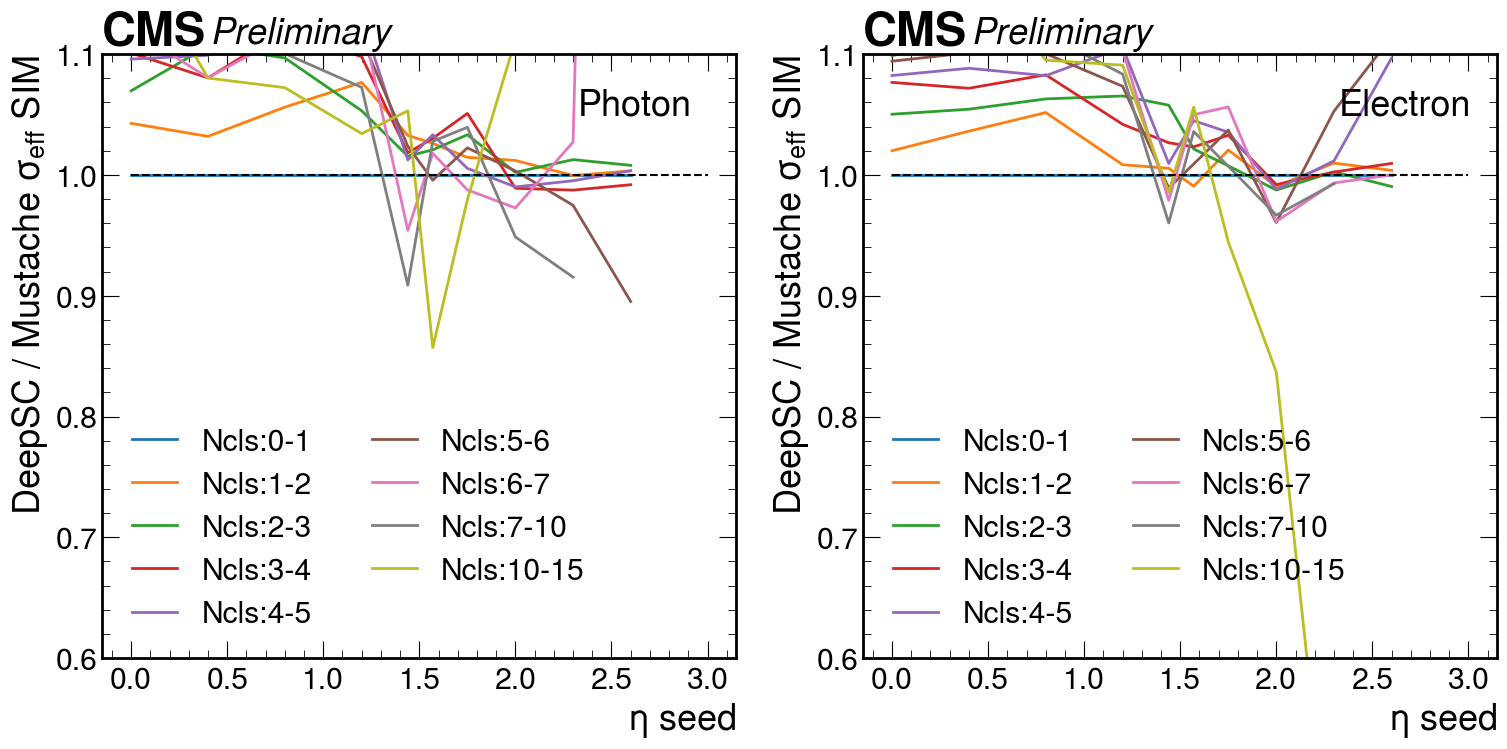

In [13]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

df = df_gamma
flavour ="Photon"
etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
ncls = [0,1,2,3,4,5,6,7,10,15]
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


res = df.groupby(["eta_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["eta_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(ncls[:-1]):
    ax.plot(etas[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ax.legend(ncol=2)
ax.set_xlabel("$\eta$ seed")
ax.plot([0,3],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele
flavour = "Electron"

etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
ncls = [0,1,2,3,4,5,6,7,10,15]
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


res = df.groupby(["eta_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["eta_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(ncls[:-1]):
    ay.plot(etas[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ay.legend(ncol=2)
ay.set_xlabel("$\eta$ seed")
ay.plot([0,3],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

In [14]:
df.columns

Index(['ncls', 'ncls_true', 'ncls_sel', 'ncls_sel_true', 'ncls_sel_must',
       'ncls_sel_must_true', 'Et_tot', 'En_tot', 'Et_true', 'Et_sel',
       'Et_sel_true', 'En_true', 'En_true_sim', 'En_true_sim_good',
       'En_true_gen', 'En_sel', 'En_sel_true', 'En_sel_corr', 'Et_ovEtrue',
       'En_ovEtrue', 'En_ovEtrue_sim', 'En_ovEtrue_sim_good',
       'EnTrue_ovEtrue_sim', 'EnTrue_ovEtrue_sim_good', 'Et_sel_must',
       'En_sel_must', 'Et_sel_must_true', 'En_sel_must_true',
       'Et_ovEtrue_mustache', 'En_ovEtrue_mustache', 'En_ovEtrue_sim_mustache',
       'En_ovEtrue_sim_good_mustache', 'en_regr_factor', 'En_ovEtrue_gen',
       'En_ovEtrue_gen_mustache', 'En_ovEtrue_gen_corr', 'flavour', 'seed_eta',
       'seed_phi', 'seed_ieta', 'seed_iphi', 'seed_iz', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_r9', 'seed_swissCross',
       'seed_nxtals', 'max_en_cluster', 'max_et_cluster', 'max_deta_cluster',
       'max_dphi_cluster', 'max_den_cluster', 'max_det_

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

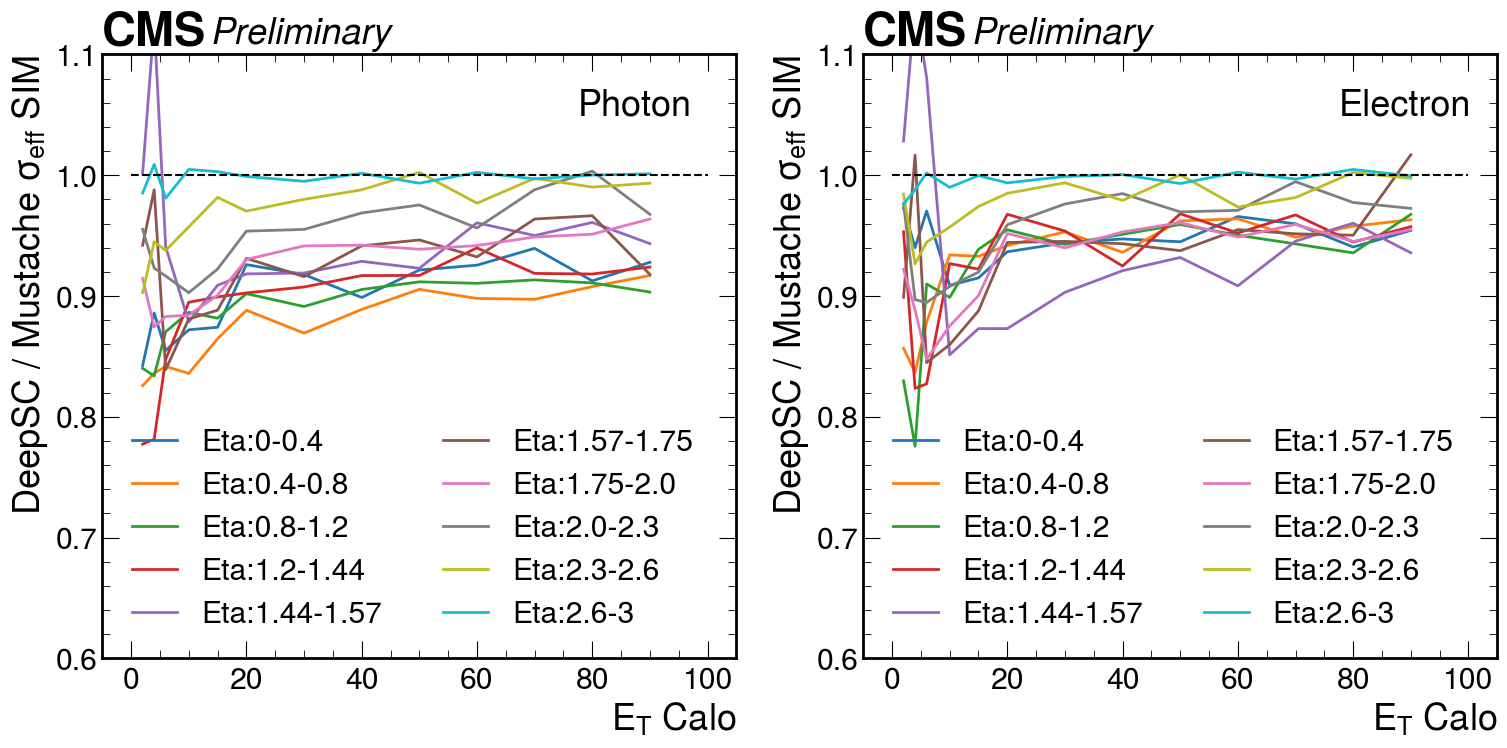

In [15]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

df = df_gamma
flavour = "Photon"
ets = [2, 4,6, 10,15,20,30,40,50,60,70,80,90,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.En_true_sim_good / np.cosh(df.sim_true_eta) , ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))



res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(etas[:-1]):
    ax.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ax.legend(ncol=2)
ax.set_xlabel("$E_T$ Calo")
ax.plot([0,100],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele
flavour = "Electron"

ets = [2, 4,6,10,15,20,30,40,50,60,70,80,90,100]
etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.En_true_sim_good / np.cosh(df.sim_true_eta) , ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(etas[:-1]):
    ay.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ay.legend(ncol=2)
ay.set_xlabel("$E_T$ Calo")
ay.plot([0,100],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

# Window classification

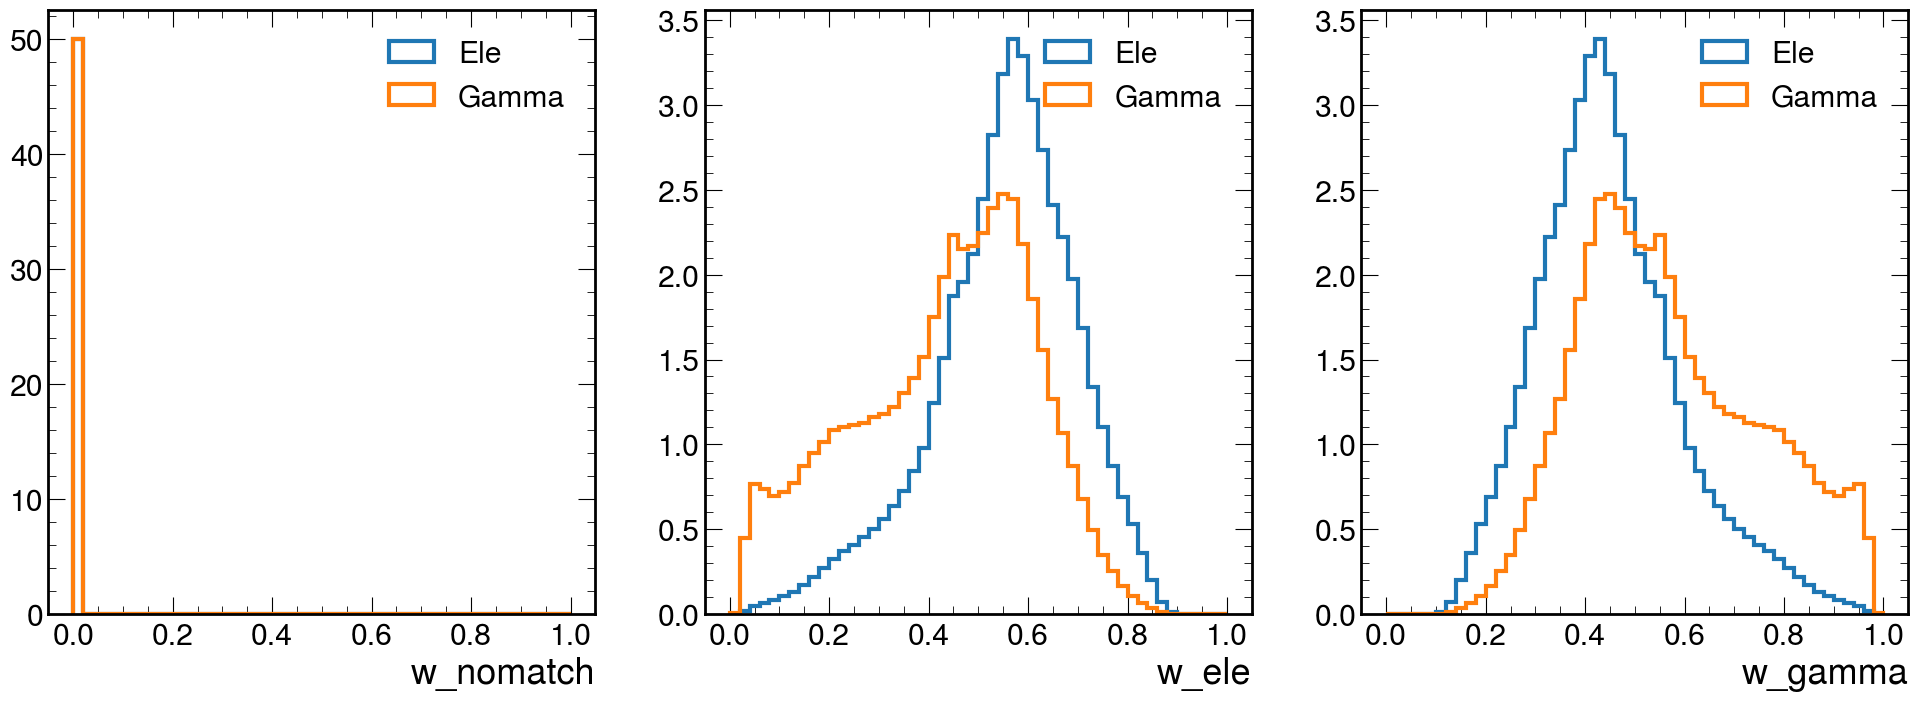

In [26]:
fig, ax = plt.subplots(1,3, figsize=(24,8),dpi=100)

for i, v in enumerate(['w_nomatch','w_ele','w_gamma']):
#     ax[i].hist(df_nomatch[v], bins=50, range=(0,1), histtype="step", density=True, linewidth=3, label="No matched")
    ax[i].hist(df_ele[v], bins=50, range=(0,1), histtype="step", density=True, linewidth=3, label="Ele")
    ax[i].hist(df_gamma[v], bins=50, range=(0,1), histtype="step", density=True, linewidth=3, label="Gamma")
    ax[i].set_xlabel(v)
    ax[i].legend()

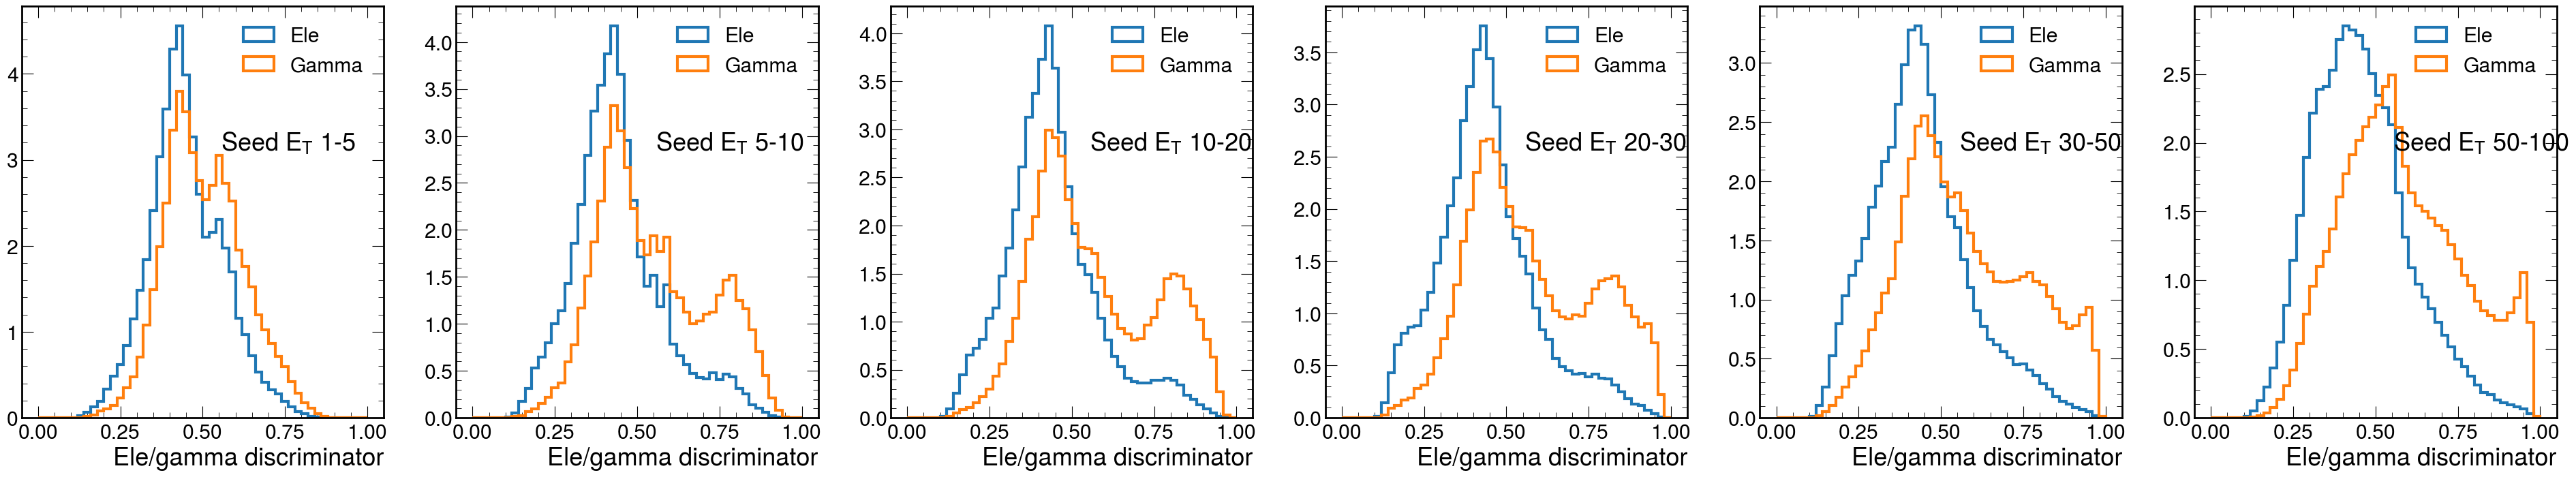

In [27]:
fig, ax = plt.subplots(1,6, figsize=(48,8),dpi=100)

ets = [1,5,10,20,30,50,100]

for iet in range(len(ets)-1):
#     ax[i].hist(df_nomatch[v], bins=50, range=(0,1), histtype="step", density=True, linewidth=3, label="No matched")
    ax[iet].hist(df_ele[(df_ele.et > ets[iet] ) & (df_ele.et_seed < ets[iet+1])]["w_gamma"], bins=50, range=(0,1), histtype="step", density=True, linewidth=3, label="Ele")
    ax[iet].hist(df_gamma[(df_gamma.et > ets[iet] ) & (df_gamma.et_seed < ets[iet+1])]["w_gamma"], bins=50, range=(0,1), histtype="step", density=True, linewidth=3, label="Gamma")
    ax[iet].set_xlabel("Ele/gamma discriminator")
    ax[iet].text(0.55,0.65, "Seed $E_T$ {}-{}".format(ets[iet],ets[iet+1]), transform=ax[iet].transAxes)
    ax[iet].legend()

In [28]:
def get_roc(df, true_fl, out):
    w_pos = df[df.flavour == true_fl][out].values
    w_neg = df[df.flavour != true_fl][out].values
    tot_pos = w_pos.shape[0]
    tot_neg = w_neg.shape[0]


    fpr, tpr, thresholds = [] , [], [] 
    for i in range(40):
        t = i/30.
        tp = np.sum(w_pos>t) / float(tot_pos)
        fp = np.sum(w_neg>t) / float(tot_neg)
        fpr.append(fp)
        tpr.append(tp)
        thresholds.append(i)
    return fpr, tpr
    
# roc_curve(df_tot.flavour, scores, pos_label=2)

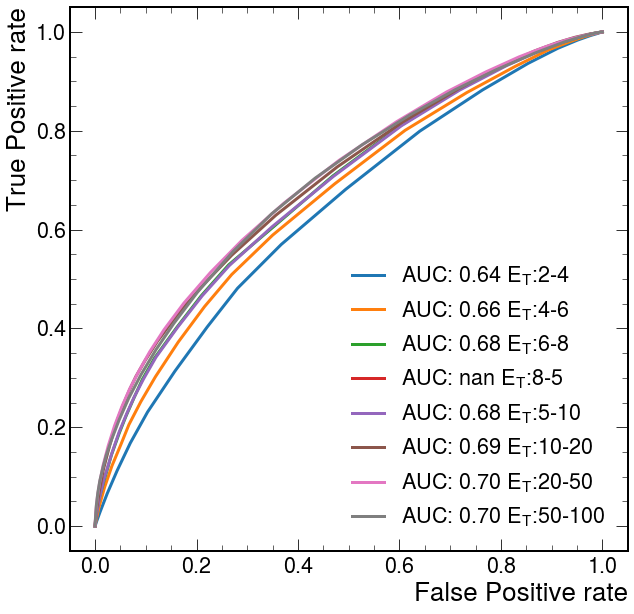

In [39]:
ets = [2,4,6,8, 5,10, 20,50,100]

for iet in range(len(ets)-1):
    fpr_nomat, tpr_nomat = get_roc(df_tot[(df_tot.et_seed >= ets[iet]) &(df_tot.et_seed < ets[iet+1])], 22, "w_gamma")
    plt.plot(fpr_nomat, tpr_nomat, label="AUC: {:.2f} $E_T$:{}-{}".format(auc(fpr_nomat, tpr_nomat), ets[iet], ets[iet+1]), linewidth=3)
   
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()

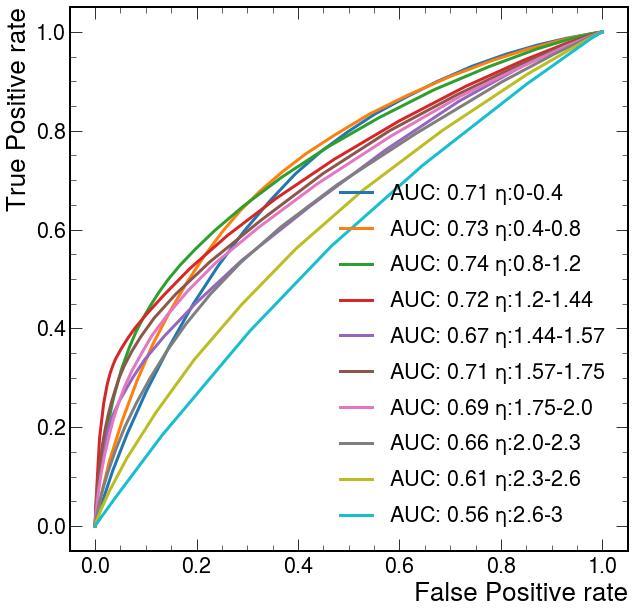

In [40]:
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]

for iet in range(len(etas)-1):
    fpr_nomat, tpr_nomat = get_roc(df_tot[(abs(df_tot.seed_eta) >= etas[iet]) &(abs(df_tot.seed_eta) < etas[iet+1])], 22, "w_gamma")
    plt.plot(fpr_nomat, tpr_nomat, label="AUC: {:.2f} $\eta$:{}-{}".format(auc(fpr_nomat, tpr_nomat), etas[iet], etas[iet+1]), linewidth=3)
   
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()

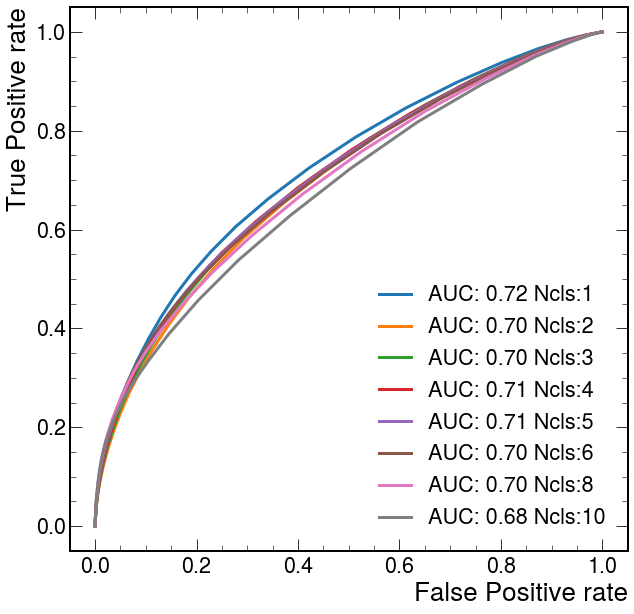

In [43]:
ncls = [1,2,3,4,5,6,8,10,15]

for iet in range(len(ncls)-1):
    fpr_nomat, tpr_nomat = get_roc(df_tot[(abs(df_tot.ncls) >= ncls[iet]) &(abs(df_tot.seed_eta) < ncls[iet+1])], 22, "w_gamma")
    plt.plot(fpr_nomat, tpr_nomat, label="AUC: {:.2f} Ncls:{}".format(auc(fpr_nomat, tpr_nomat),ncls[iet]), linewidth=3)
   
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()

# Precision/recall

In [24]:
ets = [0,5,10,15, 20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.479, 1.75,2.,2.3,2.6,3]
ncls = [1,2,3,5,10,12,15,17,20,25,30]
nvtx = [20,30,35,40,45,50,55,60,65,70,75,80,90,100,130]

df["eta_bin"] = pd.cut(abs(df.seed_eta), etas, labels=list(range(len(etas)-1)))
df["et_bin"] = pd.cut(df.et_seed, ets, labels=list(range(len(ets)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))
df["nvtx_bin"] = pd.cut(df.nVtx, nvtx, labels=list(range(len(nvtx)-1)))

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

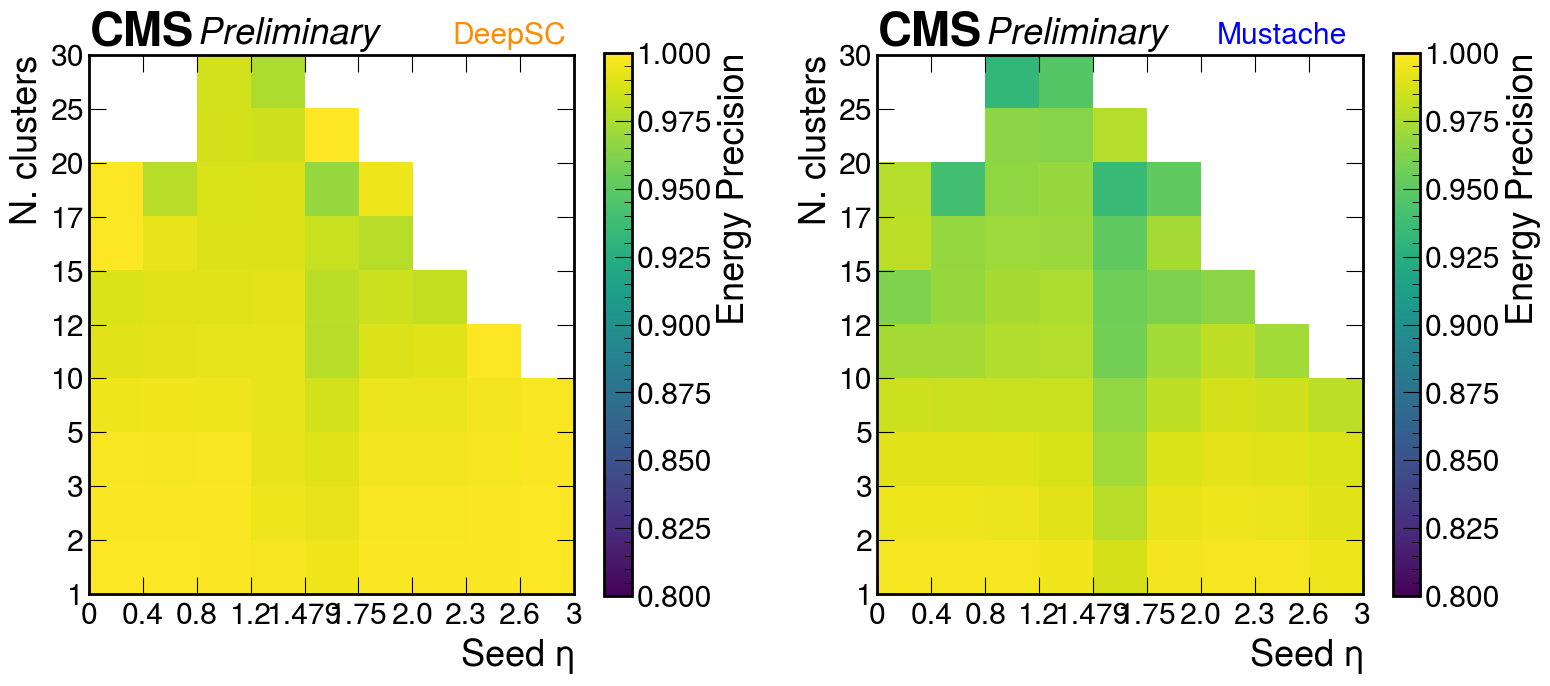

In [25]:
res_dsc =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.Et_sel_true/ gr.Et_sel).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.Et_sel_must_true / gr.Et_sel_must).mean())\
             .unstack(fill_value=0).stack()

vmin = min([min(res_dsc), min(res_mst)])
if vmin==0: vmin=0.8

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. clusters")
fig.colorbar(A , label="Energy Precision", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("N. clusters")
plt.colorbar(B , label="Energy Precision", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='darkorange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

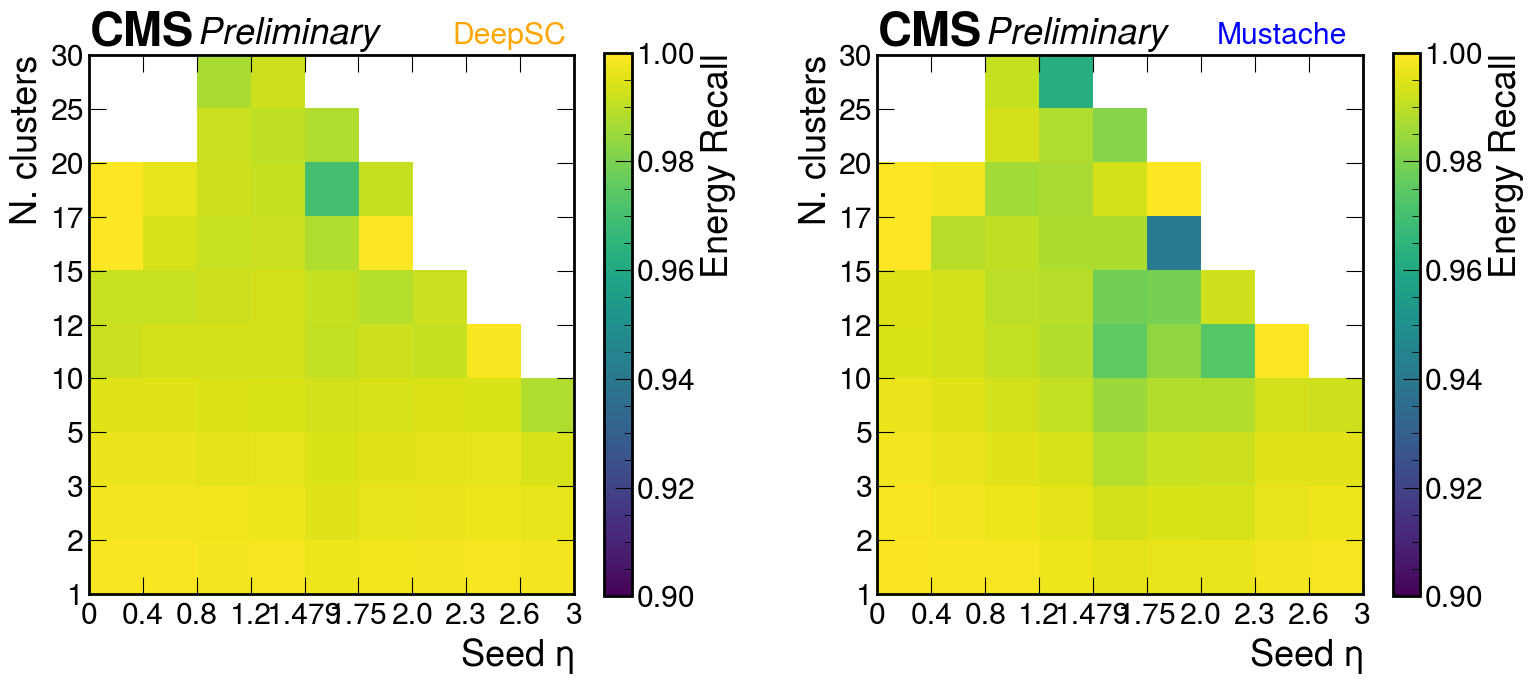

In [26]:
res_dsc =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.Et_sel_true/ gr.Et_true).mean())\
             .unstack(fill_value=0).stack()

res_mst =  df.groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.Et_sel_must_true / gr.Et_true).mean())\
             .unstack(fill_value=0).stack()

vmin = min(min(res_dsc), min(res_mst))
vmin =0.9

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. clusters")
fig.colorbar(A , label="Energy Recall", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("Seed $\eta$")
ab.set_ylabel("N. clusters")
plt.colorbar(B , label="Energy Recall", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='orange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)

# Energy regression

(0.001, 100.0)

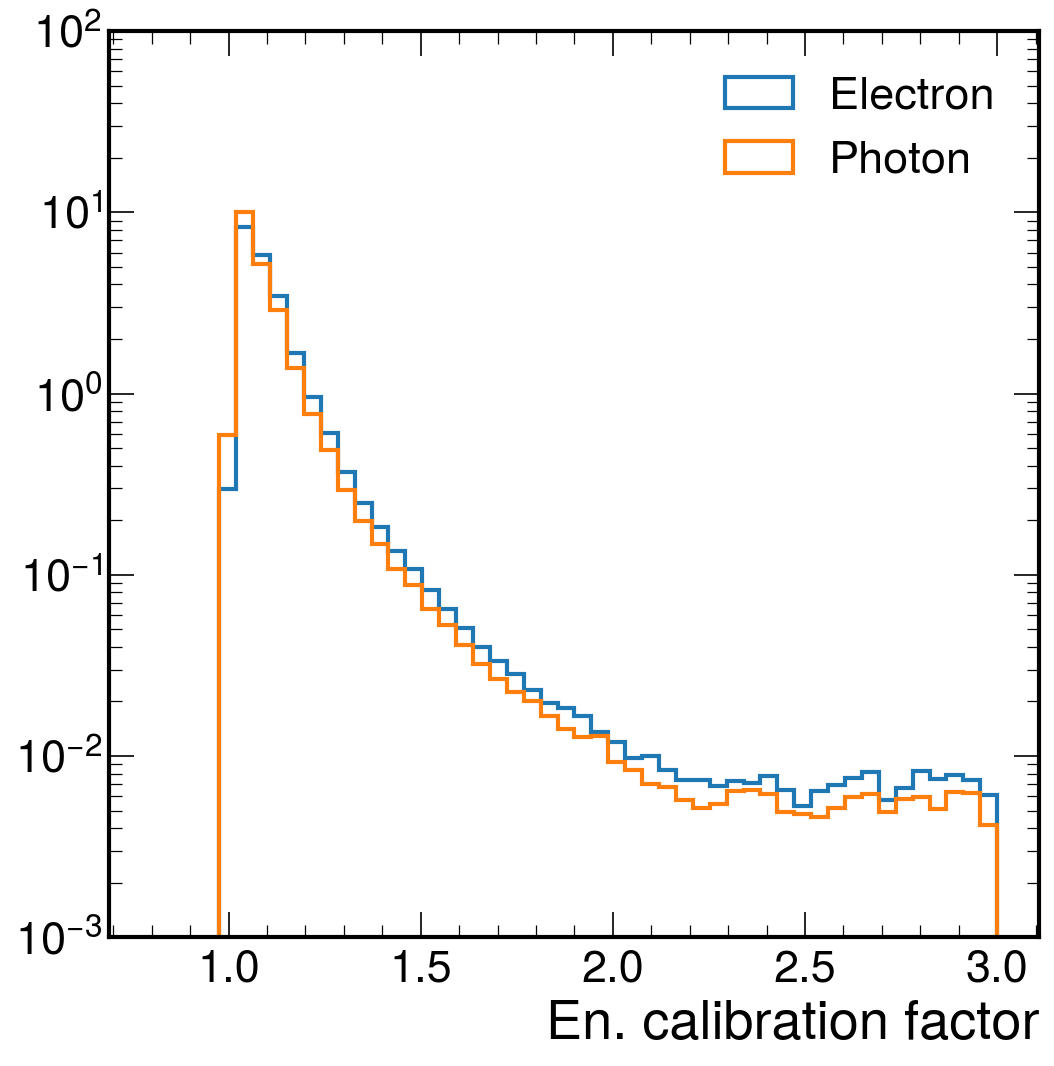

In [55]:
fig, ax = plt.subplots(1,1, figsize=(8,8),dpi=150)

plt.hist(df_ele.En_sel_corr / df_ele.En_sel, bins=50, range=(0.8,3), histtype="step", linewidth=2, density=True, label="Electron")
plt.hist(df_gamma.En_sel_corr / df_gamma.En_sel, bins=50, range=(0.8,3), histtype="step", linewidth=2, density=True, label="Photon")
plt.yscale("log")
plt.legend()
plt.xlabel("En. calibration factor")
plt.ylim(1e-3,1e2)

Text(1, 0, 'ieta')

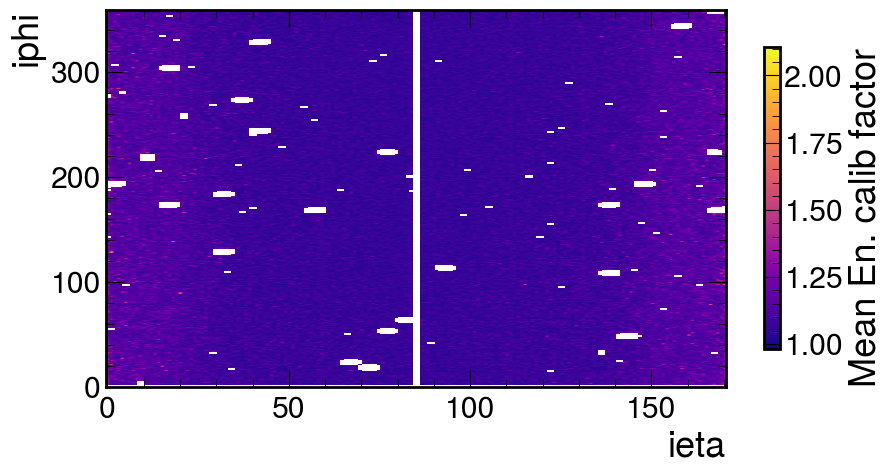

In [59]:
f, ax, = plt.subplots(1,1, figsize=(10,5), dpi=100)

df = df_ele
A = np.histogram2d(df[df.seed_iz==0].seed_ieta, df[df.seed_iz==0].seed_iphi, weights=df[df.seed_iz==0].En_sel_corr/df[df.seed_iz==0].En_sel , range=((-85,85),(0,360)), bins=(171,360))
A_count = np.histogram2d(df[df.seed_iz==0].seed_ieta, df[df.seed_iz==0].seed_iphi, range=((-85,85),(0,360)), bins=(171,360))
m1 = A[0]/A_count[0]
I1 = ax.imshow(m1.T, cmap="plasma", origin="lower", aspect="auto")
f.colorbar(I1, label="Mean En. calib factor", ax=ax, shrink=0.8)

ax.set_ylabel("iphi")
ax.set_xlabel("ieta")

Text(1, 0, 'iphi')

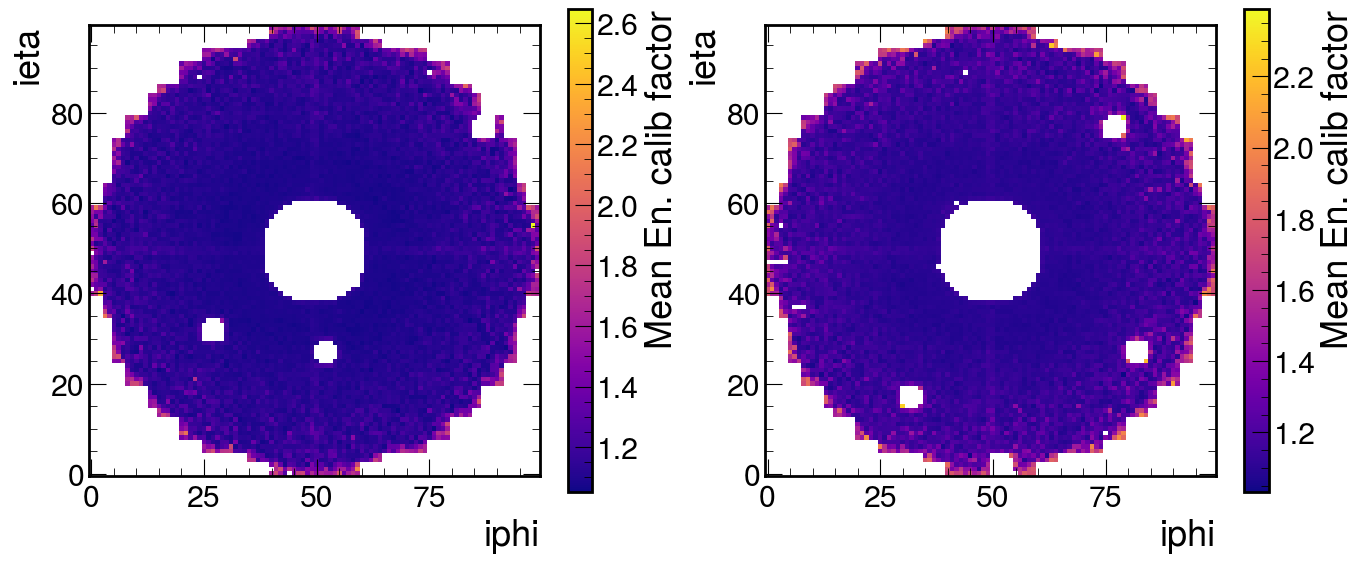

In [57]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

A = np.histogram2d(df_gamma[df_gamma.seed_iz==-1].seed_iphi, df_gamma[df_gamma.seed_iz==-1].seed_ieta, weights=df_gamma[df_gamma.seed_iz==-1].En_sel_corr /df_gamma[df_gamma.seed_iz==-1].En_sel ,range=((1,100),(1,100)), bins=(100,100) )
A_count = np.histogram2d(df_gamma[df_gamma.seed_iz==-1].seed_iphi,df_gamma[df_gamma.seed_iz==-1].seed_ieta, range=((1,100),(1,100)), bins=(100,100))
m1 = A[0]/A_count[0]
I1 = ax[0].imshow(m1, cmap="plasma")
f.colorbar(I1, label="Mean En. calib factor", ax=ax[0], shrink=0.8)

A2 = np.histogram2d(df_gamma[df_gamma.seed_iz==1].seed_iphi,df_gamma[df_gamma.seed_iz==1].seed_ieta, weights=df_gamma[df_gamma.seed_iz==1].En_sel_corr /df_gamma[df_gamma.seed_iz==1].En_sel,range=((1,100),(1,100)), bins=(100,100))
A2_count = np.histogram2d(df_gamma[df_gamma.seed_iz==1].seed_iphi,df_gamma[df_gamma.seed_iz==1].seed_ieta, range=((1,100),(1,100)), bins=(100,100))
m2 = A2[0]/A2_count[0]

I2 = ax[1].imshow(m2, cmap="plasma")
f.colorbar(I2, label="Mean En. calib factor", ax=ax[1], shrink=0.8)

ax[0].set_ylabel("ieta")
ax[0].set_xlabel("iphi")
ax[1].set_ylabel("ieta")
ax[1].set_xlabel("iphi")

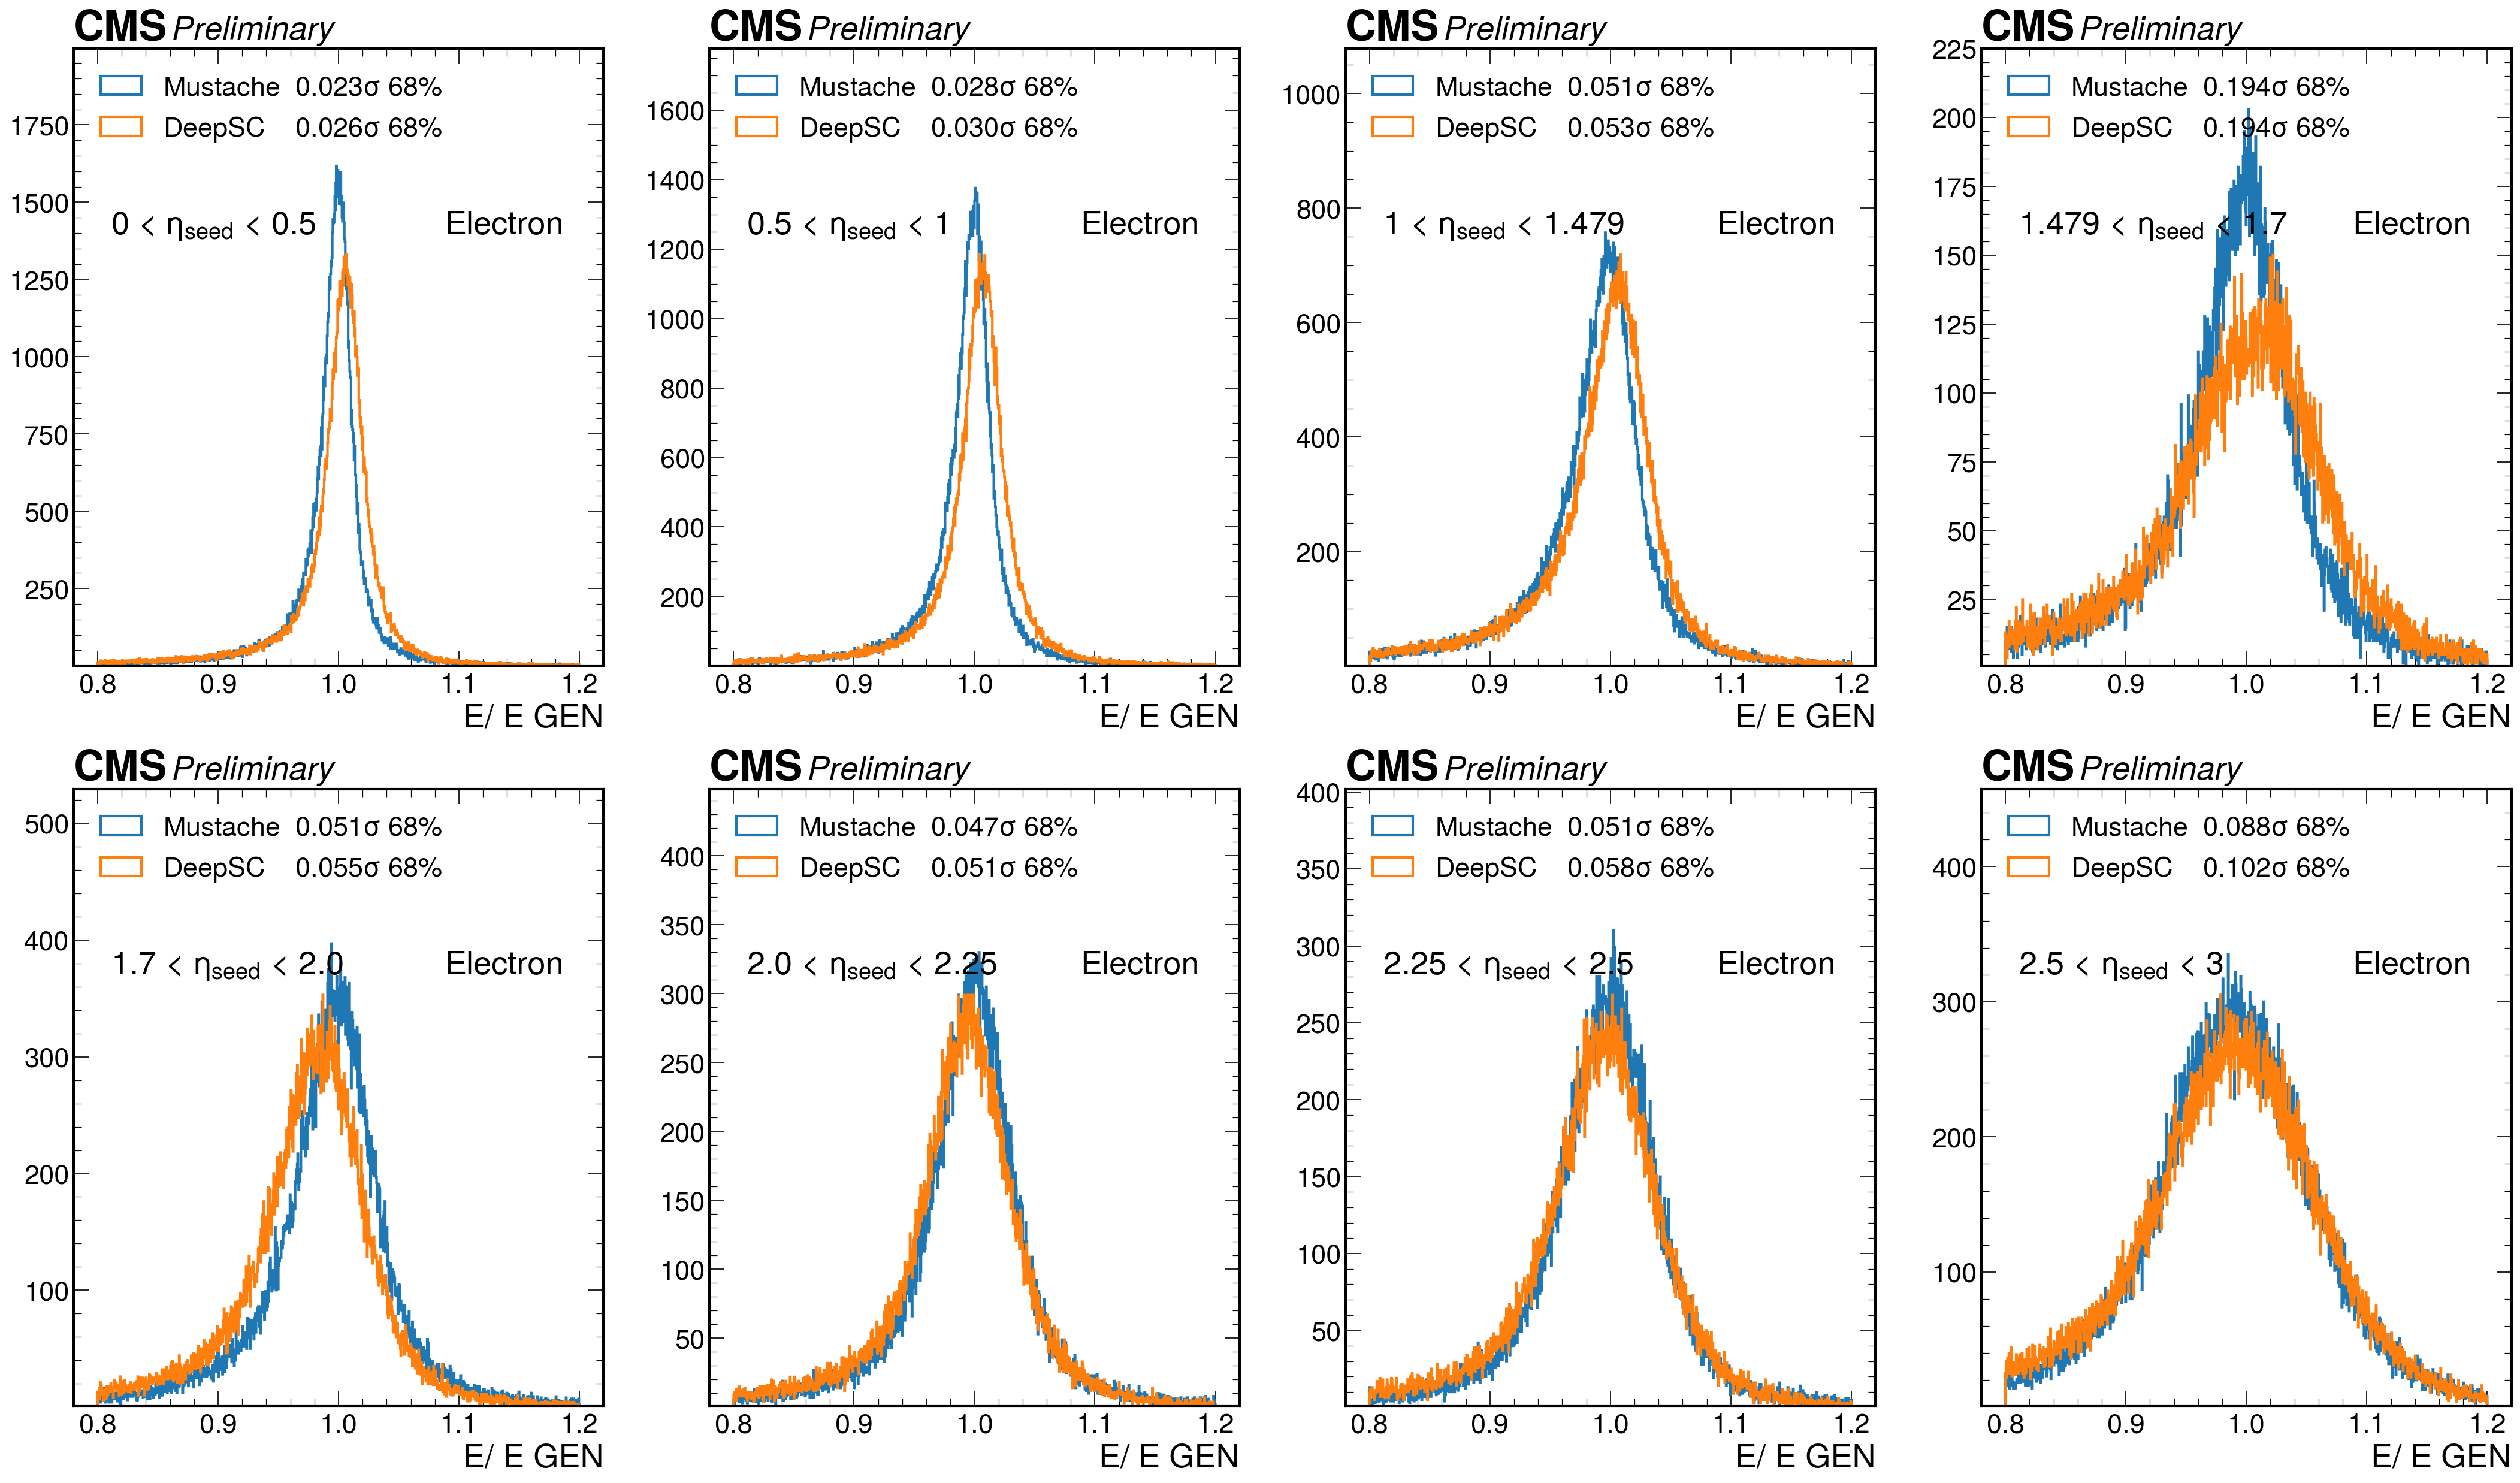

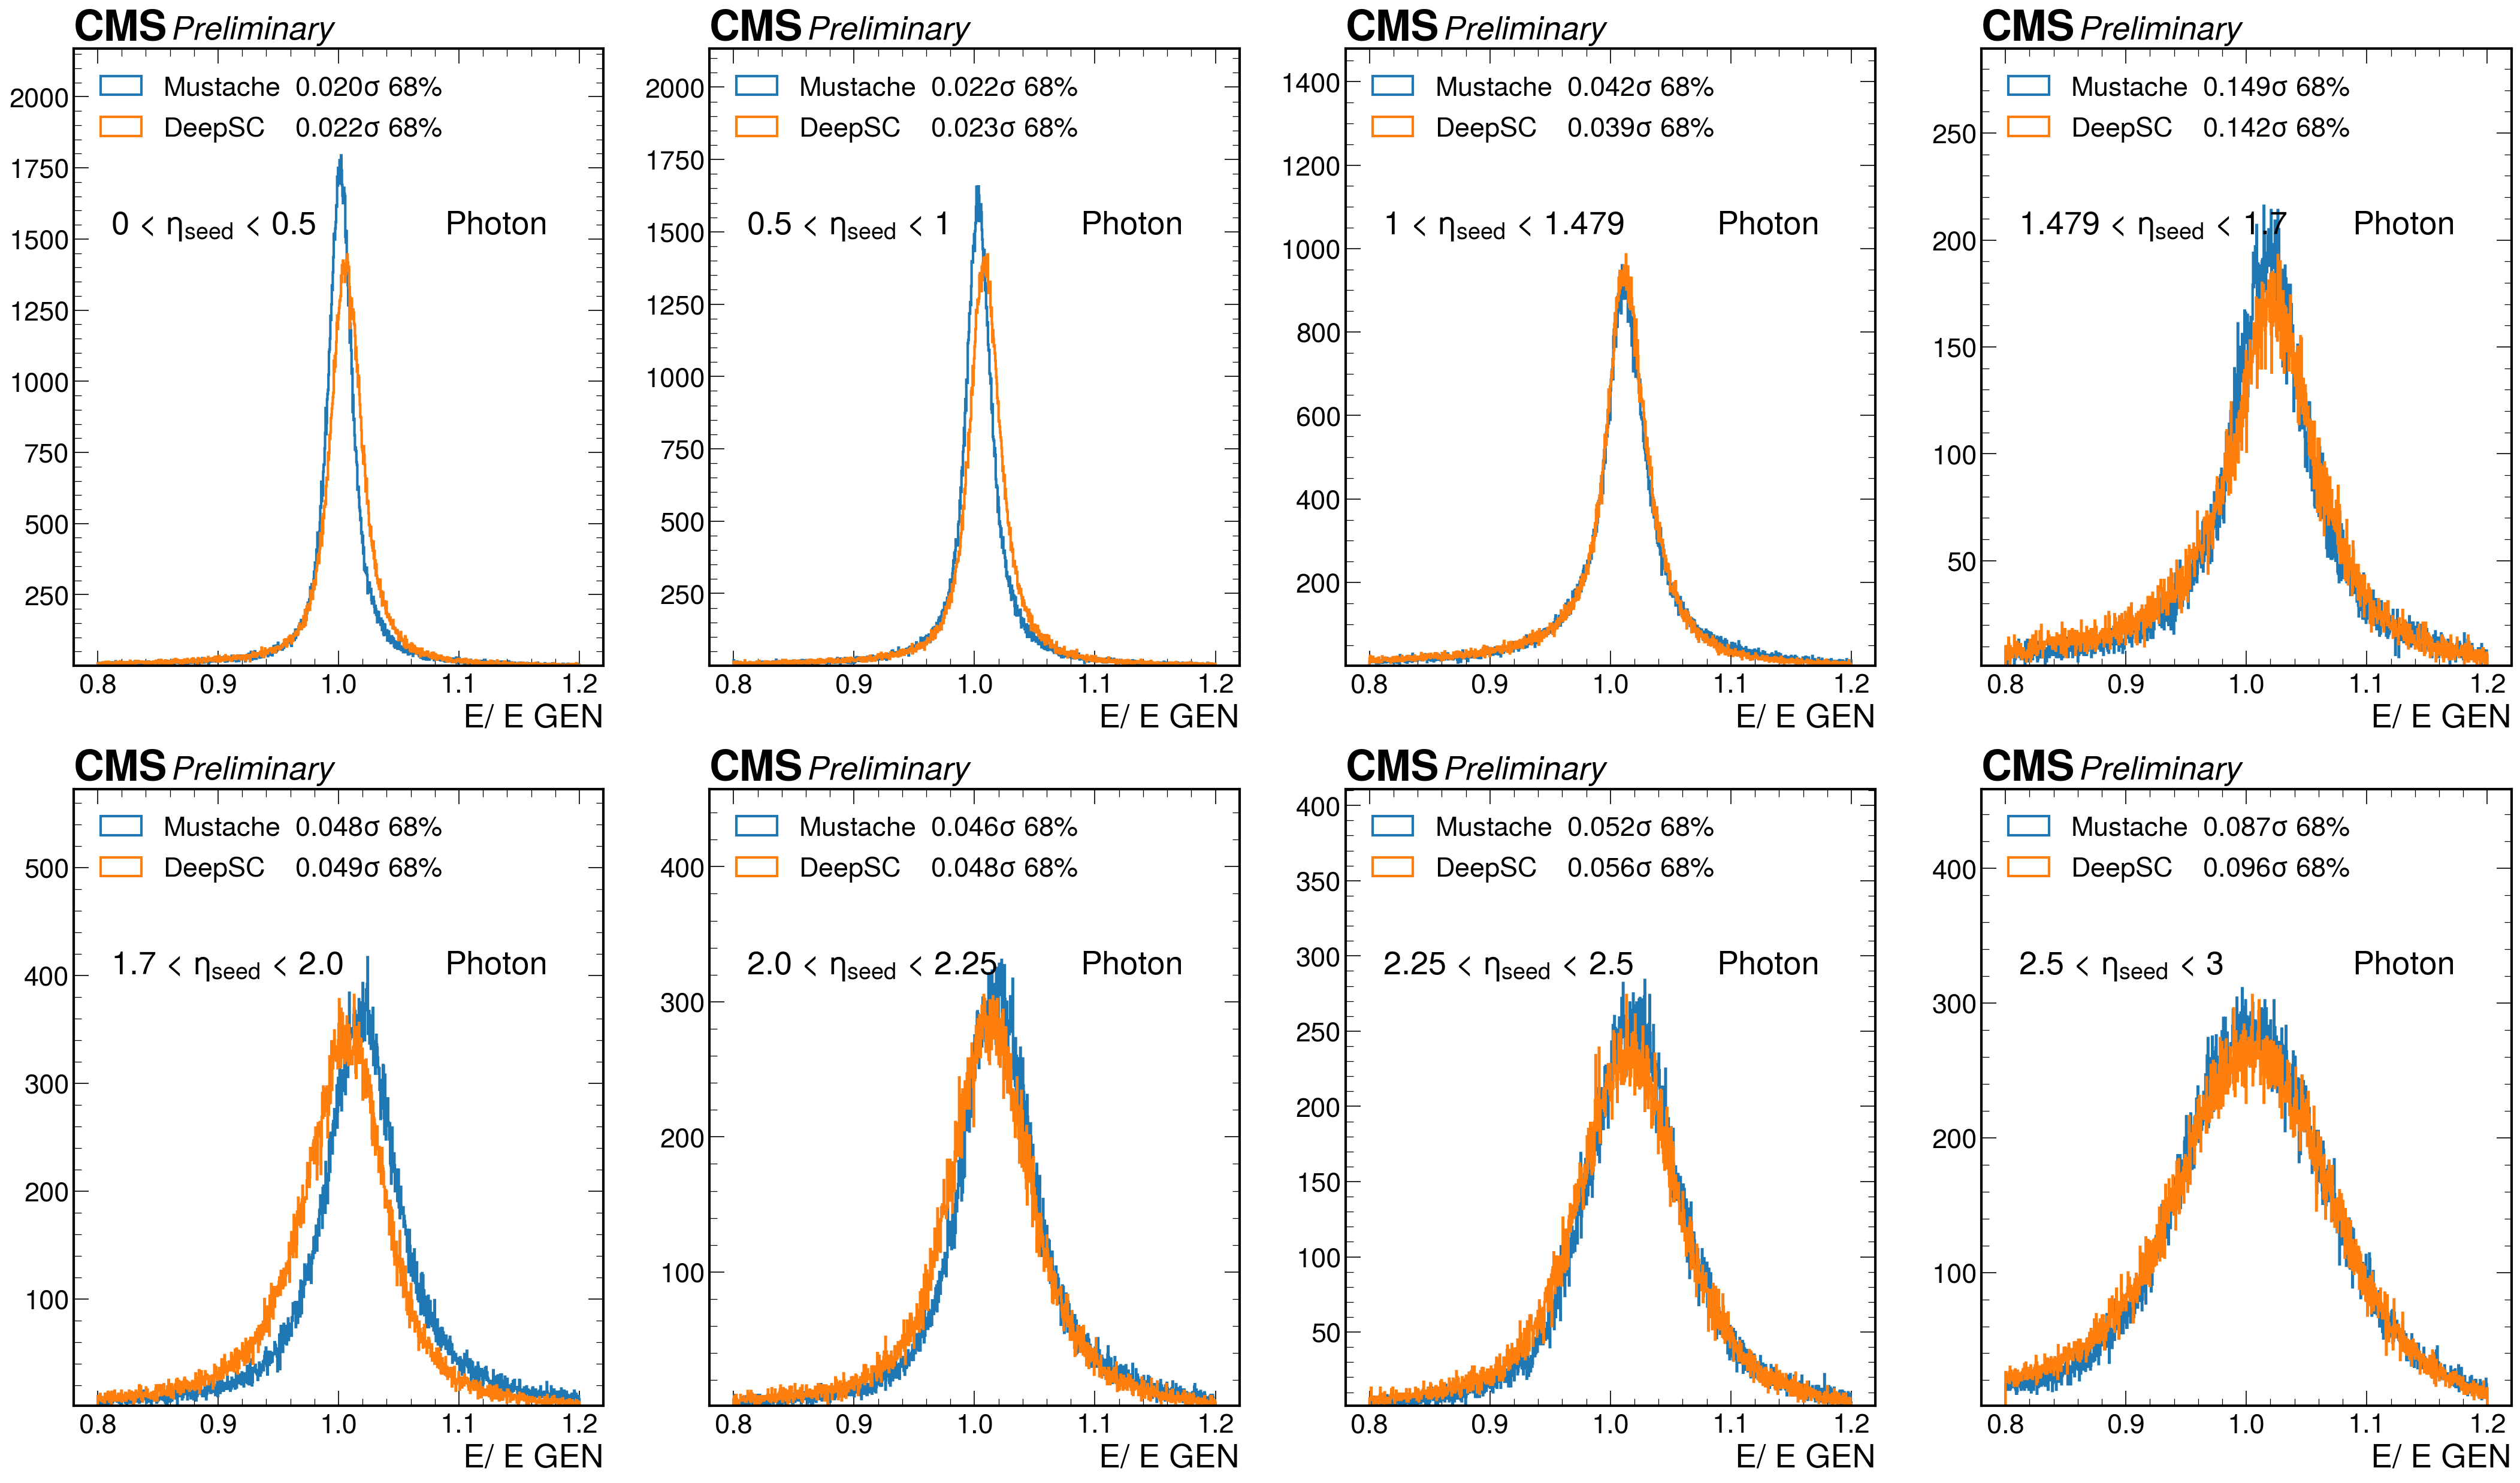

In [65]:
for df, flavour in zip([df_ele,df_gamma],["Electron","Photon"]):

    fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

    xrange = (0.8, 1.2)
    bins= 1000
    CL = 0.4


    r = [0, 0.5,1, 1.479, 1.7, 2.0, 2.25, 2.5, 3]
    s = [[], []]
    for i in range(len(r)-1):
        line = i //4 
        s[line].append((r[i],r[i+1]))

    for j,ss in enumerate(s): 
        for i, (e1,e2) in enumerate(ss): 
            dfx = df[(abs(df.seed_eta)>=e1) & (abs(df.seed_eta)<e2)]

            width, width_2 = get_sigma_eff(dfx.En_ovEtrue_gen_calib)
            width_must, width_2_must = get_sigma_eff(dfx.En_ovEtrue_gen_calib_mustache)
    #         rms_regr = dfx.En_ovEtrue_gen_corr.std()

            ax[j,i].hist(dfx.En_ovEtrue_gen_calib_mustache,bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache  {:.3f}$\sigma$ 68%'.format(width_must, CL))
            A= ax[j,i].hist(dfx.En_ovEtrue_gen_calib,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC    {:.3f}$\sigma$ 68%'.format(width, CL))
    #         ax[j,i].hist(dfx.En_ovEtrue_gen_corr,bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC +regre    RMS: {:.4f}'.format(rms_regr))
            maxY = np.max(A[0])
            ax[j,i].legend(loc="upper left")
    #         ax[j,i].set_yscale('log')
            ax[j,i].set_ylim(1, 1.5 * maxY)
            ax[j,i].set_xlabel("E/ E GEN")
            ax[j,i].text(0.07,0.7,  str(e1) + ' < $\eta_{seed}$ < ' + str(e2), transform = ax[j,i].transAxes)  
            ax[j,i].text(0.7, 0.7, flavour, transform=ax[j,i].transAxes)

            hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

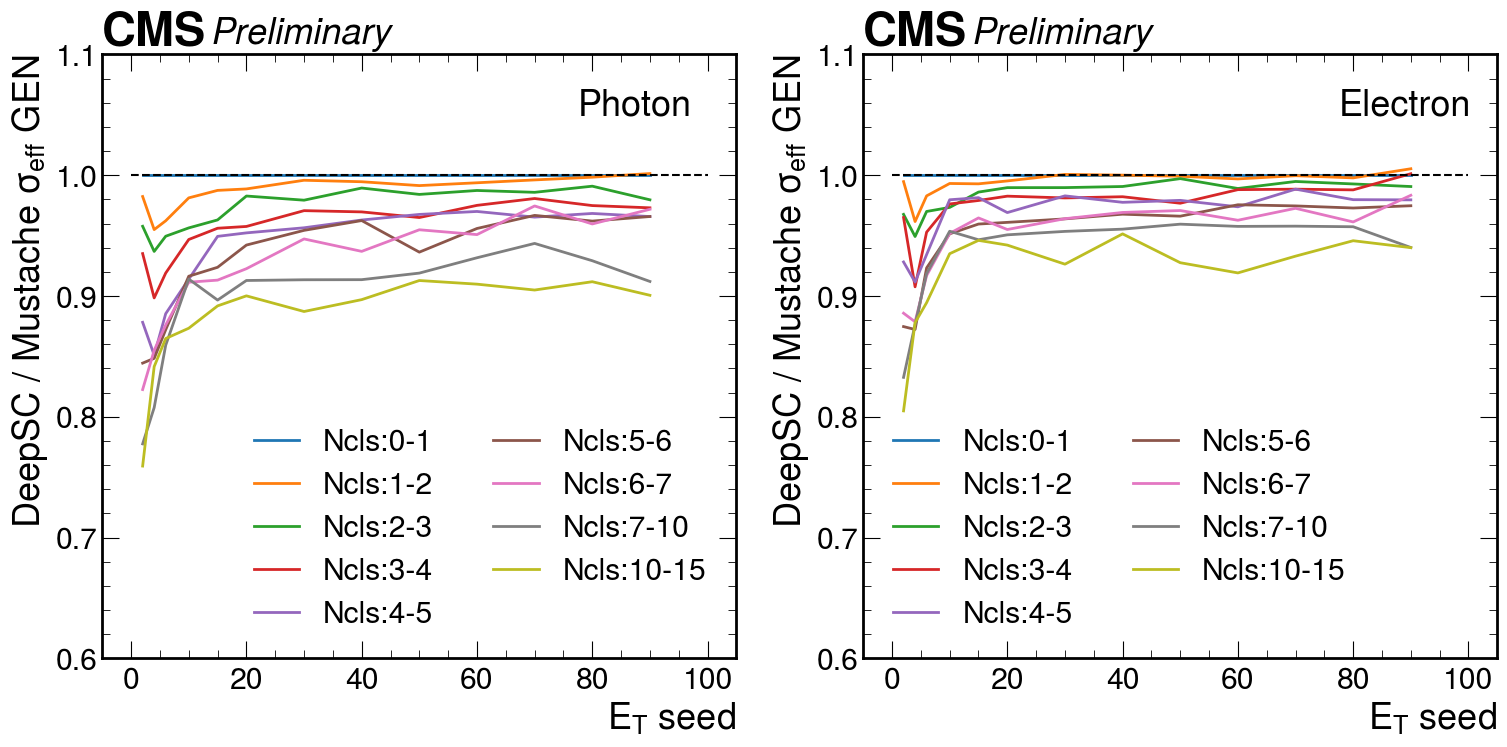

In [21]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

df = df_gamma
flavour ="Photon"
ets = [2,4,6,10,15,20,30,40,50,60,70,80,90,100]
ncls = [0,1,2,3,4,5,6,7,10,15]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_gen"))
res_must = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_gen_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(ncls[:-1]):
    ax.plot(ets[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ GEN")
ax.legend(ncol=2)
ax.set_xlabel("$E_T$ seed")
ax.plot([0,100],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele
flavour = "Electron"

ets = [2,4,6,10,15,20,30,40,50,60,70,80,90,100]
ncls = [0,1,2,3,4,5,6,7,10,15]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_gen"))
res_must = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_gen_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(ncls[:-1]):
    ay.plot(ets[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ GEN")
ay.legend(ncol=2)
ay.set_xlabel("$E_T$ seed")
ay.plot([0,100],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

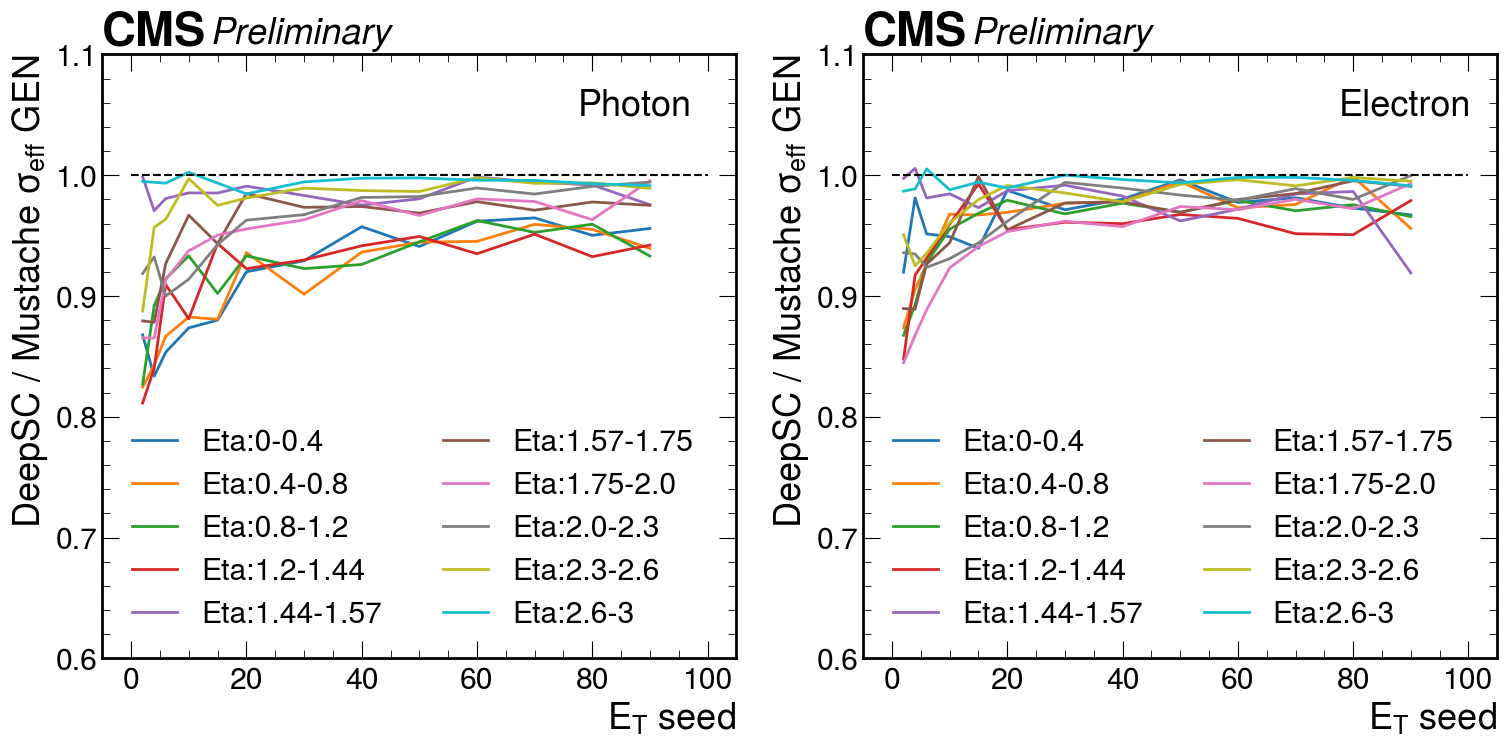

In [67]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

df = df_gamma
flavour = "Photon"
ets = [2, 4,6, 10,15,20,30,40,50,60,70,80,90,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_gen"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_gen_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(etas[:-1]):
    ax.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ GEN")
ax.legend(ncol=2)
ax.set_xlabel("$E_T$ seed")
ax.plot([0,100],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele
flavour = "Electron"

ets = [2, 4,6,10,15,20,30,40,50,60,70,80,90,100]
etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_gen"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_gen_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(etas[:-1]):
    ay.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ GEN")
ay.legend(ncol=2)
ay.set_xlabel("$E_T$ seed")
ay.plot([0,100],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

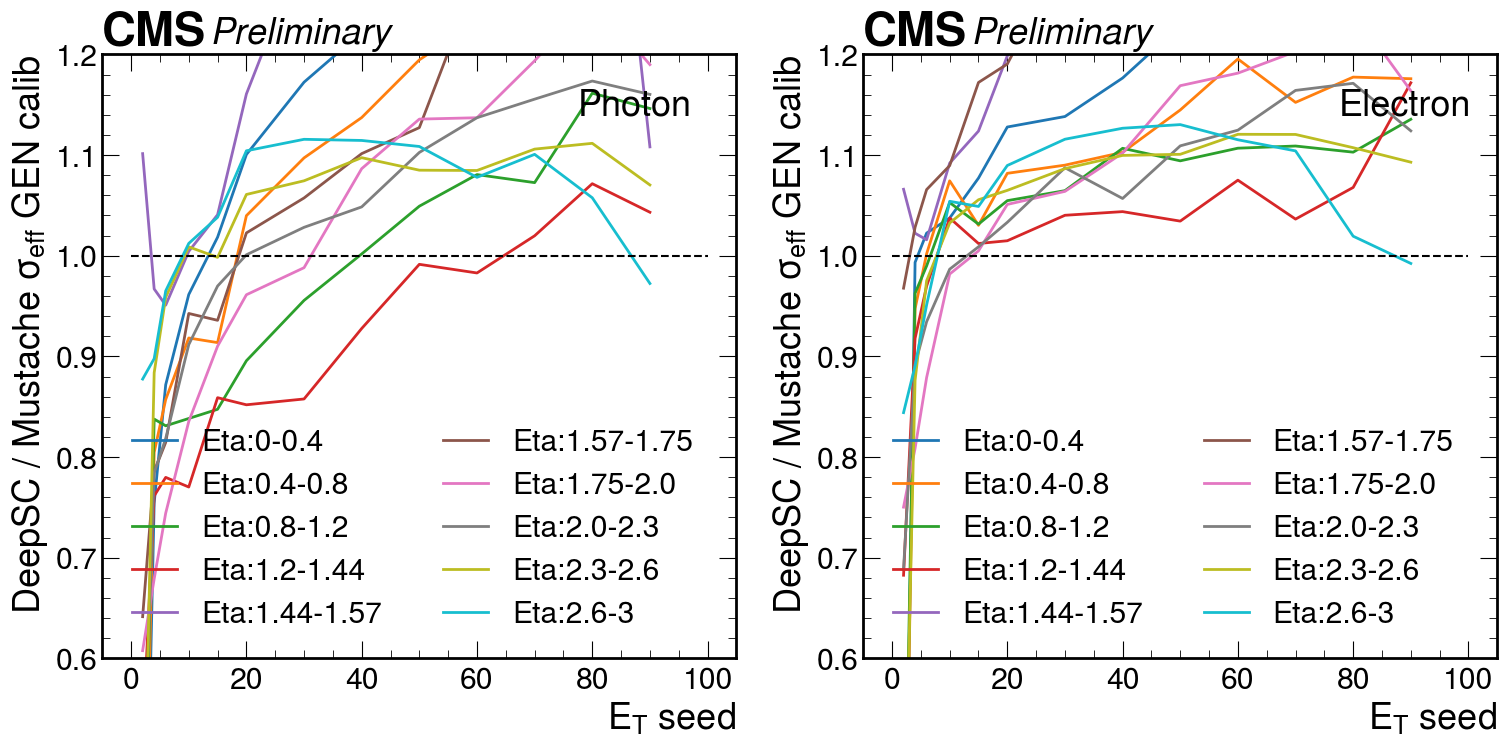

In [24]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

df = df_gamma
flavour = "Photon"
ets = [2, 4,6, 10,15,20,30,40,50,60,70,80,90,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_gen_calib"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_gen_calib_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(etas[:-1]):
    ax.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.2)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ GEN calib")
ax.legend(ncol=2)
ax.set_xlabel("$E_T$ seed")
ax.plot([0,100],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele
flavour = "Electron"

ets = [2, 4,6,10,15,20,30,40,50,60,70,80,90,100]
etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_gen_calib"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_gen_calib_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(etas[:-1]):
    ay.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.2)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ GEN calib")
ay.legend(ncol=2)
ay.set_xlabel("$E_T$ seed")
ay.plot([0,100],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

# Number of cluster study

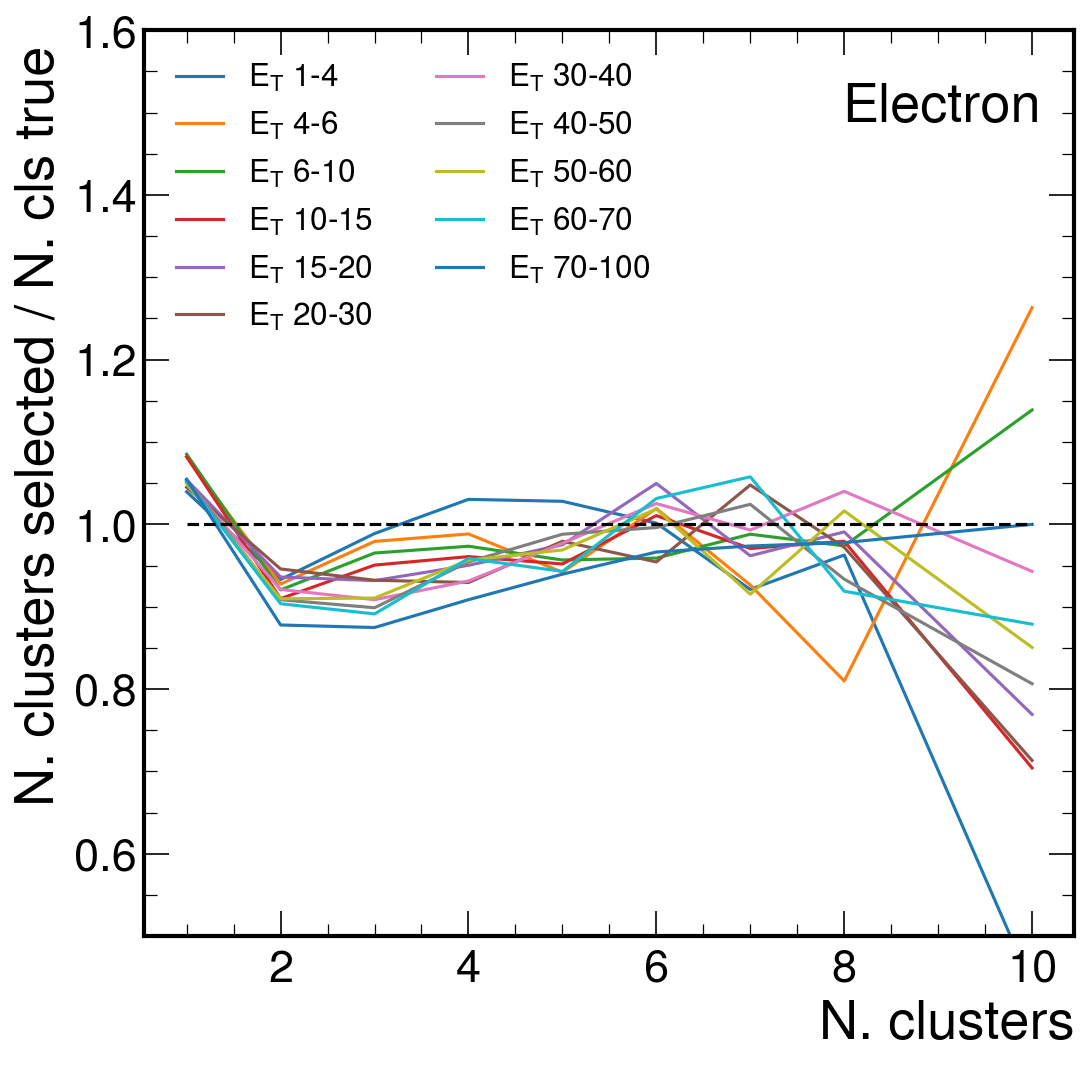

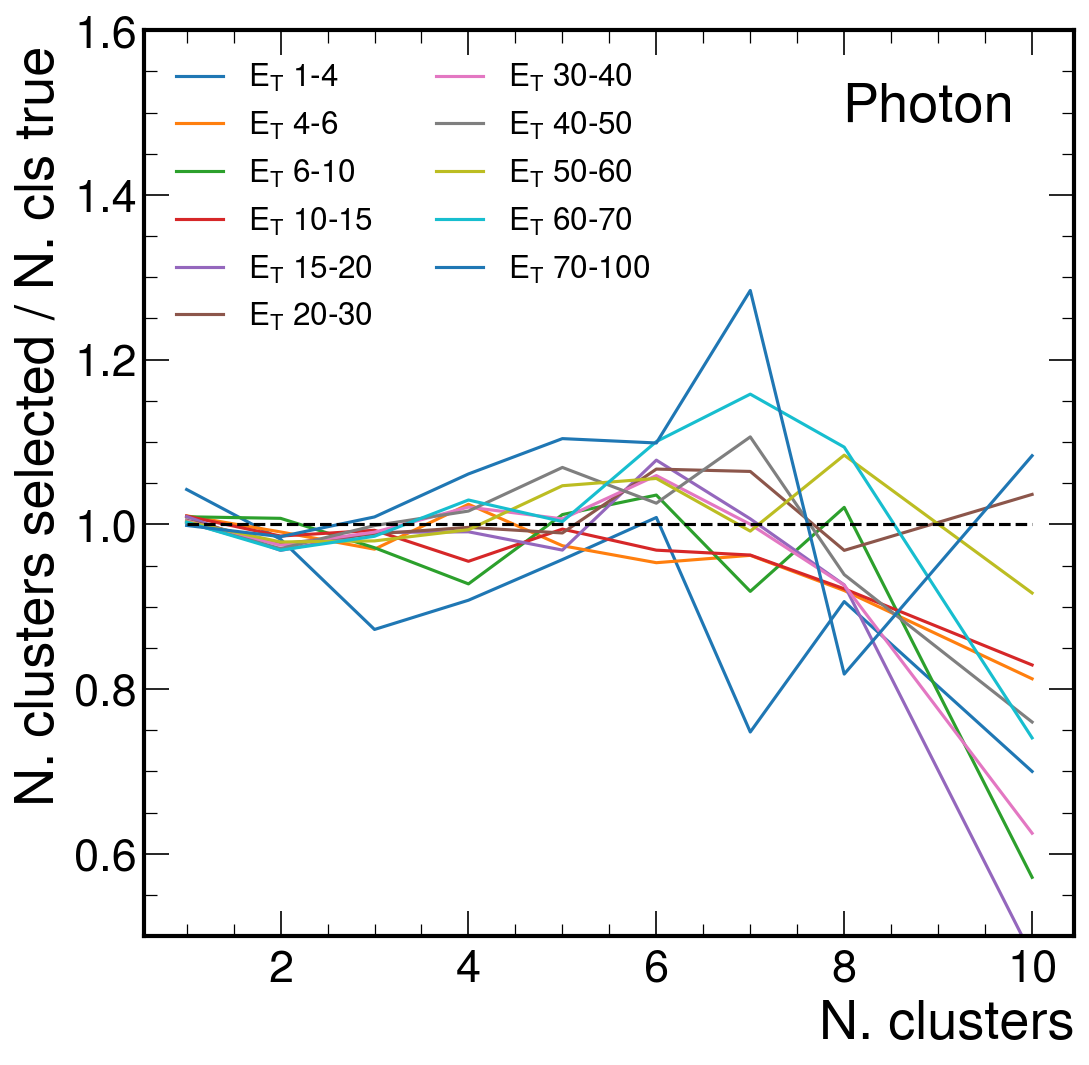

In [22]:
np.seterr(divide='ignore', invalid='ignore')

for df, flavour in zip([df_ele,df_gamma],["Electron","Photon"]):

    fig, ax = plt.subplots(1,1, figsize=(8,8),dpi=150)

    bins = [1,2,3,4,5,6,7,8,10,15]
    ets = [1,4,6,10,15,20,30,40,50,60,70,100]


    for iet in range(len(ets)-1):
        dfx = df[(df.et>=ets[iet]) & (df.et<ets[iet+1])]

        A = np.histogram(dfx.ncls_sel.values, bins=bins)
        B = np.histogram(dfx.ncls_true.values, bins=bins)
        ax.plot(A[1][:-1], np.divide(A[0],B[0]), label="$E_T$ {}-{}".format(ets[iet],ets[iet+1]))
        
    ax.plot()    
    ax.legend(ncol=2, loc="upper left", fontsize="xx-small")
    ax.text(0.75, 0.9, flavour, transform=ax.transAxes)
    ax.set_ylim(0.5, 1.6)
    ax.set_ylabel("N. clusters selected / N. cls true ")
    ax.set_xlabel("N. clusters")
    ax.plot([bins[0], bins[-2]],[1,1], linestyle="dashed", color="black")


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


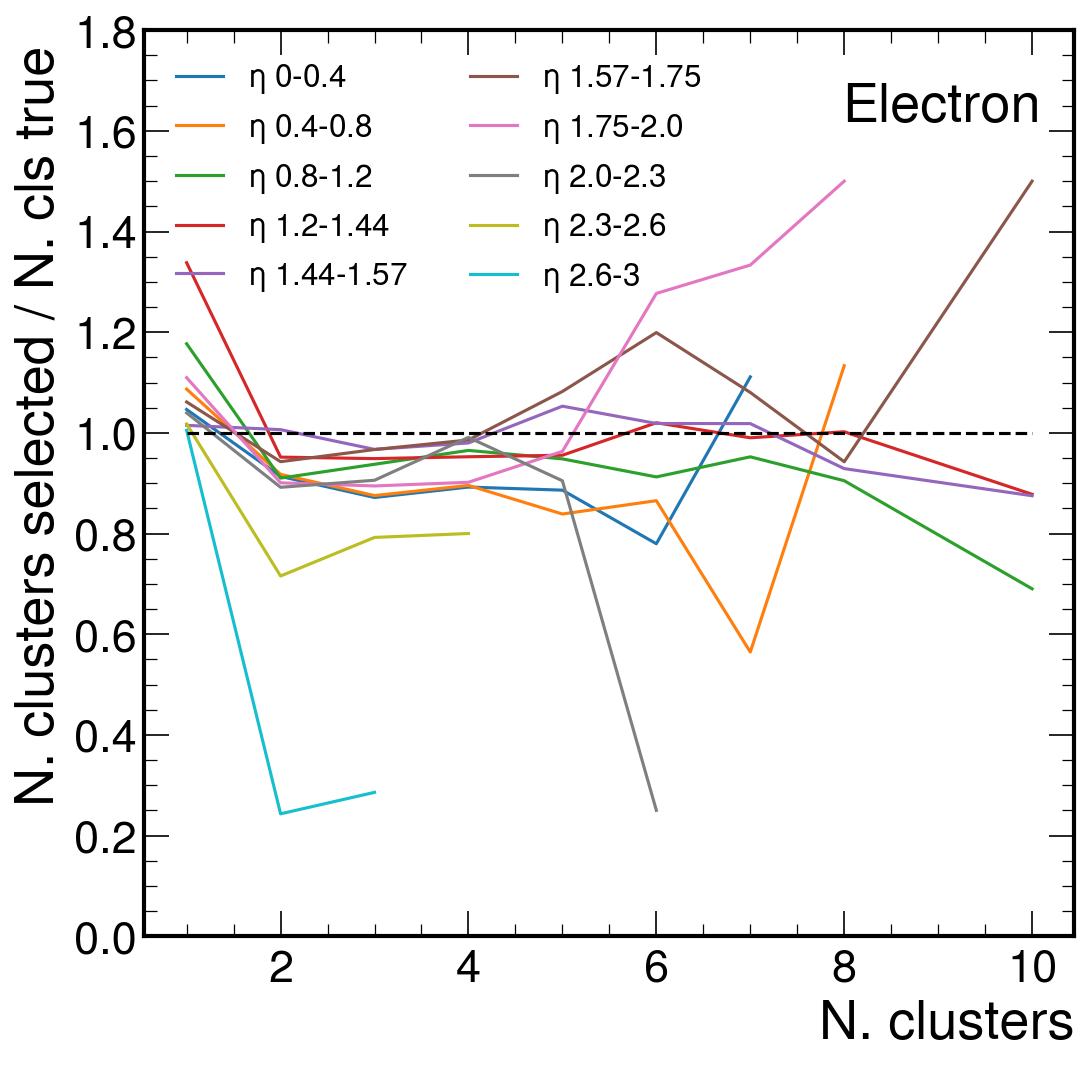

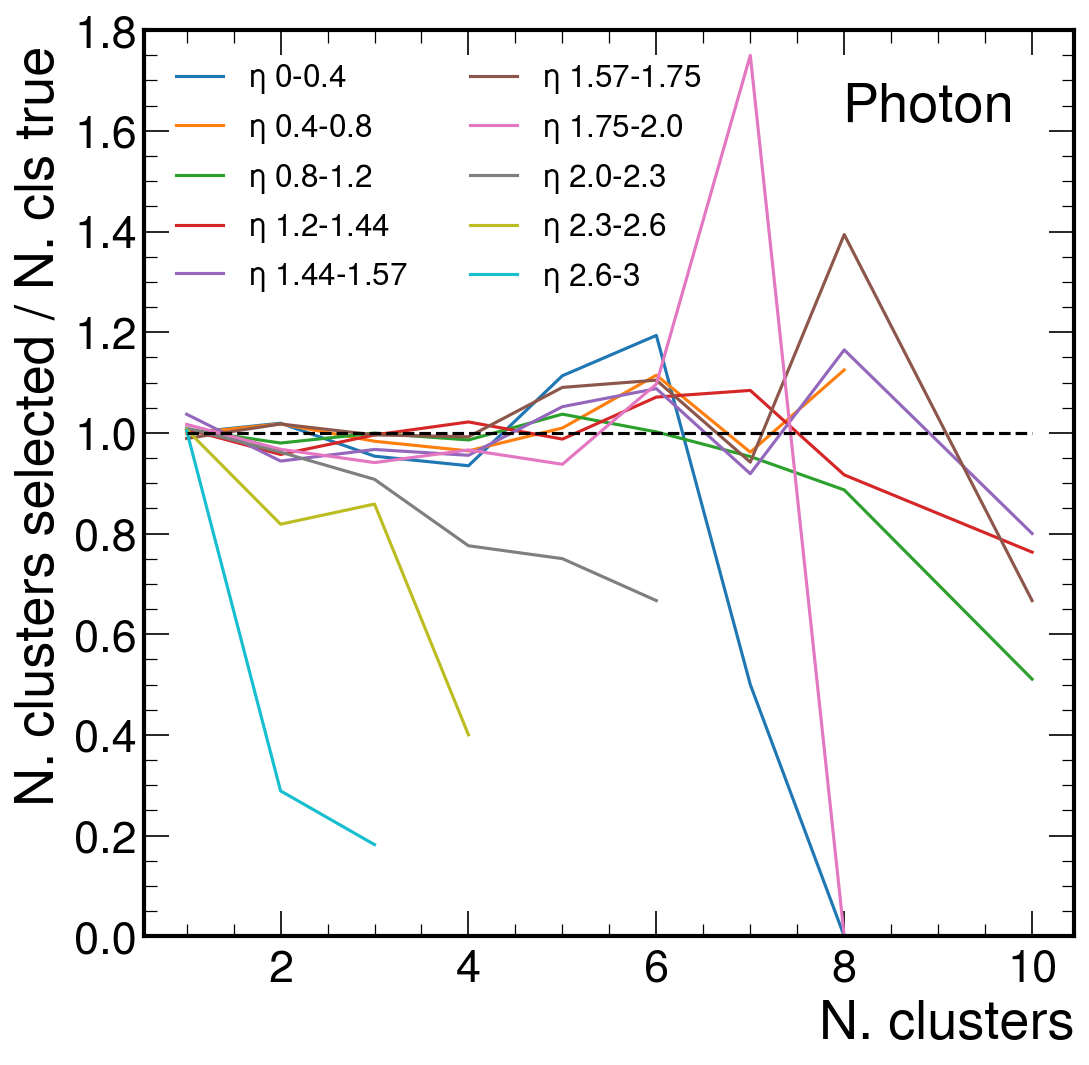

In [7]:
np.seterr(divide='ignore', invalid='ignore')

for df, flavour in zip([df_ele,df_gamma],["Electron","Photon"]):

    fig, ax = plt.subplots(1,1, figsize=(8,8),dpi=150)

    bins = [1,2,3,4,5,6,7,8,10,15]
    etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]


    for iet in range(len(etas)-1):
        dfx = df[(df.eta>=etas[iet]) & (df.eta<etas[iet+1])]

        A = np.histogram(dfx.ncls_sel.values, bins=bins)
        B = np.histogram(dfx.ncls_true.values, bins=bins)
        ax.plot(A[1][:-1], np.divide(A[0],B[0]), label="$\eta$ {}-{}".format(etas[iet],etas[iet+1]))
        
    ax.plot()    
    ax.legend(ncol=2, loc="upper left", fontsize="xx-small")
    ax.text(0.75, 0.9, flavour, transform=ax.transAxes)
    ax.set_ylim(0., 1.8)
    ax.set_ylabel("N. clusters selected / N. cls true ")
    ax.set_xlabel("N. clusters")
    ax.plot([bins[0], bins[-2]],[1,1], linestyle="dashed", color="black")


# Check ele vs gamma Gen level

In [29]:
df_ele.columns

Index(['ncls', 'ncls_true', 'ncls_sel', 'ncls_sel_true', 'ncls_sel_must',
       'ncls_sel_must_true', 'Et_tot', 'En_tot', 'Et_true', 'Et_sel',
       'Et_sel_true', 'En_true', 'En_true_sim', 'En_true_sim_good',
       'En_true_gen', 'En_sel', 'En_sel_true', 'En_sel_corr', 'Et_ovEtrue',
       'En_ovEtrue', 'En_ovEtrue_sim', 'En_ovEtrue_sim_good',
       'EnTrue_ovEtrue_sim', 'EnTrue_ovEtrue_sim_good', 'Et_sel_must',
       'En_sel_must', 'Et_sel_must_true', 'En_sel_must_true',
       'En_sel_must_calib', 'Et_ovEtrue_mustache', 'En_ovEtrue_mustache',
       'En_ovEtrue_sim_mustache', 'En_ovEtrue_sim_good_mustache',
       'en_regr_factor', 'En_ovEtrue_gen', 'En_ovEtrue_gen_calib',
       'En_ovEtrue_gen_mustache', 'En_ovEtrue_gen_calib_mustache', 'flavour',
       'seed_eta', 'seed_phi', 'seed_ieta', 'seed_iphi', 'seed_iz', 'en_seed',
       'et_seed', 'en_seed_calib', 'et_seed_calib', 'seed_r9',
       'seed_swissCross', 'seed_nxtals', 'max_en_cluster', 'max_et_cluster',
       'max_d

Text(1, 0, 'Calo Gen $E_T$')

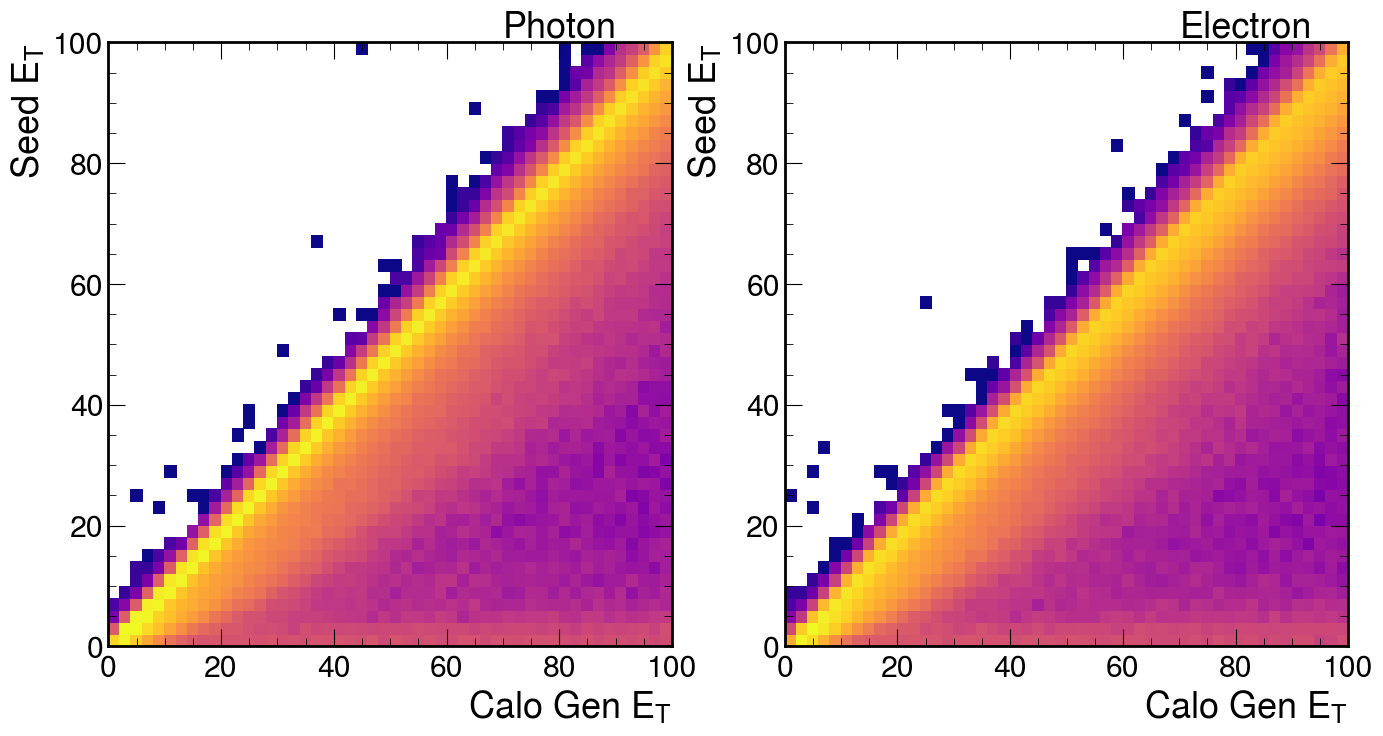

In [17]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

A = ax[0].hist2d( df_gamma.et_true_gen.abs(), df_gamma.et_seed, range=((0,100),(0,100)), bins=(50,50), cmap='plasma', norm=colors.LogNorm())
B = ax[1].hist2d( df_ele.iloc[0:len(df_gamma)].et_true_gen.abs(), df_ele.iloc[0:len(df_gamma)].et_seed, range=((0,100),(0,100)), bins=(50,50), cmap='plasma', norm=colors.LogNorm())

ax[0].set_ylabel("Seed $E_T$")
ax[1].set_ylabel("Seed $E_T$")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)
ax[0].set_xlabel("Calo Gen $E_T$")
ax[1].set_xlabel("Calo Gen $E_T$")

<ipython-input-18-4924d4ab3b67>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,0,20,40,60,80,100])
<ipython-input-18-4924d4ab3b67>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0,20,40,60,80,100])


[Text(0, -10.0, '0'),
 Text(0, 0.0, '0'),
 Text(0, 10.0, '20'),
 Text(0, 20.0, '40'),
 Text(0, 30.0, '60'),
 Text(0, 40.0, '80'),
 Text(0, 50.0, '100')]

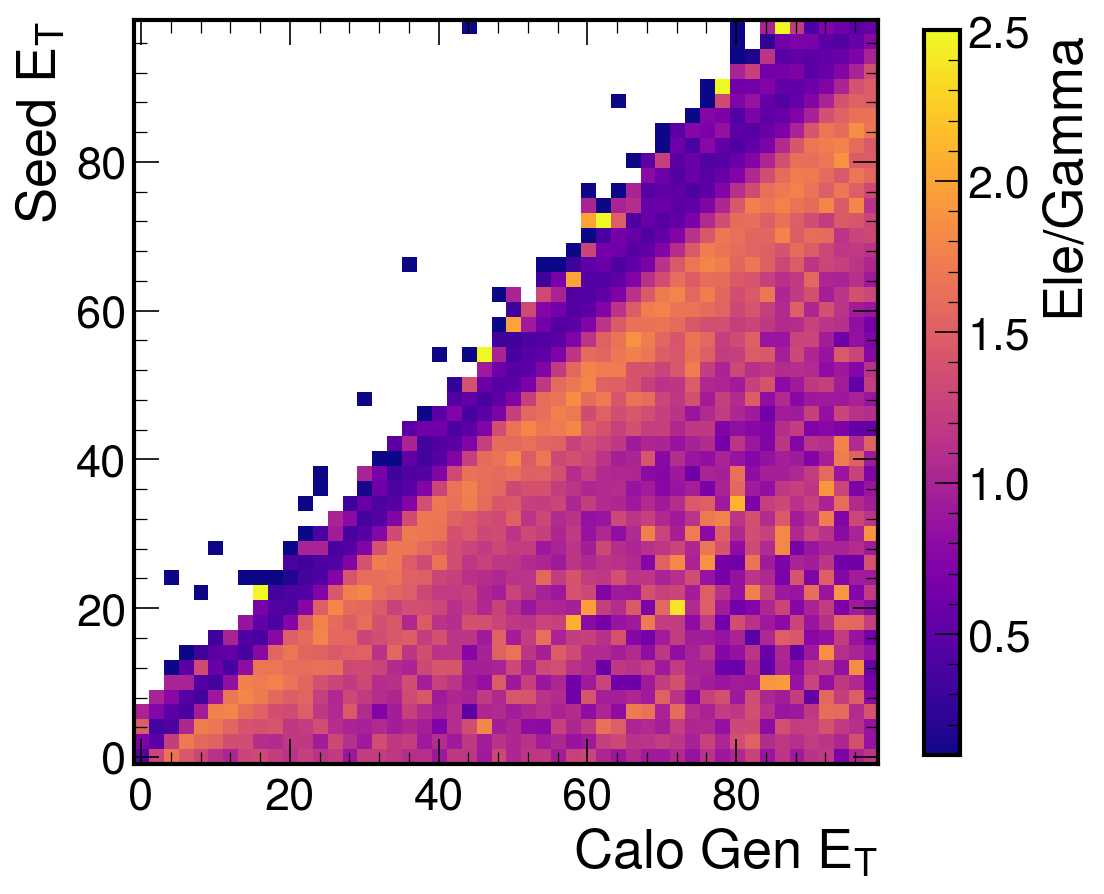

In [18]:
f, ax, = plt.subplots(1,1, figsize=(8,8), dpi=150)
I = ax.imshow((B[0]/A[0]).T, origin="lower",  cmap='plasma',vmax=2.5, vmin=0.1)
f.colorbar(I, label="Ele/Gamma", ax=ax, shrink=0.8, )
ax.set_ylabel("Seed $E_T$")
ax.set_xlabel("Calo Gen $E_T$")
ax.set_xticklabels([0,0,20,40,60,80,100])
ax.set_yticklabels([0,0,20,40,60,80,100])

Text(1, 0, 'Calo Gen $E_T$')

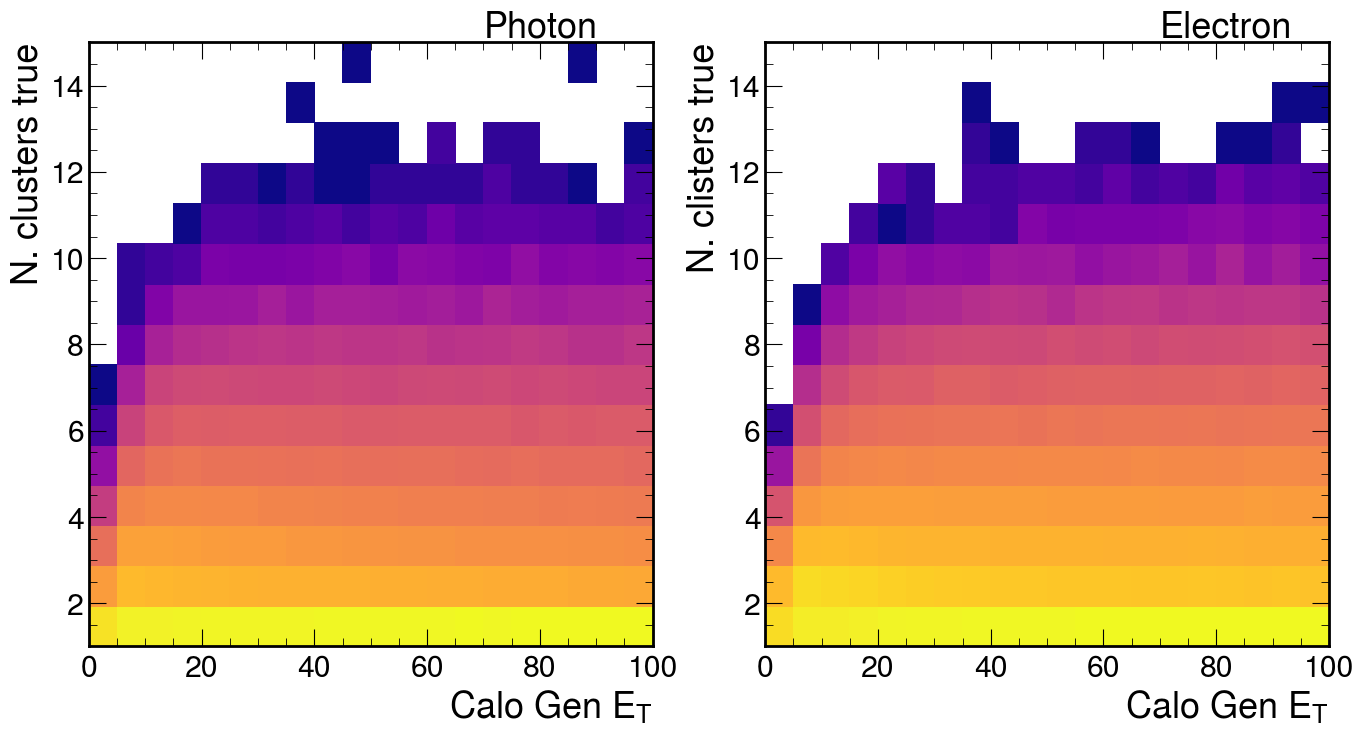

In [14]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

A = ax[0].hist2d(  df_gamma.et_true_gen.abs(), df_gamma.ncls_true, range=((0,100),(1,15)), bins=(20,15), cmap='plasma', norm=colors.LogNorm())
B = ax[1].hist2d( df_ele.iloc[1:len(df_gamma)].et_true_gen.abs(),  df_ele.iloc[1:len(df_gamma)].ncls_true,   range=((0,100),(1,15)), bins=(20,15), cmap='plasma', norm=colors.LogNorm())

ax[0].set_ylabel("N. clusters true")
ax[1].set_ylabel("N. clisters true")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)
ax[0].set_xlabel("Calo Gen $E_T$")
ax[1].set_xlabel("Calo Gen $E_T$")

866285.0 866285.0


[Text(0, -0.5, '1'),
 Text(0, 0.5, '2'),
 Text(0, 1.5, '3'),
 Text(0, 2.5, '4'),
 Text(0, 3.5, '5'),
 Text(0, 4.5, '6'),
 Text(0, 5.5, '7'),
 Text(0, 6.5, '8'),
 Text(0, 7.5, '9'),
 Text(0, 8.5, '10'),
 Text(0, 9.5, '11'),
 Text(0, 10.5, '12'),
 Text(0, 11.5, '13'),
 Text(0, 12.5, '14'),
 Text(0, 13.5, '15'),
 Text(0, 14.5, '16')]

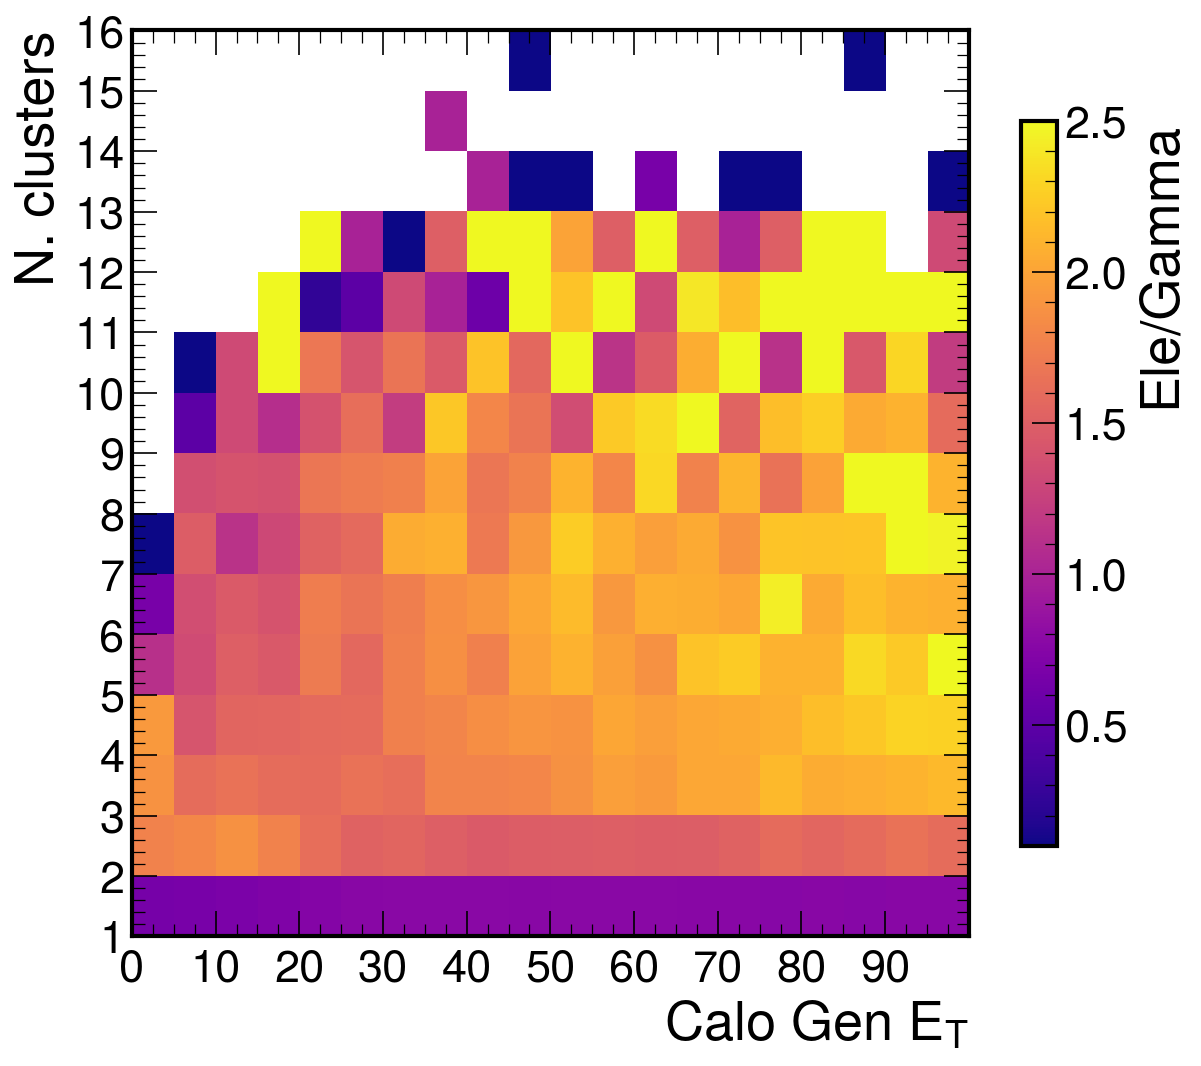

In [16]:
f, ax, = plt.subplots(1,1, figsize=(9,8), dpi=150)
print(np.sum(A[0]), np.sum(B[0]))
I = ax.imshow((B[0]/A[0]).T, origin="lower",  cmap='plasma',vmax=2.5, vmin=0.1, aspect='auto')
f.colorbar(I, label="Ele/Gamma", ax=ax, shrink=0.8, )
ax.set_ylabel("N. clusters")
ax.set_xlabel("Calo Gen $E_T$")
ax.set_xticks(np.arange(0,20,2)-0.5)
ax.set_xticklabels(list(range(0,100,10)))
ax.set_yticks(np.arange(16)-0.5)
ax.set_yticklabels(list(range(1,17)))

Text(1, 0, 'Seed $E_T$')

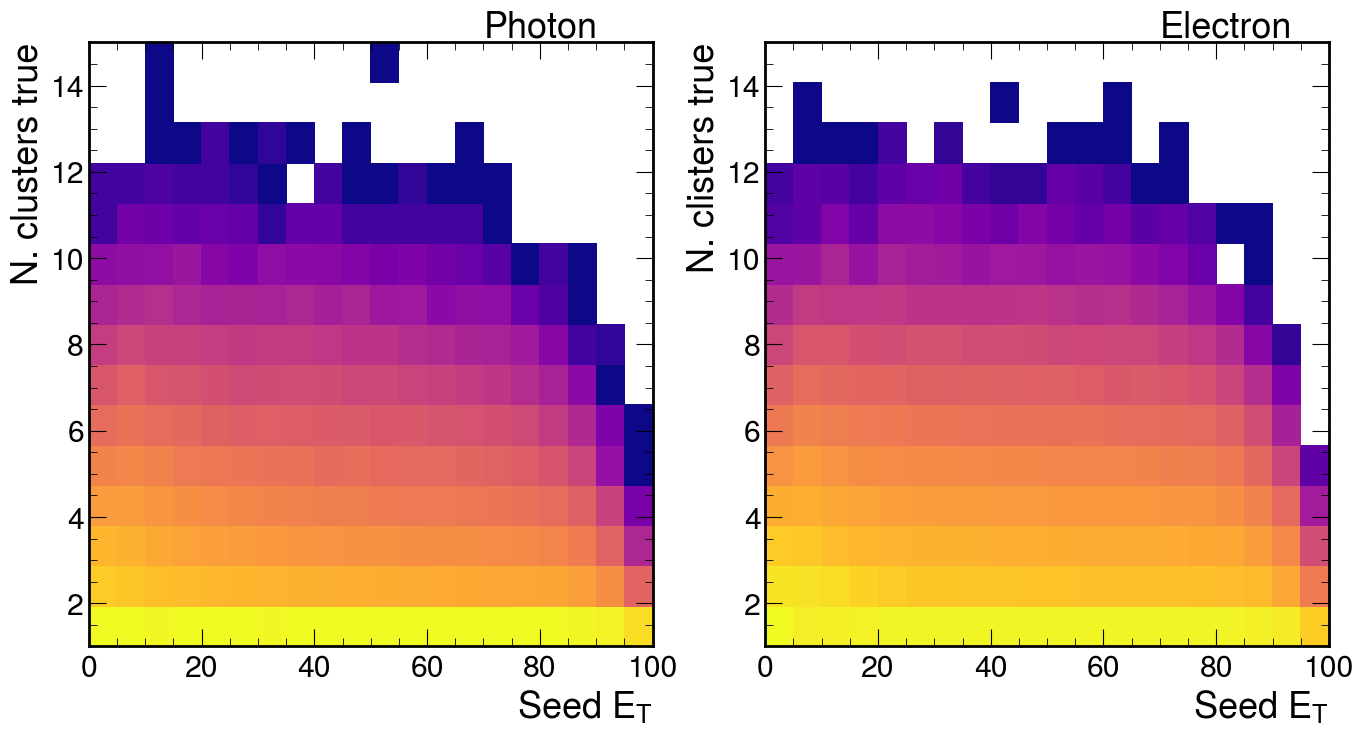

In [8]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

A = ax[0].hist2d(  df_gamma.et_seed.abs(), df_gamma.ncls_true, range=((0,100),(1,15)), bins=(20,15), cmap='plasma', norm=colors.LogNorm())
B = ax[1].hist2d( df_ele.iloc[1:len(df_gamma)].et_seed.abs(),  df_ele.iloc[1:len(df_gamma)].ncls_true,   range=((0,100),(1,15)), bins=(20,15), cmap='plasma', norm=colors.LogNorm())

ax[0].set_ylabel("N. clusters true")
ax[1].set_ylabel("N. clisters true")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)
ax[0].set_xlabel("Seed $E_T$")
ax[1].set_xlabel("Seed $E_T$")

864679.0 865384.0


[Text(0, -0.5, '1'),
 Text(0, 0.5, '2'),
 Text(0, 1.5, '3'),
 Text(0, 2.5, '4'),
 Text(0, 3.5, '5'),
 Text(0, 4.5, '6'),
 Text(0, 5.5, '7'),
 Text(0, 6.5, '8'),
 Text(0, 7.5, '9'),
 Text(0, 8.5, '10'),
 Text(0, 9.5, '11'),
 Text(0, 10.5, '12'),
 Text(0, 11.5, '13'),
 Text(0, 12.5, '14'),
 Text(0, 13.5, '15'),
 Text(0, 14.5, '16')]

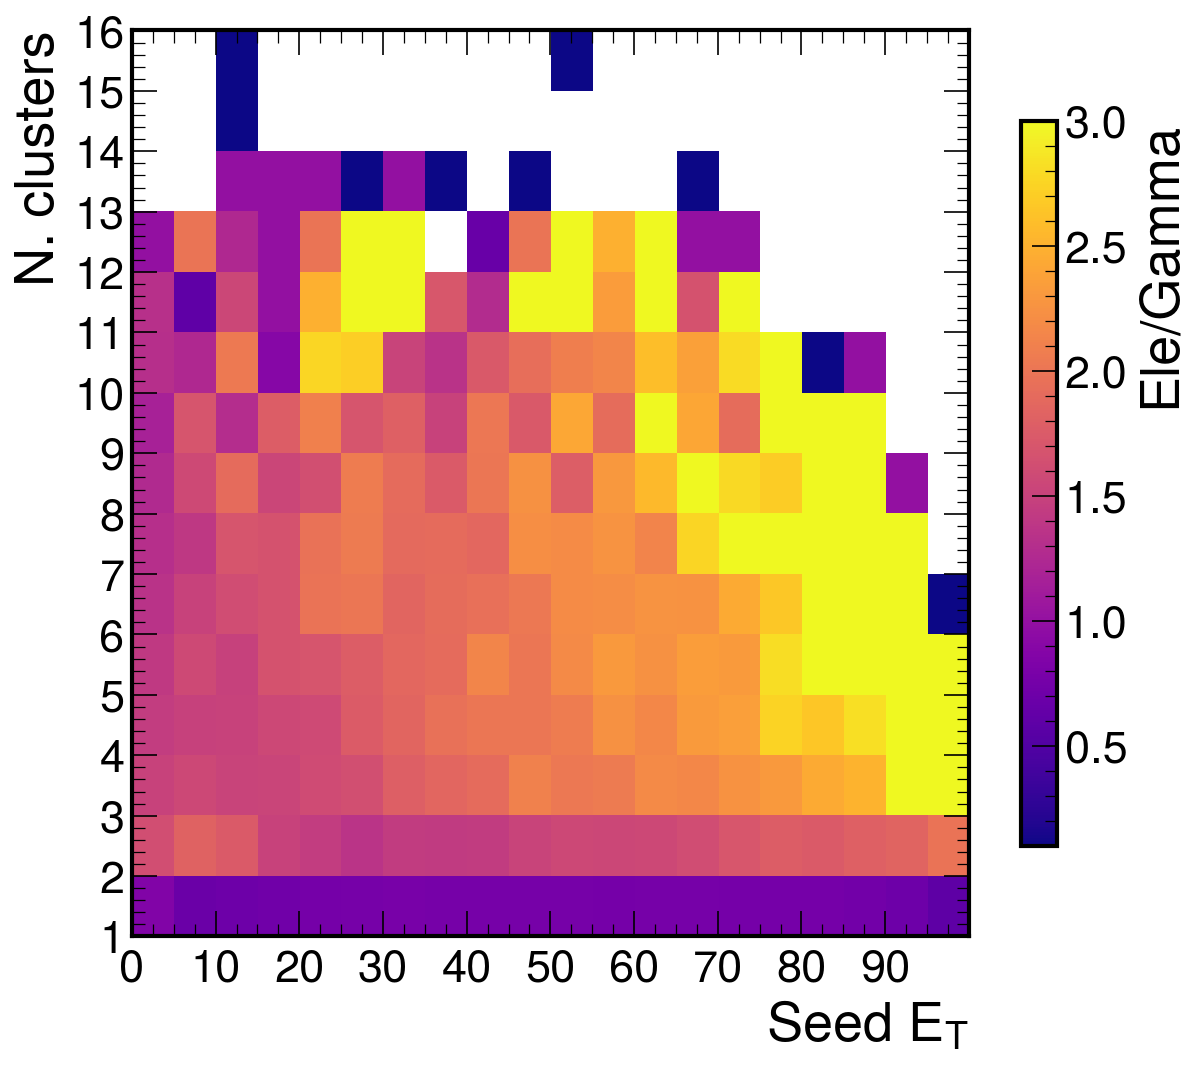

In [13]:
f, ax, = plt.subplots(1,1, figsize=(9,8), dpi=150)
print(np.sum(A[0]), np.sum(B[0]))
I = ax.imshow((B[0]/A[0]).T, origin="lower",  cmap='plasma',vmax=3, vmin=0.1, aspect='auto')
f.colorbar(I, label="Ele/Gamma", ax=ax, shrink=0.8, )
ax.set_ylabel("N. clusters")
ax.set_xlabel("Seed $E_T$")
ax.set_xticks(np.arange(0,20,2)-0.5)
ax.set_xticklabels(list(range(0,100,10)))
ax.set_yticks(np.arange(16)-0.5)
ax.set_yticklabels(list(range(1,17)))